In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchinfo import summary
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import torch.utils.data as data
from torchvision import transforms
import torchvision

import sys,os
sys.path.append(os.pardir)

import py_func.Deep_learning_torch_func as DL
import py_func.models_func as my_model
import py_func.dat_rb_func as drb
import py_func.my_numpy_class as mnc
import py_func.my_torch_class as mtc
import py_func.models_func as my_model

import py_func.Deep_learning_torch_func as DL
import py_func.dat_rb_func as drb

from torchinfo import summary

from torch.optim import lr_scheduler

import numpy as np

In [9]:
fsim = mnc.My_numpy(1, '../dat/experiment/SLM/fm/fm_1_23000_slt0.6_N3_lsd_mean.dat')
fsim.simread(22000, 1600)
fsim.data.shape

(22000, 1600)

In [10]:
fimg = mnc.My_numpy(1, '../dat/bindat/1byte/fm_28_1.dat')
fimg.binread(22000, 28, 28)
fimg.data.shape

(22000, 28, 28)

In [11]:
fsim.data = fsim.data.reshape(22000, 1, 1600)
fimg.data = fimg.data.reshape(22000, 1, 28, 28)
myset = mtc.My_dataset(fsim.data, fimg.data)
myset.numpy2tensor()
myset.splitdata(21000)
myset.datanormalize()
myset.labelnormalize()
myset.tensor2dataset()

In [12]:
batch=256
norm_loader_m_t = DataLoader(myset.dataset_train, batch_size = batch, shuffle = True)
norm_loader_m_v = DataLoader(myset.dataset_val, batch_size = batch, shuffle = False)

In [6]:
criterion = nn.MSELoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#model_ver3
#28x28出力
kernel_size = [4,4,4,4]
stride_list = [1,1,1,1]
padding_list = [4,4,2,2]
outpadding_list = [0,0,0,0]
in_channel_list = [1, 32, 64, 128]
out_channel_list = [32, 64, 128, 1]

model = my_model.simnet_decoder_allsize(1600, 1600, 40, 40, kernel_size, stride_list, padding_list,
                                        outpadding_list, in_channel_list, out_channel_list).to(device)
summary(model = model, input_size = (1, 1, 1600), depth = 4)

Layer (type:depth-idx)                        Output Shape              Param #
simnet_decoder_allsize                        --                        --
├─Linear: 1-1                                 [1, 1, 1600]              2,561,600
├─ReLU: 1-2                                   [1, 1, 1600]              --
├─Sequential: 1-3                             [1, 1, 28, 28]            --
│    └─Convtp_Bn_ReLu: 2-1                    [1, 32, 35, 35]           --
│    │    └─Sequential: 3-1                   [1, 32, 35, 35]           --
│    │    │    └─ConvTranspose2d: 4-1         [1, 32, 35, 35]           544
│    │    │    └─BatchNorm2d: 4-2             [1, 32, 35, 35]           64
│    │    │    └─ReLU: 4-3                    [1, 32, 35, 35]           --
│    └─Convtp_Bn_ReLu: 2-2                    [1, 64, 30, 30]           --
│    │    └─Sequential: 3-2                   [1, 64, 30, 30]           --
│    │    │    └─ConvTranspose2d: 4-4         [1, 64, 30, 30]           32,832
│    │  

エポック1--------------------------------
epochtime:0.1200分, train_loss:0.6157, val_loss:0.6030
エポック2--------------------------------
epochtime:0.1172分, train_loss:0.3932, val_loss:0.4144
エポック3--------------------------------
epochtime:0.1199分, train_loss:0.3499, val_loss:0.3758
エポック4--------------------------------
epochtime:0.1216分, train_loss:0.3252, val_loss:0.3540
エポック5--------------------------------
epochtime:0.1175分, train_loss:0.3081, val_loss:0.3369
エポック6--------------------------------
epochtime:0.1175分, train_loss:0.2932, val_loss:0.3240
エポック7--------------------------------
epochtime:0.1163分, train_loss:0.2823, val_loss:0.3140
エポック8--------------------------------
epochtime:0.1162分, train_loss:0.2742, val_loss:0.3059
エポック9--------------------------------
epochtime:0.1163分, train_loss:0.2655, val_loss:0.2994
エポック10--------------------------------
epochtime:0.1167分, train_loss:0.2589, val_loss:0.2934
エポック11--------------------------------
epochtime:0.1198分, train_loss:0.2525, va

エポック90--------------------------------
epochtime:0.1170分, train_loss:0.1237, val_loss:0.2068
エポック91--------------------------------
epochtime:0.1172分, train_loss:0.1232, val_loss:0.2067
エポック92--------------------------------
epochtime:0.1169分, train_loss:0.1228, val_loss:0.2062
エポック93--------------------------------
epochtime:0.1169分, train_loss:0.1229, val_loss:0.2060
エポック94--------------------------------
epochtime:0.1172分, train_loss:0.1223, val_loss:0.2058
エポック95--------------------------------
epochtime:0.1171分, train_loss:0.1221, val_loss:0.2062
エポック96--------------------------------
epochtime:0.1167分, train_loss:0.1215, val_loss:0.2059
エポック97--------------------------------
epochtime:0.1170分, train_loss:0.1215, val_loss:0.2070
エポック98--------------------------------
epochtime:0.1169分, train_loss:0.1210, val_loss:0.2064
エポック99--------------------------------
epochtime:0.1169分, train_loss:0.1205, val_loss:0.2061
エポック100--------------------------------
epochtime:0.1172分, train_loss:

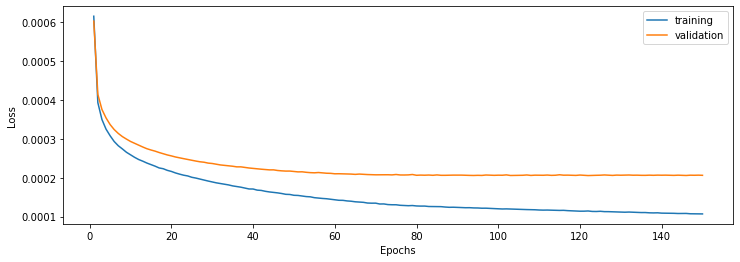

In [7]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size = 75, gamma=0.5)

epochs = 150

#training
tl, vl = DL.train_decode_model_ver2(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, \
                                    epochs, device, scheduler = scheduler)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

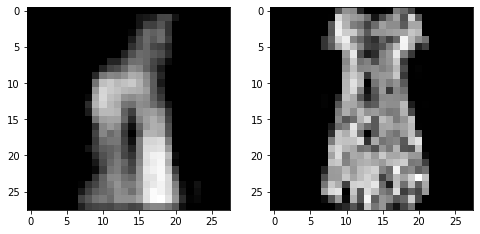

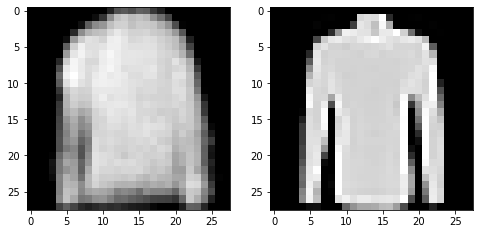

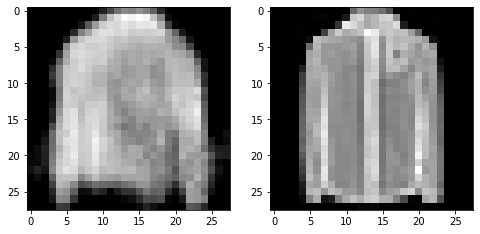

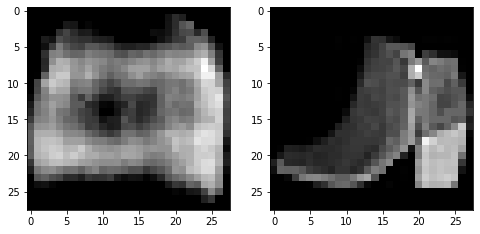

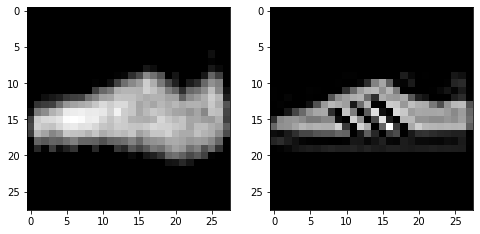

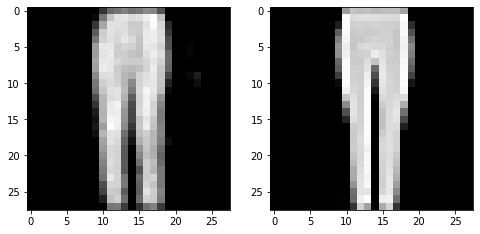

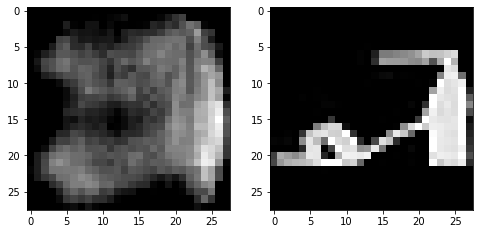

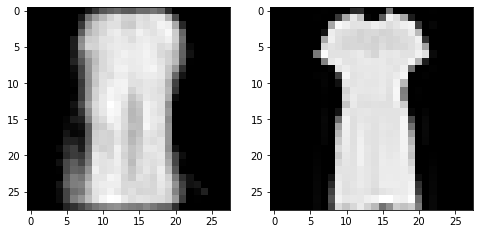

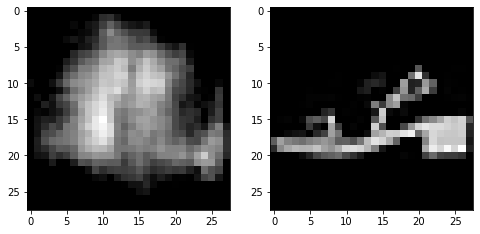

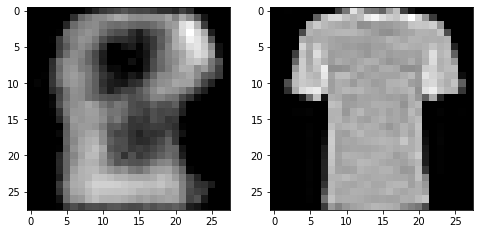

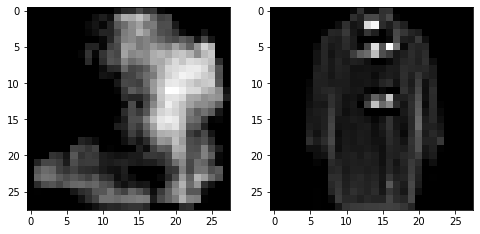

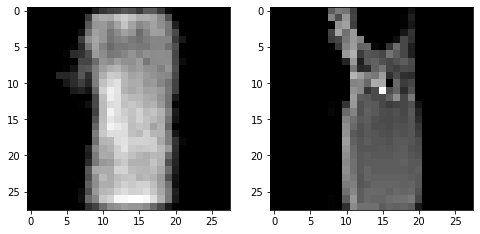

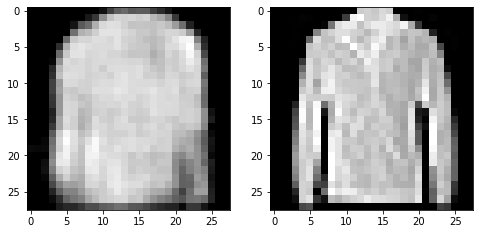

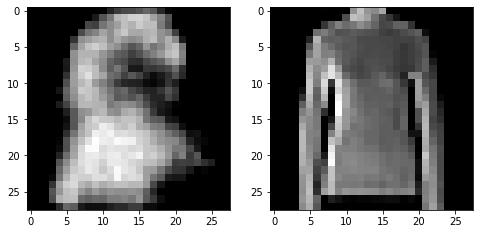

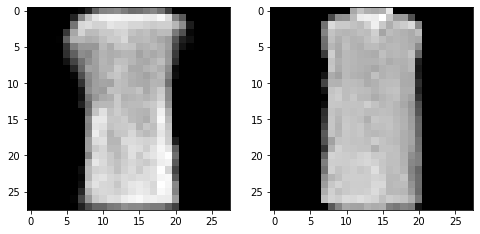

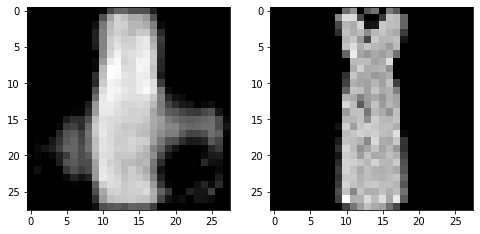

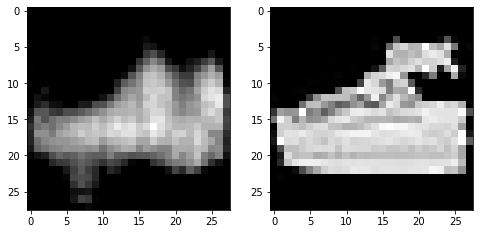

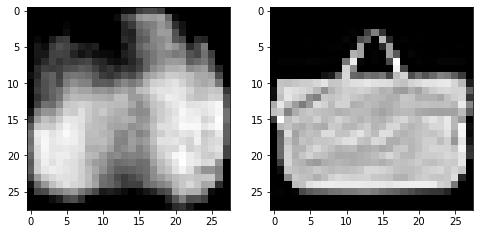

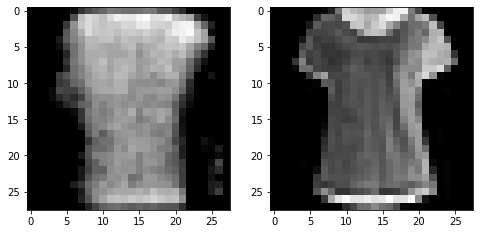

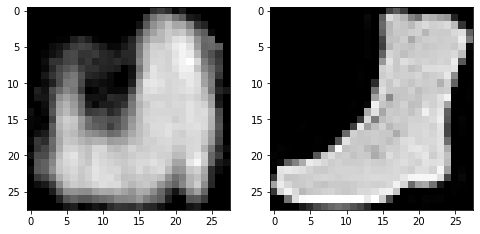

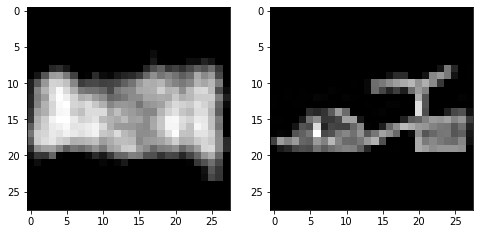

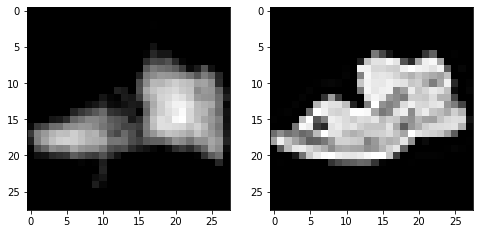

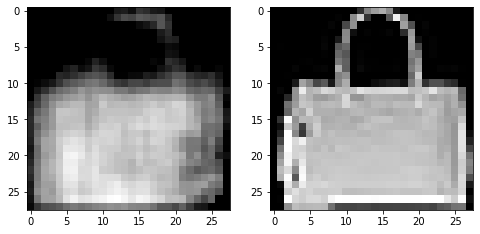

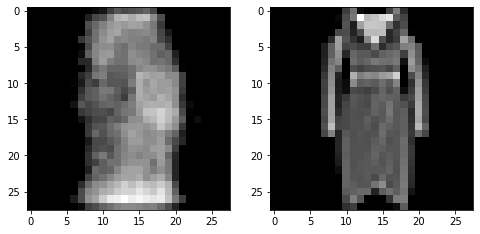

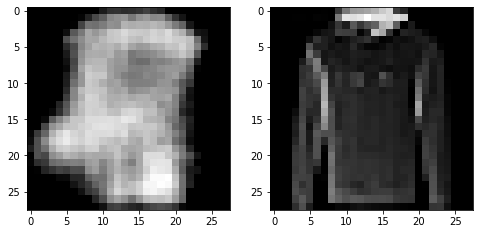

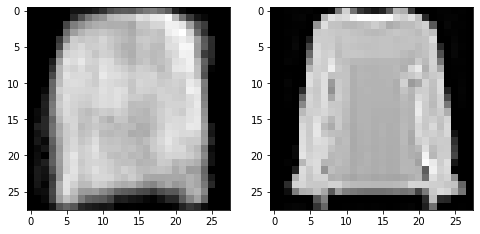

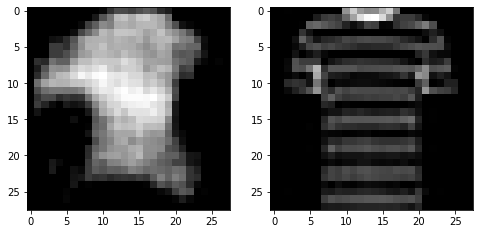

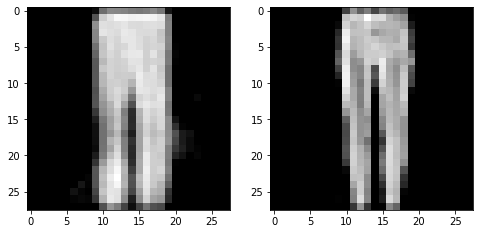

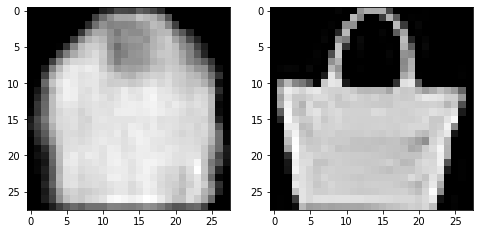

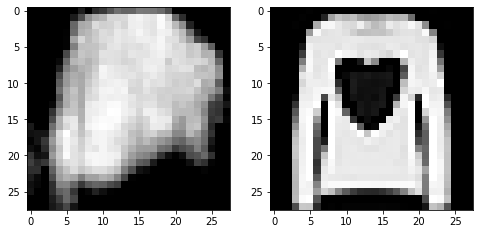

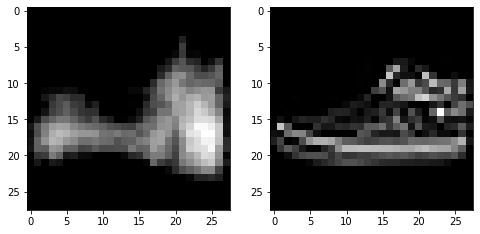

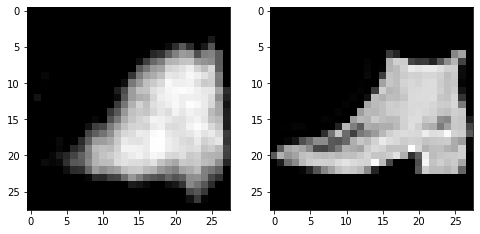

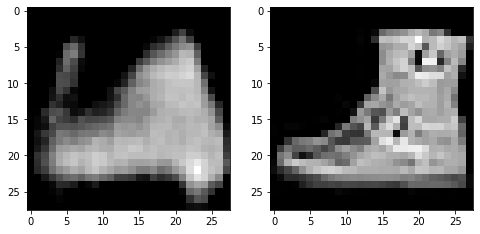

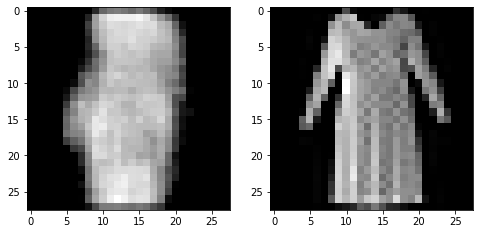

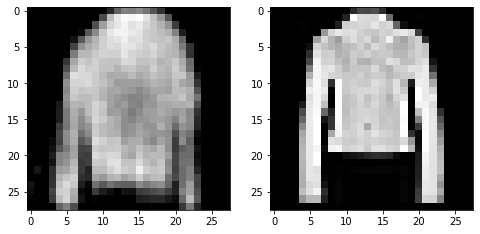

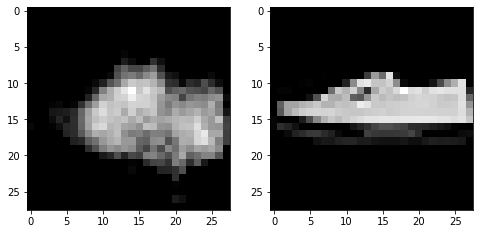

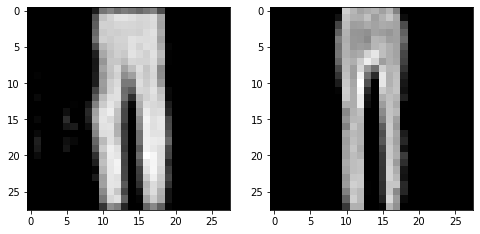

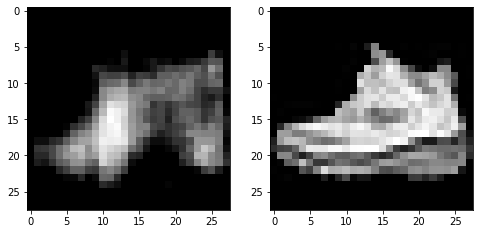

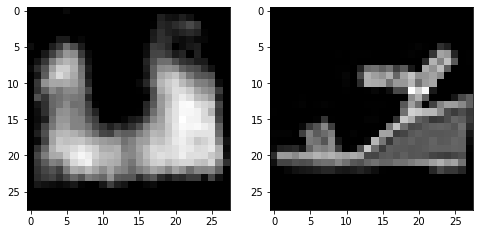

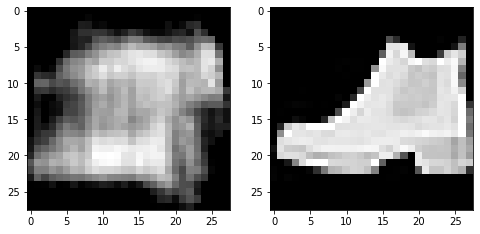

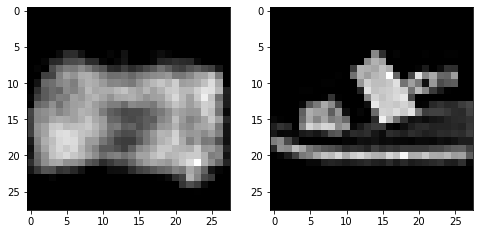

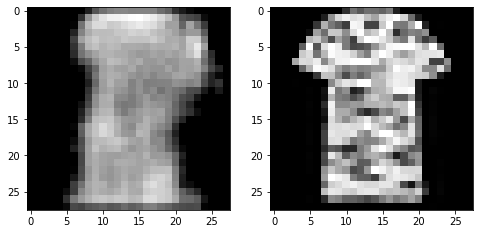

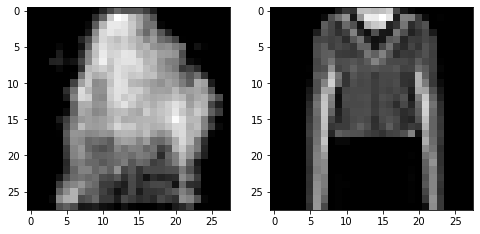

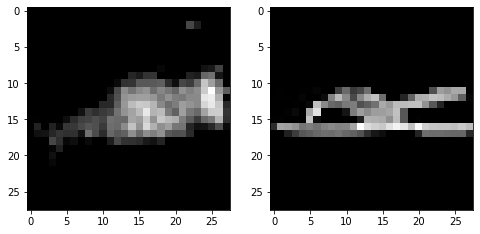

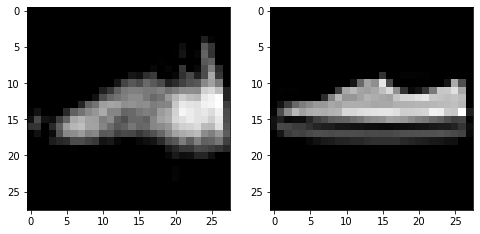

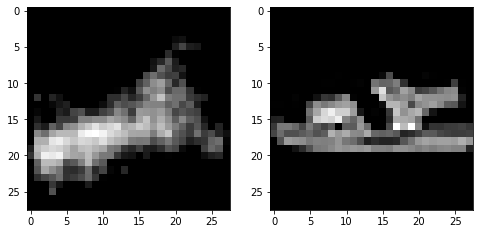

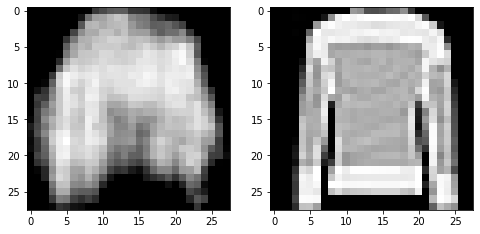

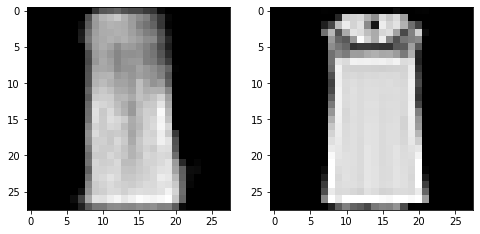

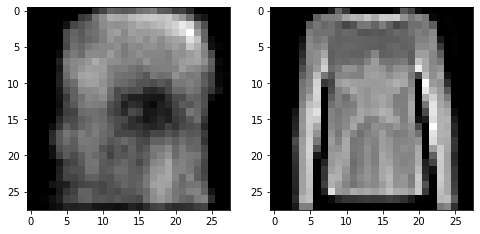

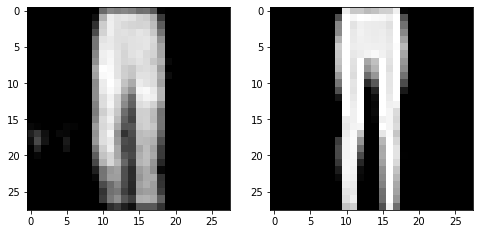

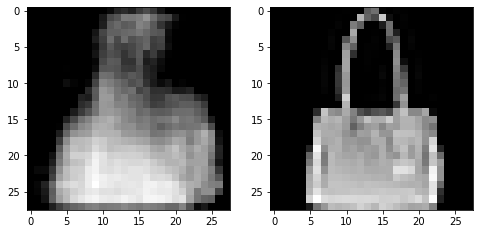

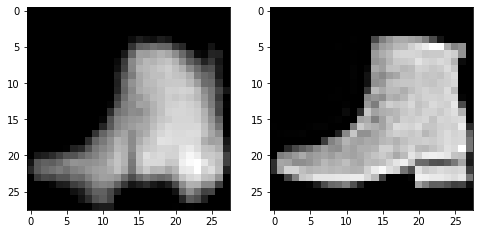

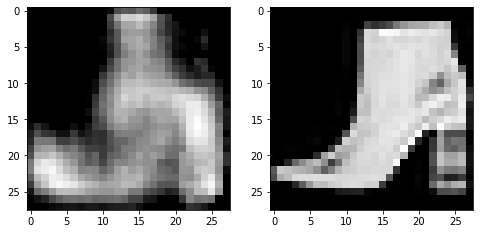

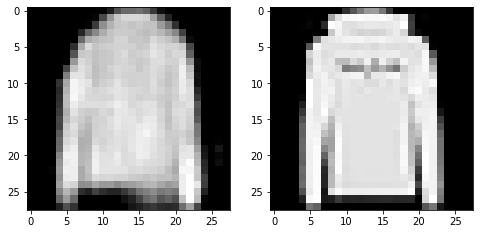

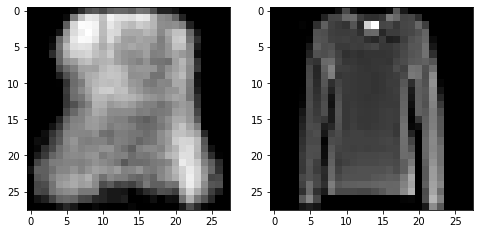

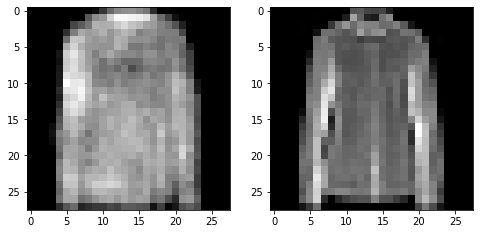

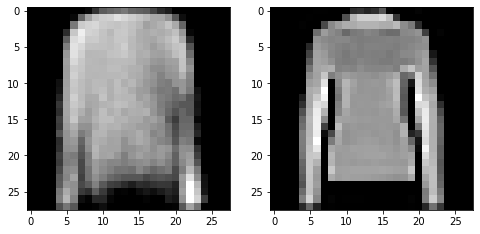

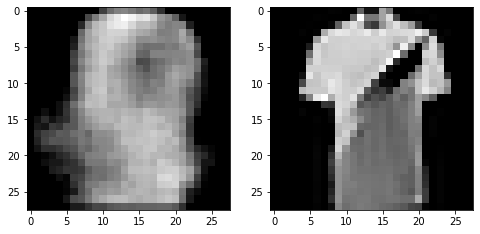

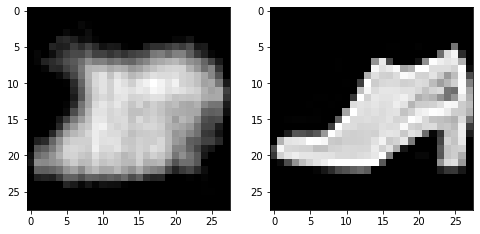

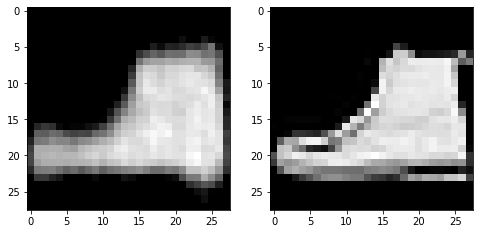

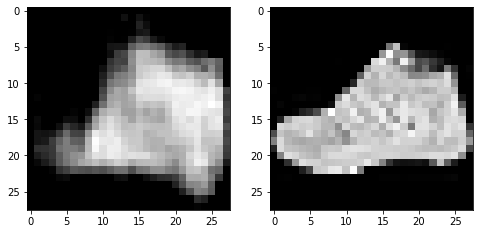

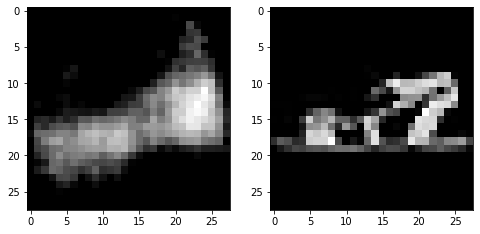

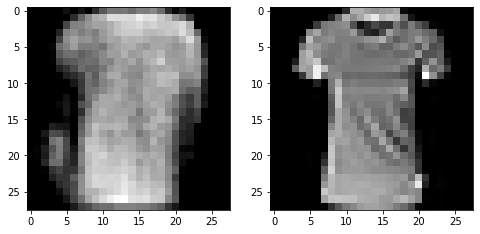

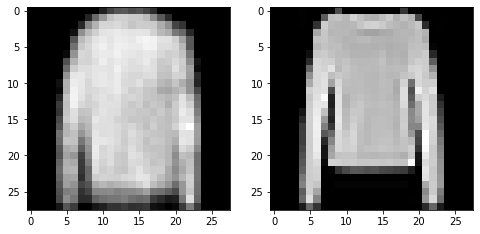

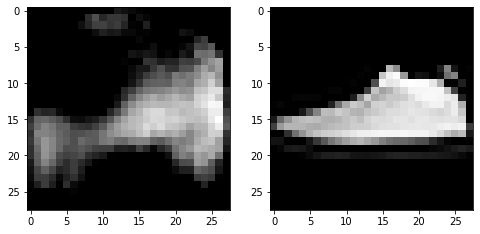

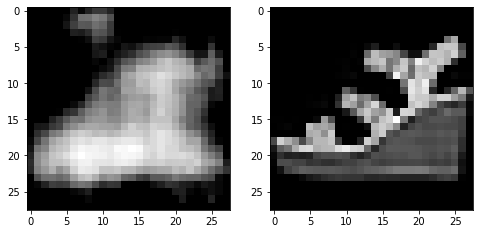

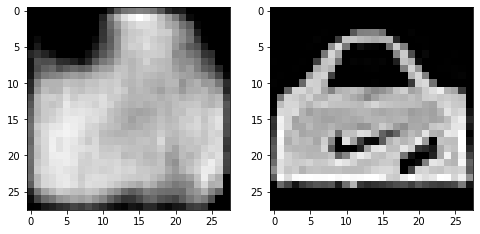

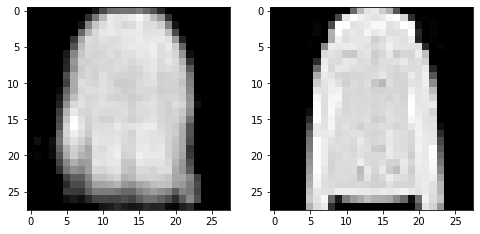

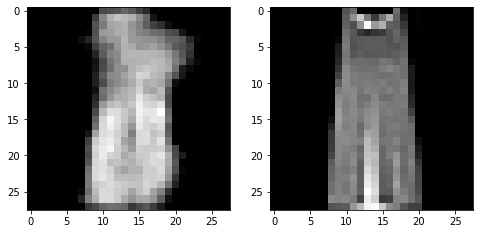

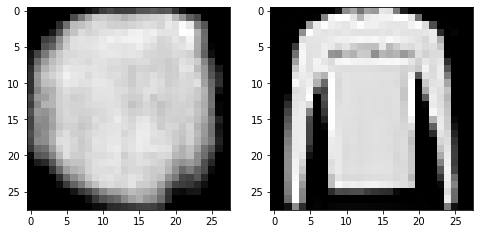

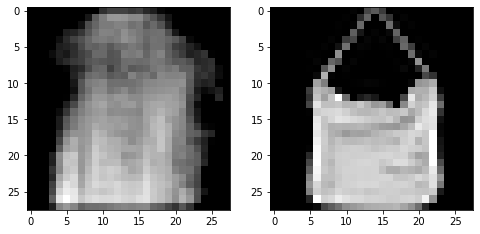

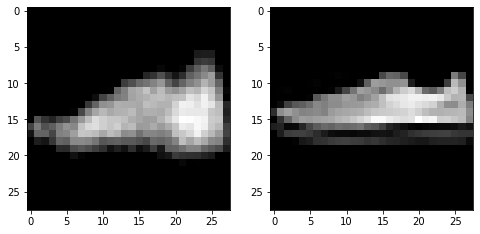

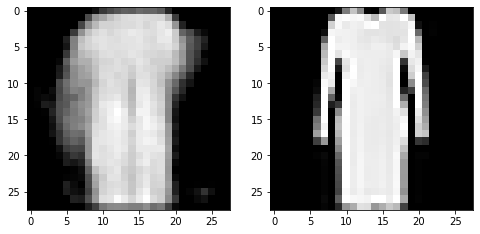

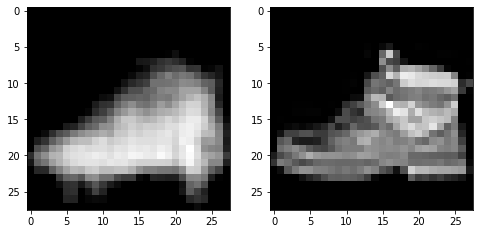

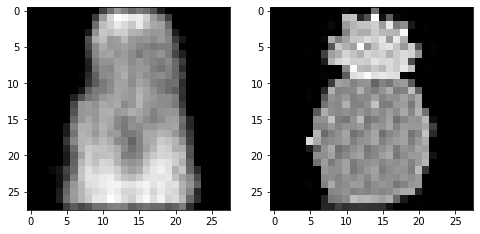

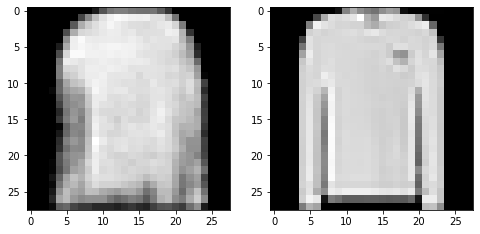

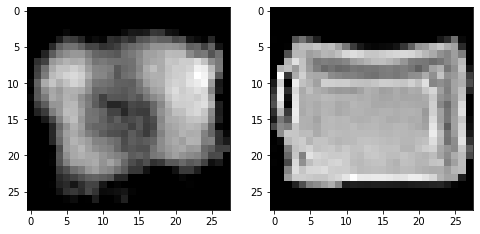

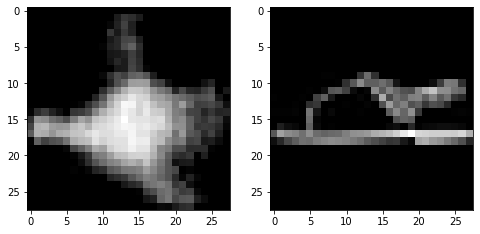

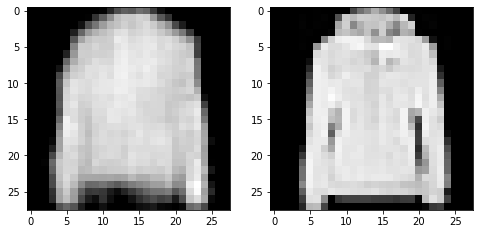

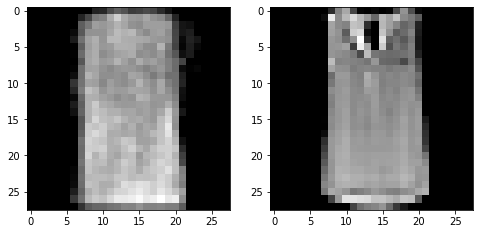

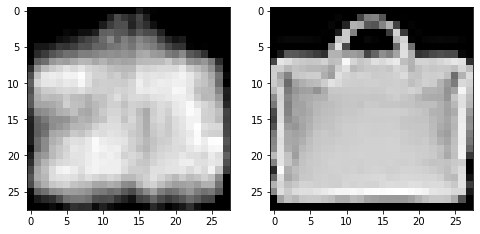

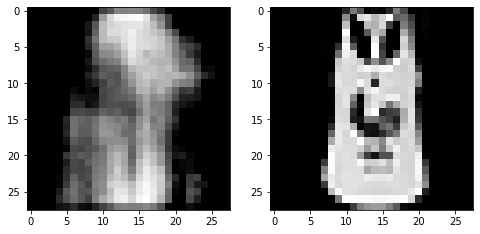

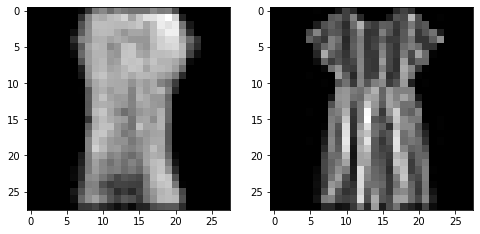

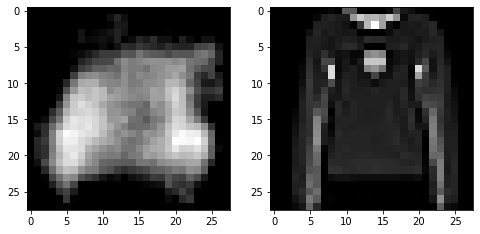

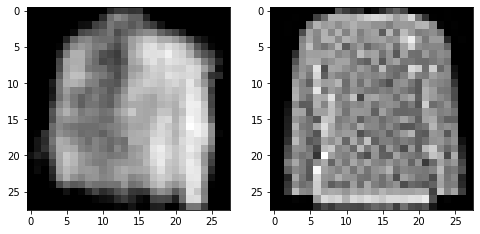

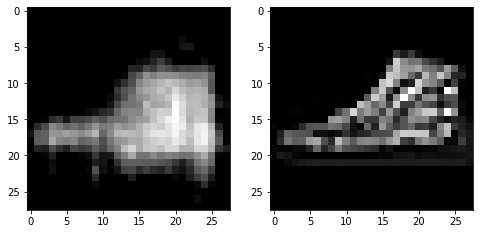

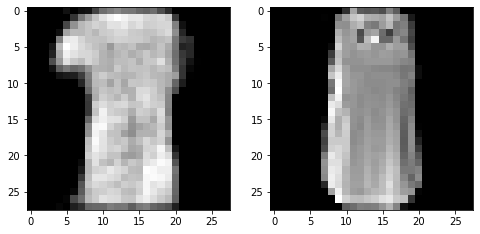

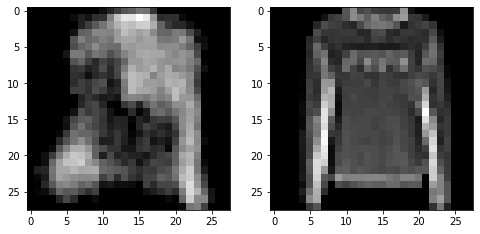

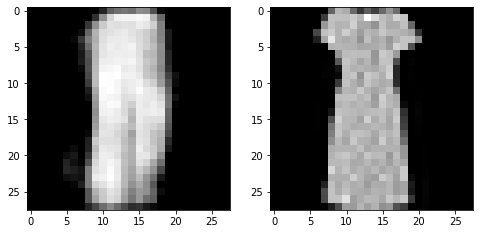

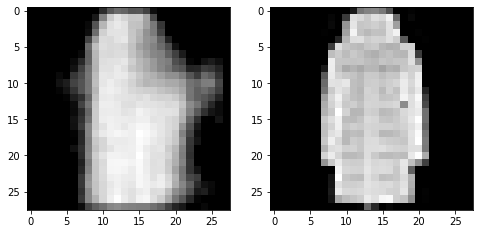

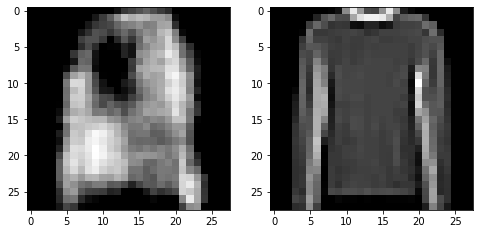

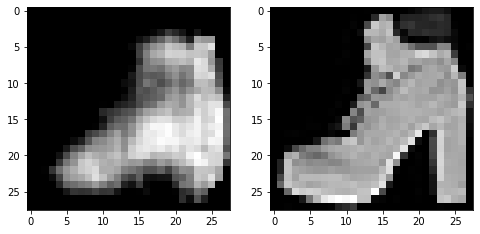

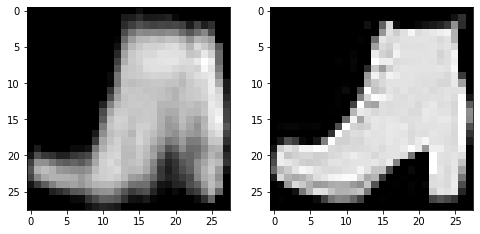

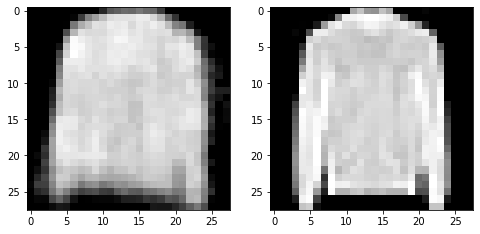

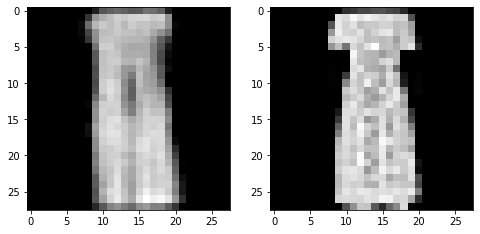

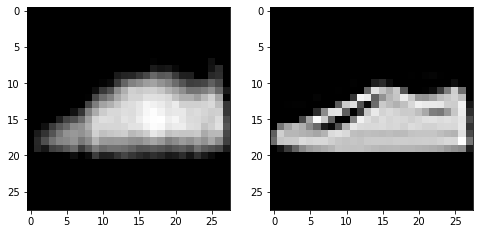

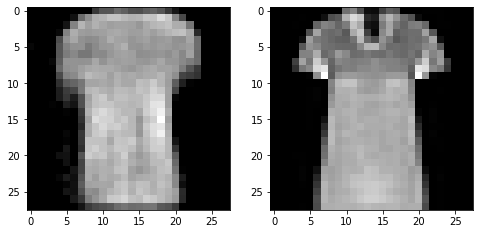

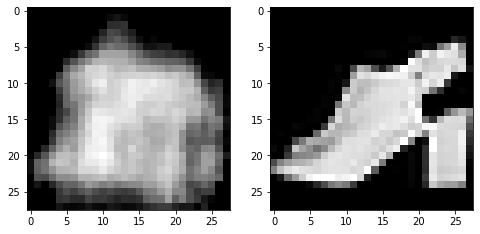

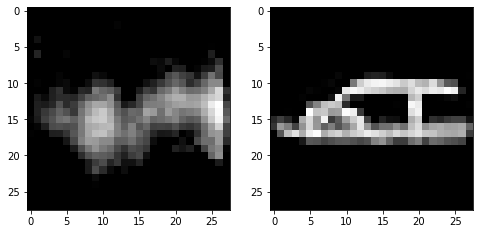

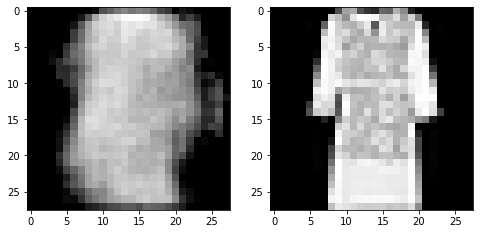

In [8]:
ftest = mnc.My_numpy(1,  '../dat/experiment/SLM/fm/fm_1_23000_slt0.6_N3_lsd_mean.dat')
ftest.simread(23000, 1600)

fimtest = mnc.My_numpy(1, '../dat/bindat/1byte/fm_28_1.dat')
fimtest.binread(23000, 28, 28)

data = np.vstack((ftest.data[:21000], ftest.data[22000:]))
data.shape

oriimg = np.vstack((fimtest.data[:21000], fimtest.data[22000:]))
oriimg.shape

data = data.reshape(22000,1,1600)
oriimg = oriimg.reshape(22000,1,28,28)

tset = mtc.My_dataset(data, oriimg)
tset.numpy2tensor()

tset.splitdata(21000)

tset.datanormalize()
tset.labelnormalize()

tset.tensor2dataset()

tl = DataLoader(tset.dataset_val, batch_size = 256, shuffle = False)


psnrs = DL.test_decode_model_and_check_img_ver3(tl, 28, 28, model, device, 8, 4, 1, 100, "../img/expe_dec", \
                                                label_array = None, datanorm = True, correctimgnorm = True)


In [20]:
criterion = nn.MSELoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#model_ver3
#28x28出力
kernel_size = [4,4,3]
stride_list = [1,1,1]
padding_list = [4,4,2]
outpadding_list = [0,0,0]
in_channel_list = [1, 32, 64]
out_channel_list = [32, 64, 1]

model = my_model.simnet_decoder_allsize(1600, 1600, 40, 40, kernel_size, stride_list, padding_list,
                                        outpadding_list, in_channel_list, out_channel_list).to(device)
summary(model = model, input_size = (1, 1, 1600), depth = 4)

Layer (type:depth-idx)                        Output Shape              Param #
simnet_decoder_allsize                        --                        --
├─Linear: 1-1                                 [1, 1, 1600]              2,561,600
├─ReLU: 1-2                                   [1, 1, 1600]              --
├─Sequential: 1-3                             [1, 1, 28, 28]            --
│    └─Convtp_Bn_ReLu: 2-1                    [1, 32, 35, 35]           --
│    │    └─Sequential: 3-1                   [1, 32, 35, 35]           --
│    │    │    └─ConvTranspose2d: 4-1         [1, 32, 35, 35]           544
│    │    │    └─BatchNorm2d: 4-2             [1, 32, 35, 35]           64
│    │    │    └─ReLU: 4-3                    [1, 32, 35, 35]           --
│    └─Convtp_Bn_ReLu: 2-2                    [1, 64, 30, 30]           --
│    │    └─Sequential: 3-2                   [1, 64, 30, 30]           --
│    │    │    └─ConvTranspose2d: 4-4         [1, 64, 30, 30]           32,832
│    │  

エポック1--------------------------------
epochtime:0.0494分, train_loss:0.8217, val_loss:0.8150
エポック2--------------------------------
epochtime:0.0495分, train_loss:0.5117, val_loss:0.5144
エポック3--------------------------------
epochtime:0.0501分, train_loss:0.4241, val_loss:0.4333
エポック4--------------------------------
epochtime:0.0506分, train_loss:0.3765, val_loss:0.3925
エポック5--------------------------------
epochtime:0.0492分, train_loss:0.3489, val_loss:0.3686
エポック6--------------------------------
epochtime:0.0492分, train_loss:0.3308, val_loss:0.3528
エポック7--------------------------------
epochtime:0.0489分, train_loss:0.3152, val_loss:0.3403
エポック8--------------------------------
epochtime:0.0490分, train_loss:0.3038, val_loss:0.3307
エポック9--------------------------------
epochtime:0.0502分, train_loss:0.2930, val_loss:0.3219
エポック10--------------------------------
epochtime:0.0493分, train_loss:0.2841, val_loss:0.3141
エポック11--------------------------------
epochtime:0.0493分, train_loss:0.2777, va

エポック90--------------------------------
epochtime:0.0495分, train_loss:0.1432, val_loss:0.2126
エポック91--------------------------------
epochtime:0.0502分, train_loss:0.1423, val_loss:0.2114
エポック92--------------------------------
epochtime:0.0491分, train_loss:0.1420, val_loss:0.2118
エポック93--------------------------------
epochtime:0.0491分, train_loss:0.1423, val_loss:0.2120
エポック94--------------------------------
epochtime:0.0496分, train_loss:0.1413, val_loss:0.2116
エポック95--------------------------------
epochtime:0.0491分, train_loss:0.1413, val_loss:0.2114
エポック96--------------------------------
epochtime:0.0491分, train_loss:0.1408, val_loss:0.2115
エポック97--------------------------------
epochtime:0.0491分, train_loss:0.1399, val_loss:0.2111
エポック98--------------------------------
epochtime:0.0495分, train_loss:0.1399, val_loss:0.2116
エポック99--------------------------------
epochtime:0.0497分, train_loss:0.1394, val_loss:0.2109
エポック100--------------------------------
epochtime:0.0494分, train_loss:

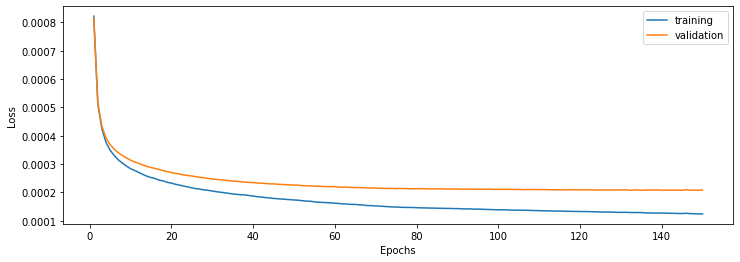

In [21]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size = 75, gamma=0.5)

epochs = 150

#training
tl, vl = DL.train_decode_model_ver2(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, \
                                    epochs, device, scheduler = scheduler)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

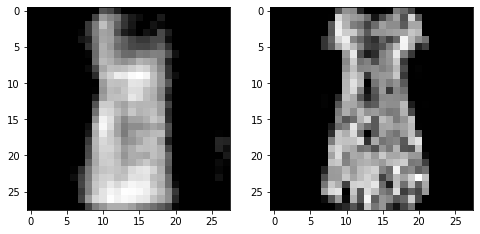

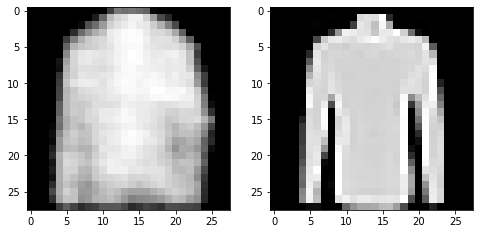

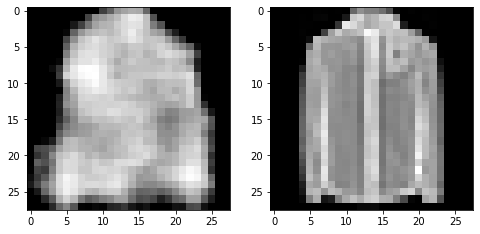

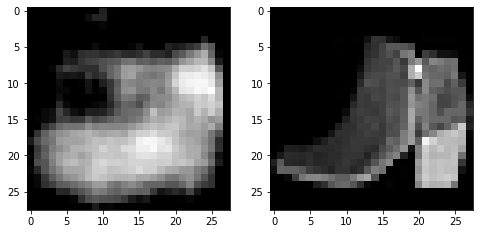

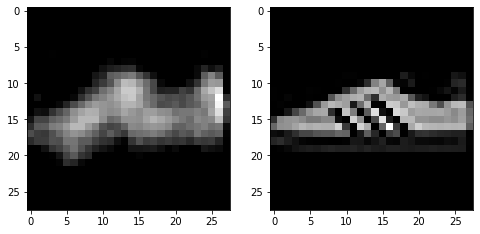

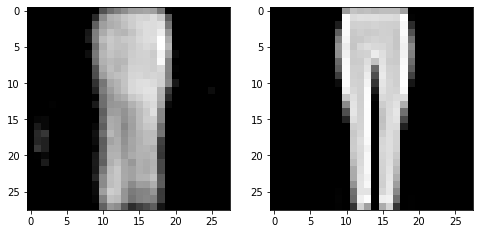

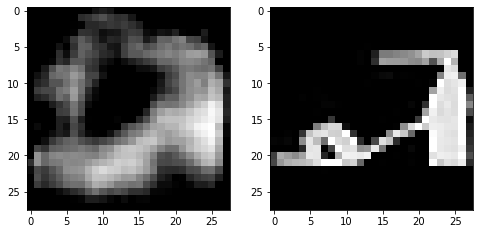

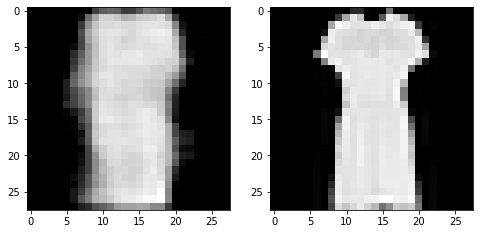

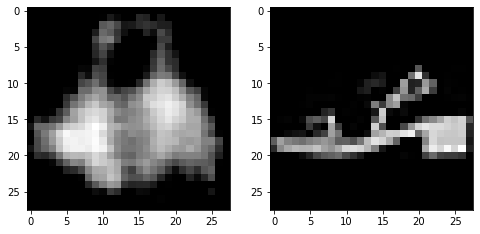

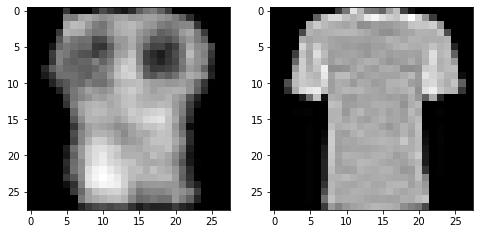

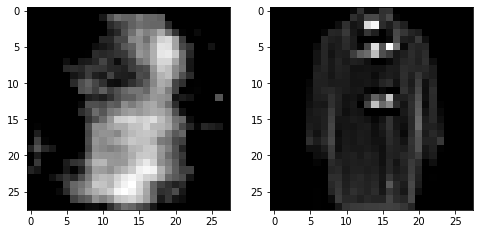

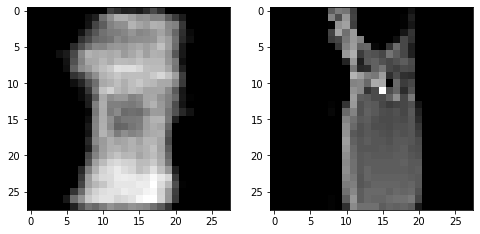

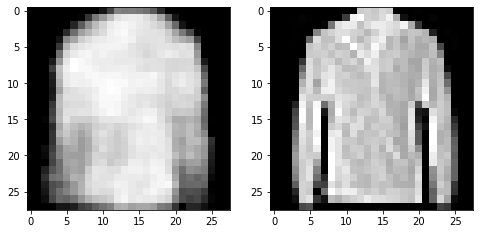

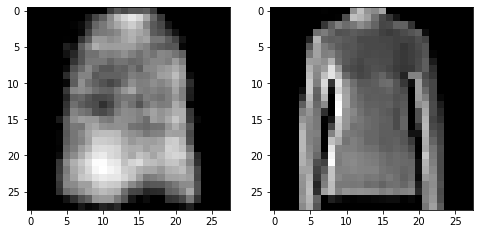

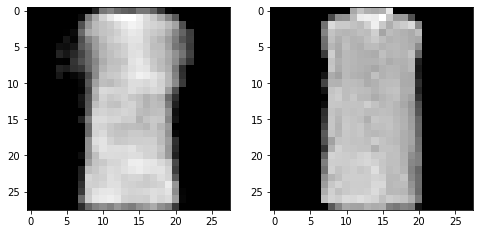

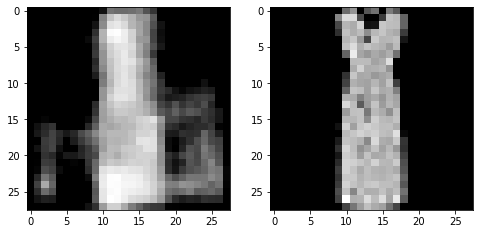

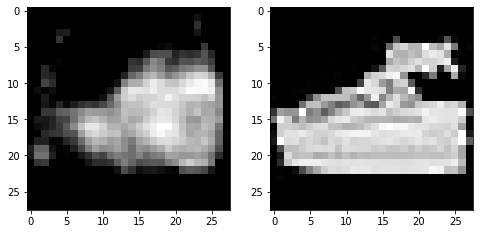

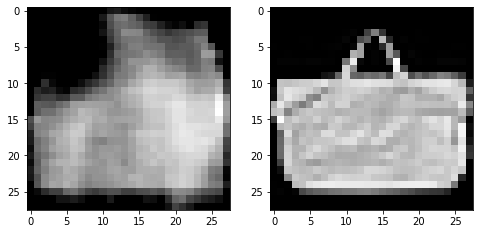

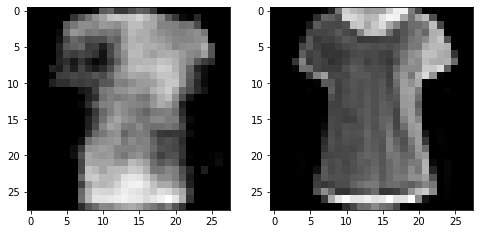

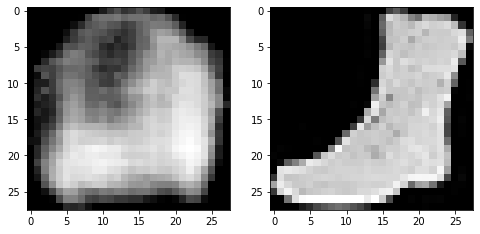

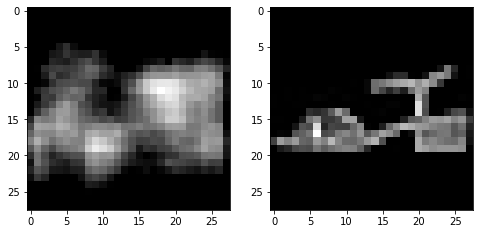

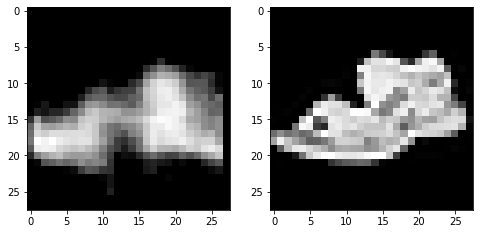

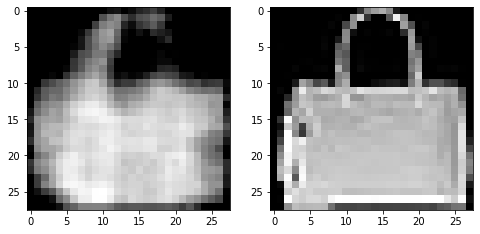

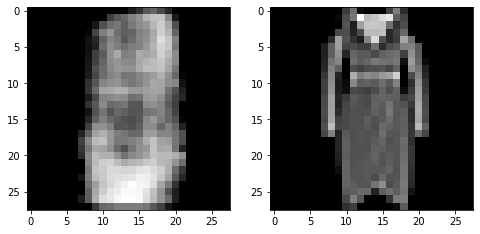

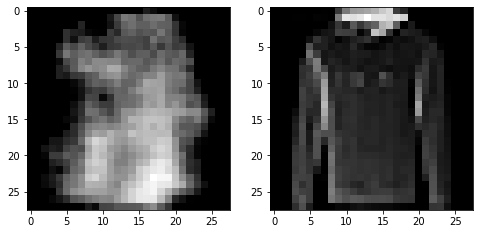

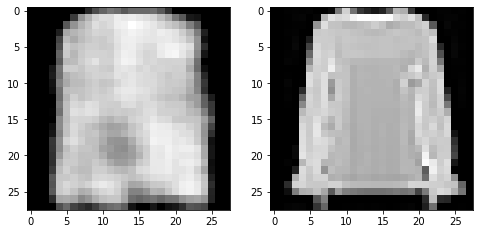

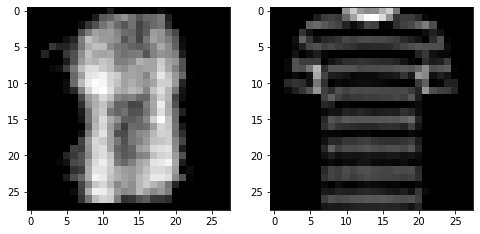

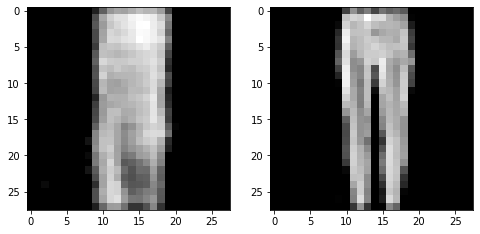

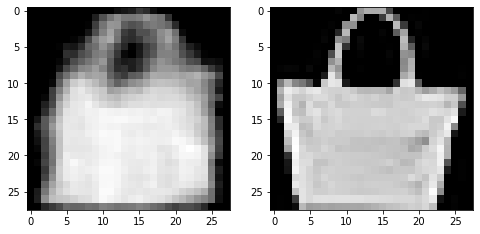

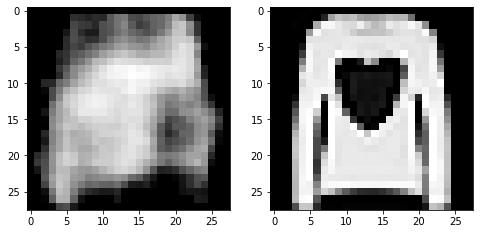

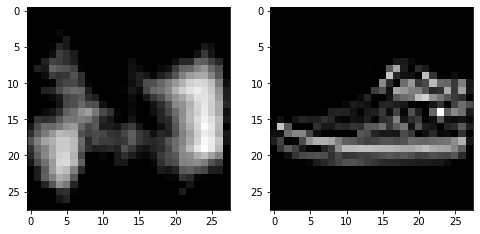

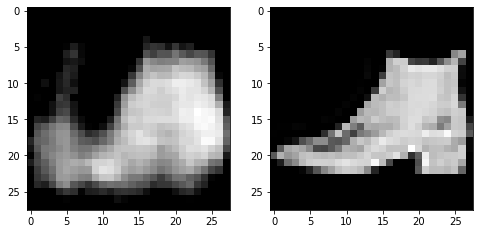

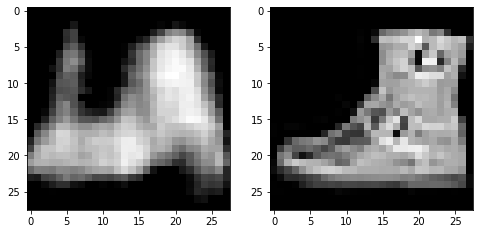

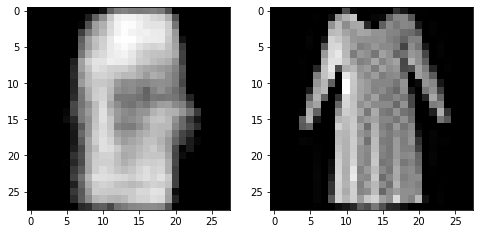

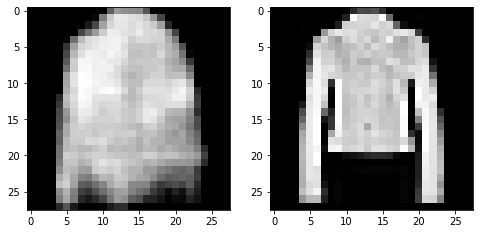

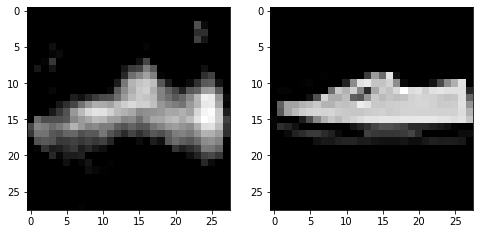

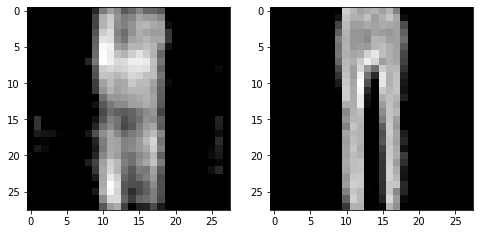

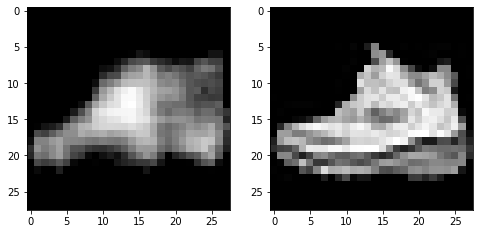

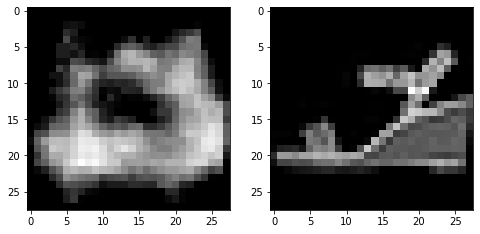

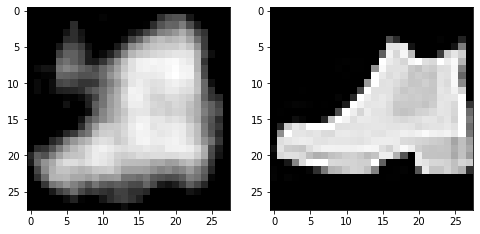

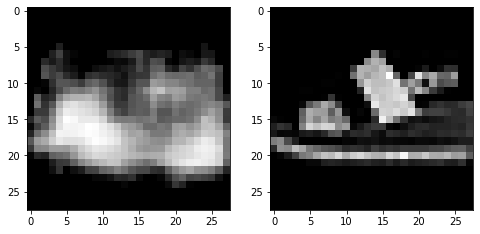

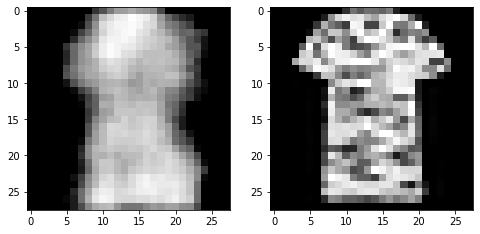

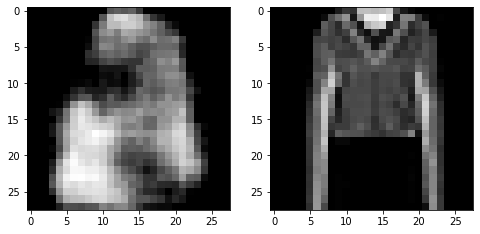

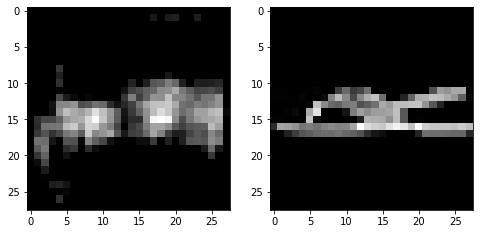

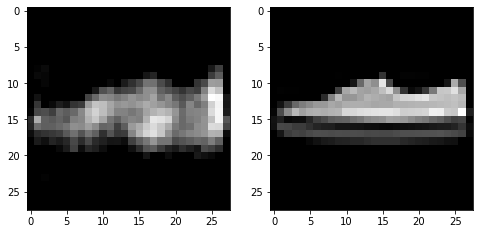

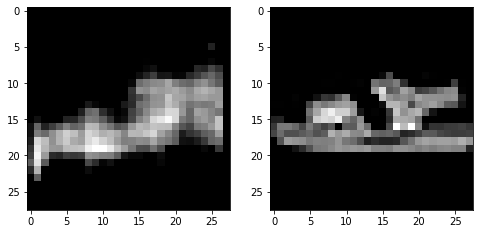

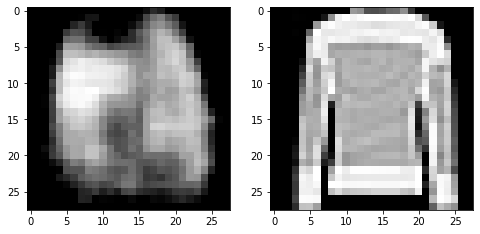

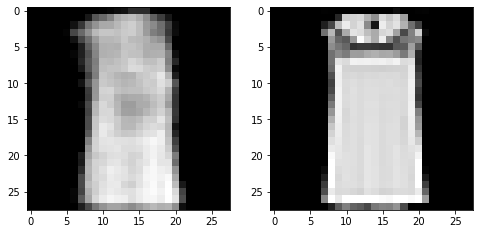

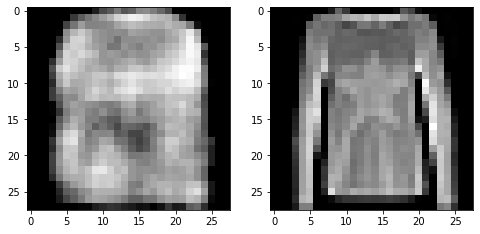

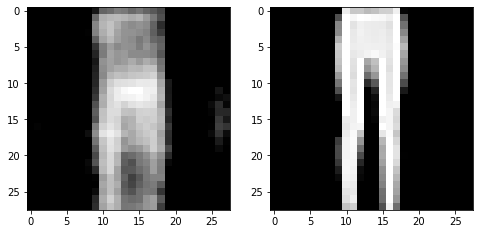

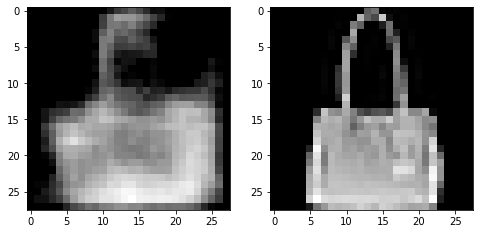

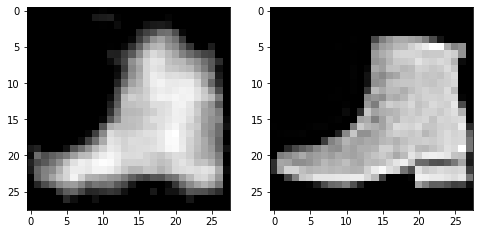

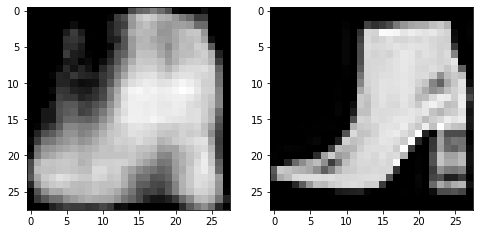

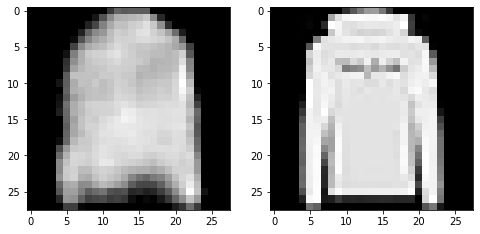

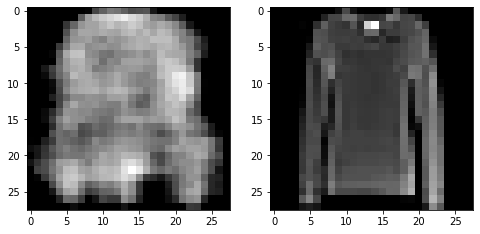

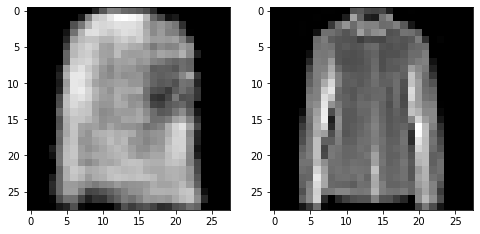

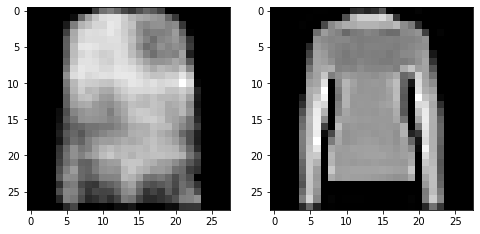

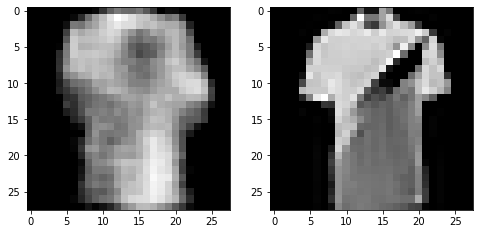

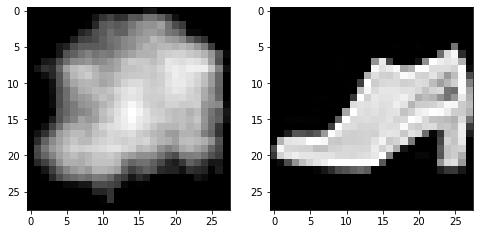

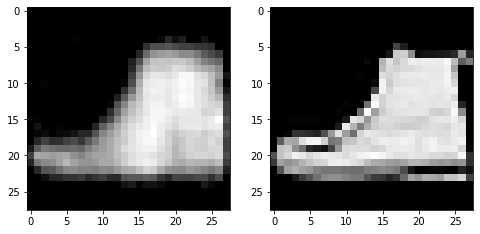

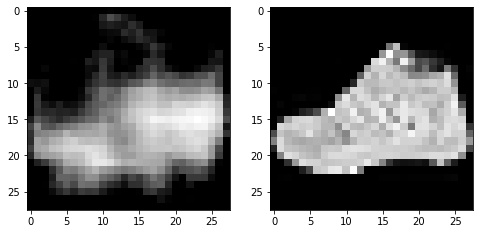

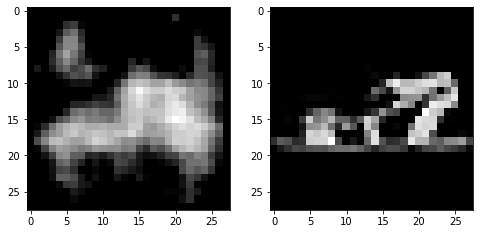

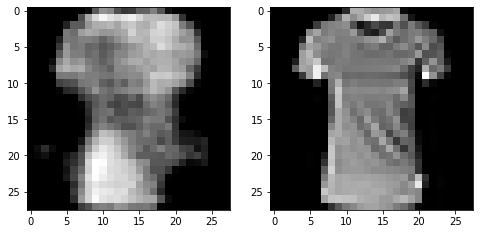

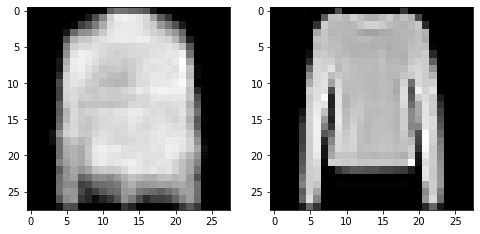

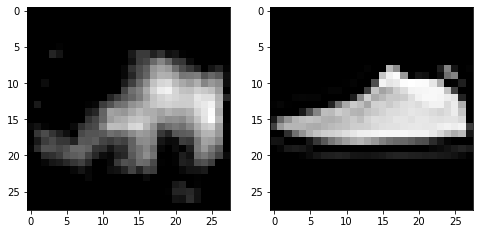

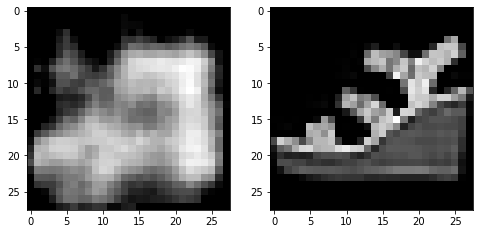

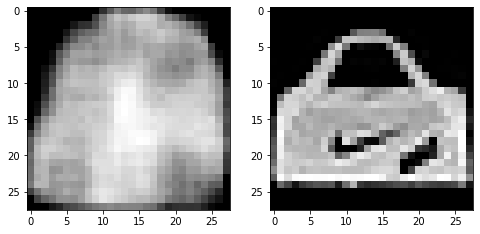

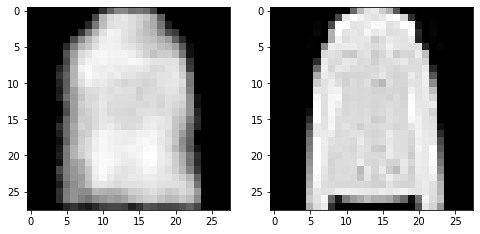

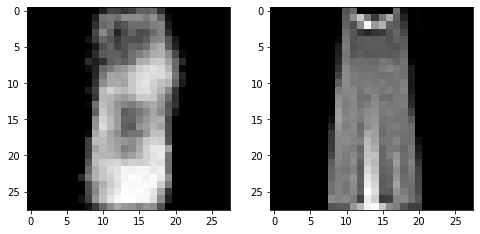

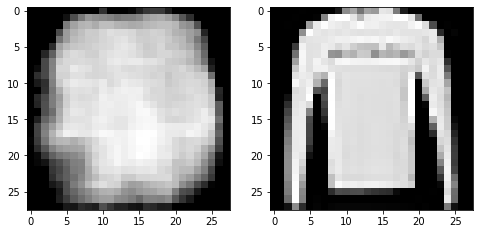

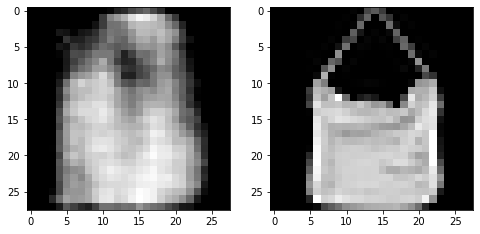

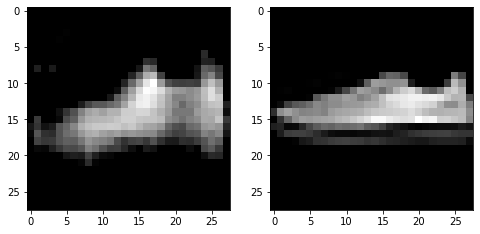

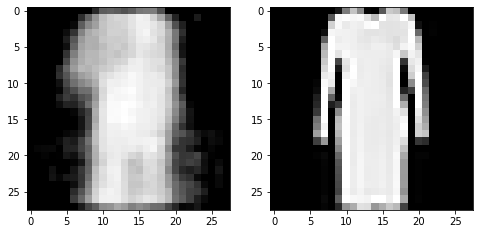

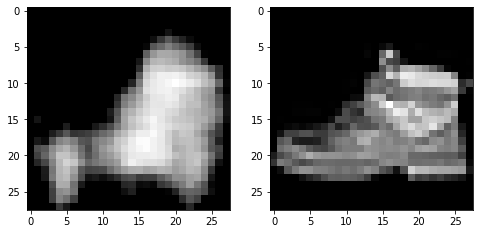

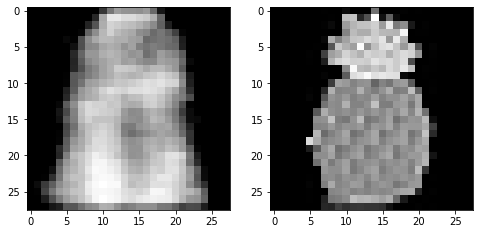

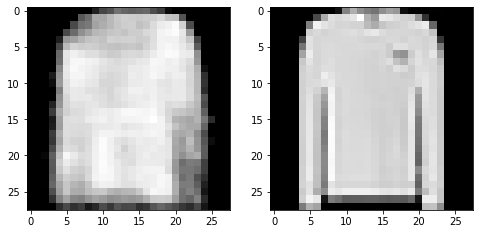

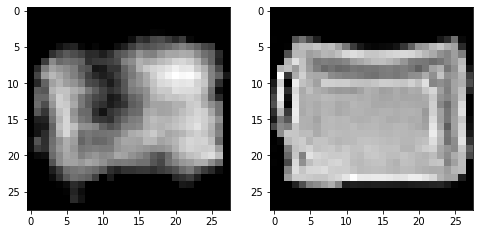

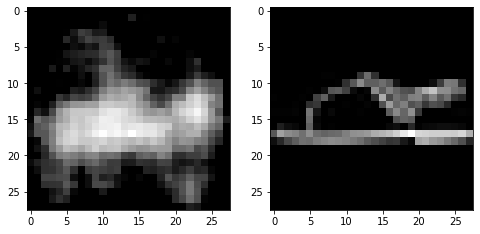

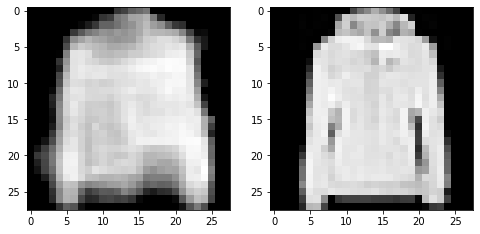

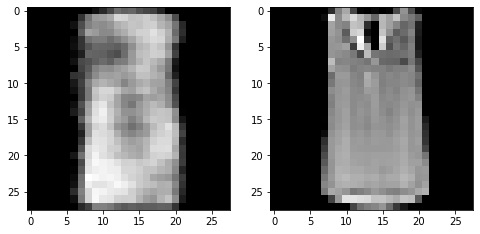

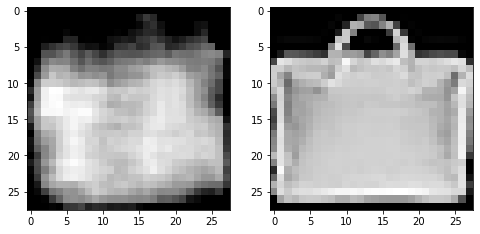

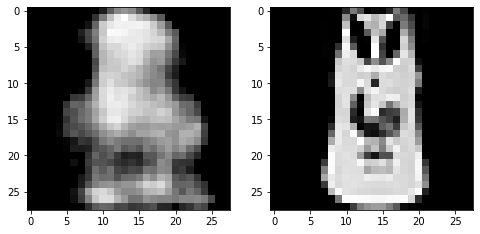

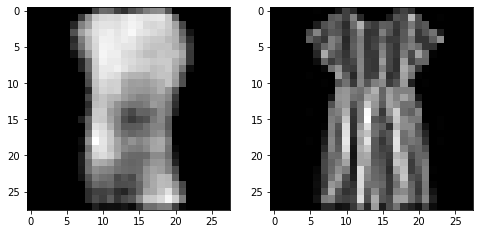

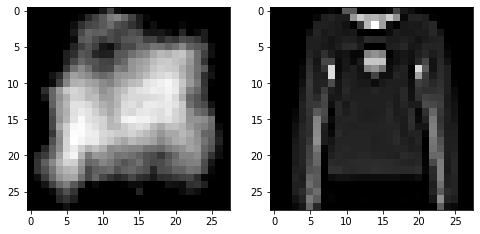

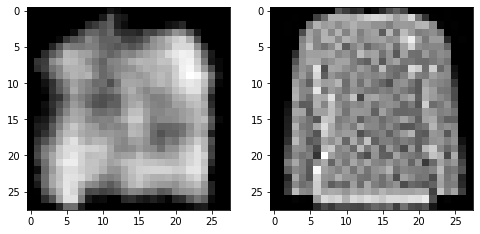

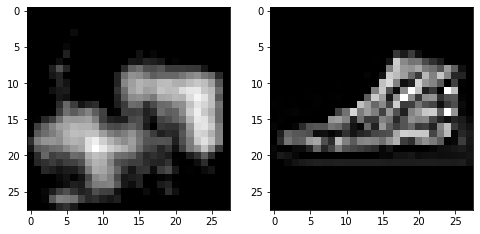

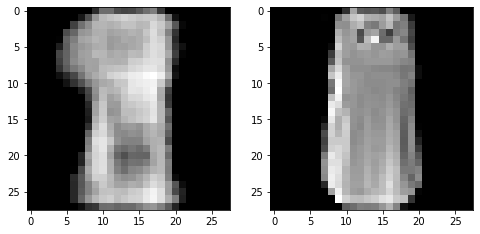

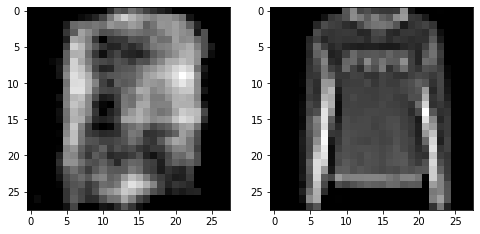

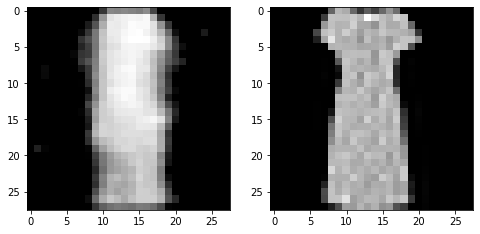

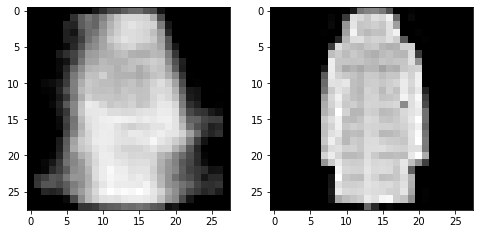

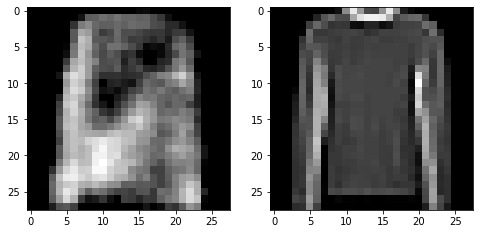

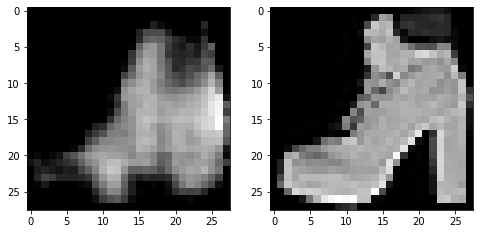

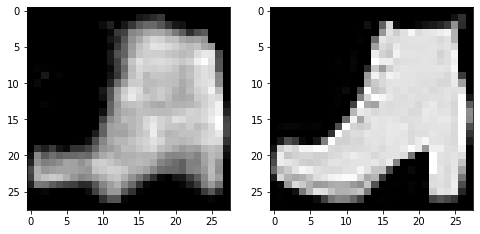

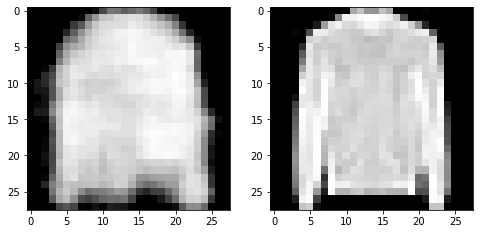

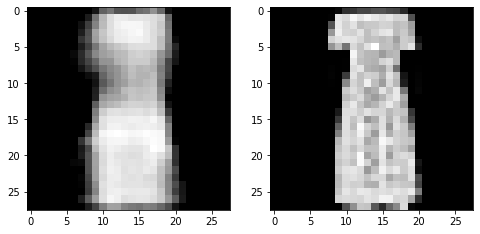

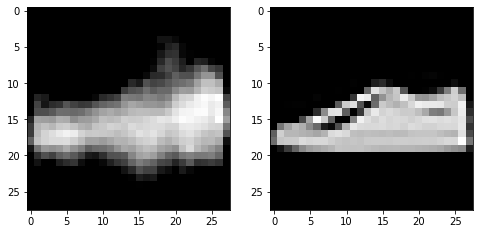

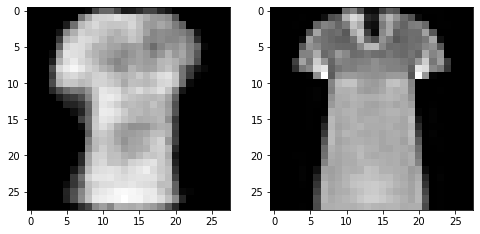

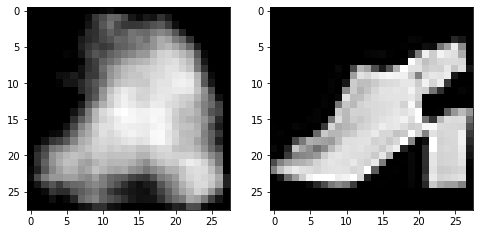

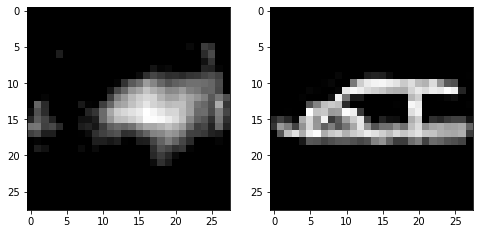

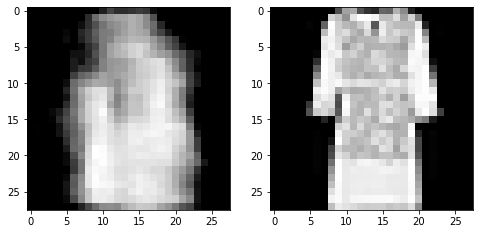

In [22]:
ftest = mnc.My_numpy(1,  '../dat/experiment/SLM/fm/fm_1_23000_slt0.6_N3_lsd_mean.dat')
ftest.simread(23000, 1600)

fimtest = mnc.My_numpy(1, '../dat/bindat/1byte/fm_28_1.dat')
fimtest.binread(23000, 28, 28)

data = np.vstack((ftest.data[:21000], ftest.data[22000:]))
data.shape

oriimg = np.vstack((fimtest.data[:21000], fimtest.data[22000:]))
oriimg.shape

data = data.reshape(22000,1,1600)
oriimg = oriimg.reshape(22000,1,28,28)

tset = mtc.My_dataset(data, oriimg)
tset.numpy2tensor()

tset.splitdata(21000)

tset.datanormalize()
tset.labelnormalize()

tset.tensor2dataset()

tl = DataLoader(tset.dataset_val, batch_size = 256, shuffle = False)


psnrs = DL.test_decode_model_and_check_img_ver3(tl, 28, 28, model, device, 8, 4, 1, 100, "../img/expe_dec", \
                                                label_array = None, datanorm = True, correctimgnorm = True)


In [33]:
msim = mnc.My_numpy(1, '../dat/experiment/SLM/mnist/mean/m_1_23000_fps2_N10_lsd_mean.dat')
msim.simread(22000, 1600)
msim.data.shape

(22000, 1600)

In [34]:
mimg = mnc.My_numpy(1, '../dat/bindat/1byte/m_28_1.dat')
mimg.binread(22000, 28, 28)
mimg.data.shape

(22000, 28, 28)

In [35]:
msim.data = msim.data.reshape(22000, 1, 1600)
mimg.data = mimg.data.reshape(22000, 1, 28, 28)
myset = mtc.My_dataset(msim.data, mimg.data)
myset.numpy2tensor()
myset.splitdata(21000)
myset.datanormalize()
myset.labelnormalize()

In [36]:
torch.std(myset.data_t), torch.std(myset.data_v), torch.mean(myset.data_t), torch.mean(myset.data_v)

(tensor(1.0000), tensor(0.7951), tensor(2.2321e-07), tensor(-0.1722))

In [37]:
myset.tensor2dataset()

In [38]:
myset.dataset_train[0][0].shape, myset.dataset_train[0][1].shape

(torch.Size([1, 1600]), torch.Size([1, 28, 28]))

In [39]:
batch=256
norm_loader_m_t = DataLoader(myset.dataset_train, batch_size = batch, shuffle = True)
norm_loader_m_v = DataLoader(myset.dataset_val, batch_size = batch, shuffle = False)

In [15]:
criterion = nn.MSELoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#model_ver3
#28x28出力
kernel_size = [6,4,4,4,4,4]
stride_list = [1,1,1,1,1,1]
padding_list = [4,4,2,2,2,2]
outpadding_list = [0,0,0,0,0,0]
in_channel_list = [1,64,128,256,128,64]
out_channel_list = [64,128,256,128,64,1]

model = my_model.simnet_decoder_allsize(1600, 1600, 40, 40, kernel_size, stride_list, padding_list,
                                        outpadding_list, in_channel_list, out_channel_list).to(device)


In [11]:
summary(model = model, input_size = (1, 1, 1600), depth = 4)

Layer (type:depth-idx)                        Output Shape              Param #
simnet_decoder_allsize                        --                        --
├─Linear: 1-1                                 [1, 1, 1600]              2,561,600
├─ReLU: 1-2                                   [1, 1, 1600]              --
├─Sequential: 1-3                             [1, 1, 28, 28]            --
│    └─Convtp_Bn_ReLu: 2-1                    [1, 64, 37, 37]           --
│    │    └─Sequential: 3-1                   [1, 64, 37, 37]           --
│    │    │    └─ConvTranspose2d: 4-1         [1, 64, 37, 37]           2,368
│    │    │    └─BatchNorm2d: 4-2             [1, 64, 37, 37]           128
│    │    │    └─ReLU: 4-3                    [1, 64, 37, 37]           --
│    └─Convtp_Bn_ReLu: 2-2                    [1, 128, 32, 32]          --
│    │    └─Sequential: 3-2                   [1, 128, 32, 32]          --
│    │    │    └─ConvTranspose2d: 4-4         [1, 128, 32, 32]          131,200
│   

エポック1--------------------------------
epochtime:1.1478分, train_loss:0.4485, val_loss:0.4390
エポック2--------------------------------
epochtime:1.1481分, train_loss:0.3211, val_loss:0.3262
エポック3--------------------------------
epochtime:1.1493分, train_loss:0.2934, val_loss:0.2980
エポック4--------------------------------
epochtime:1.1478分, train_loss:0.2817, val_loss:0.2868
エポック5--------------------------------
epochtime:1.1490分, train_loss:0.2751, val_loss:0.2801
エポック6--------------------------------
epochtime:1.1496分, train_loss:0.2712, val_loss:0.2762
エポック7--------------------------------
epochtime:1.1386分, train_loss:0.2678, val_loss:0.2729
エポック8--------------------------------
epochtime:0.5586分, train_loss:0.2652, val_loss:0.2694
エポック9--------------------------------
epochtime:0.5586分, train_loss:0.2614, val_loss:0.2663
エポック10--------------------------------
epochtime:0.5586分, train_loss:0.2580, val_loss:0.2622
エポック11--------------------------------
epochtime:0.5586分, train_loss:0.2551, va

エポック90--------------------------------
epochtime:0.5587分, train_loss:0.1277, val_loss:0.1804
エポック91--------------------------------
epochtime:0.5585分, train_loss:0.1229, val_loss:0.1774
エポック92--------------------------------
epochtime:0.5584分, train_loss:0.1223, val_loss:0.1774
エポック93--------------------------------
epochtime:0.5583分, train_loss:0.1213, val_loss:0.1779
エポック94--------------------------------
epochtime:0.5584分, train_loss:0.1239, val_loss:0.1791
エポック95--------------------------------
epochtime:0.5582分, train_loss:0.1230, val_loss:0.1823
エポック96--------------------------------
epochtime:0.5584分, train_loss:0.1197, val_loss:0.1776
エポック97--------------------------------
epochtime:0.5587分, train_loss:0.1192, val_loss:0.1786
エポック98--------------------------------
epochtime:0.5582分, train_loss:0.1194, val_loss:0.1807
エポック99--------------------------------
epochtime:0.5584分, train_loss:0.1244, val_loss:0.1835
エポック100--------------------------------
epochtime:0.5584分, train_loss:

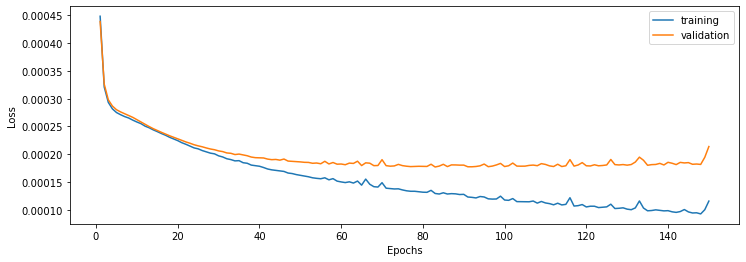

In [12]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 150

#training
tl, vl = DL.train_decode_model_ver2(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, epochs, device)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

In [ ]:
#ガウシアンノイズ

エポック1--------------------------------
epochtime:0.5619分, train_loss:0.4786, val_loss:0.4103
エポック2--------------------------------
epochtime:0.5620分, train_loss:0.3266, val_loss:0.3169
エポック3--------------------------------
epochtime:0.5614分, train_loss:0.2926, val_loss:0.2940
エポック4--------------------------------
epochtime:0.5616分, train_loss:0.2783, val_loss:0.2832
エポック5--------------------------------
epochtime:0.5613分, train_loss:0.2720, val_loss:0.2775
エポック6--------------------------------
epochtime:0.5618分, train_loss:0.2691, val_loss:0.2736
エポック7--------------------------------
epochtime:0.5616分, train_loss:0.2653, val_loss:0.2697
エポック8--------------------------------
epochtime:0.5616分, train_loss:0.2619, val_loss:0.2661
エポック9--------------------------------
epochtime:0.5614分, train_loss:0.2589, val_loss:0.2625
エポック10--------------------------------
epochtime:0.5619分, train_loss:0.2563, val_loss:0.2590
エポック11--------------------------------
epochtime:0.5615分, train_loss:0.2523, va

エポック90--------------------------------
epochtime:0.5642分, train_loss:0.1176, val_loss:0.1863
エポック91--------------------------------
epochtime:0.5666分, train_loss:0.1201, val_loss:0.1872
エポック92--------------------------------
epochtime:0.5638分, train_loss:0.1191, val_loss:0.1876
エポック93--------------------------------
epochtime:0.5632分, train_loss:0.1151, val_loss:0.1854
エポック94--------------------------------
epochtime:0.5628分, train_loss:0.1152, val_loss:0.1864
エポック95--------------------------------
epochtime:0.5632分, train_loss:0.1285, val_loss:0.1968
エポック96--------------------------------
epochtime:0.5627分, train_loss:0.1321, val_loss:0.1991
エポック97--------------------------------
epochtime:0.5631分, train_loss:0.1135, val_loss:0.1860
エポック98--------------------------------
epochtime:0.5630分, train_loss:0.1169, val_loss:0.1908
エポック99--------------------------------
epochtime:0.5625分, train_loss:0.1112, val_loss:0.1867
エポック100--------------------------------
epochtime:0.5629分, train_loss:

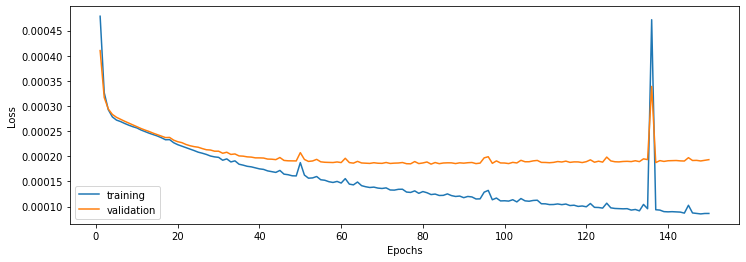

In [14]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 150

#training
tl, vl = DL.train_decode_model_ver2(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, \
                                    epochs, device, gausnoise = True, stddev = 0.05)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

In [ ]:
#スケジューラ

エポック1--------------------------------
epochtime:0.5584分, train_loss:0.4106, val_loss:0.4370
エポック2--------------------------------
epochtime:0.5589分, train_loss:0.3144, val_loss:0.3189
エポック3--------------------------------
epochtime:0.5612分, train_loss:0.2886, val_loss:0.2933
エポック4--------------------------------
epochtime:0.5621分, train_loss:0.2780, val_loss:0.2830
エポック5--------------------------------
epochtime:0.5633分, train_loss:0.2726, val_loss:0.2778
エポック6--------------------------------
epochtime:0.5590分, train_loss:0.2691, val_loss:0.2733
エポック7--------------------------------
epochtime:0.5588分, train_loss:0.2645, val_loss:0.2691
エポック8--------------------------------
epochtime:0.5588分, train_loss:0.2614, val_loss:0.2653
エポック9--------------------------------
epochtime:0.5610分, train_loss:0.2576, val_loss:0.2610
エポック10--------------------------------
epochtime:0.5720分, train_loss:0.2545, val_loss:0.2581
エポック11--------------------------------
epochtime:0.5691分, train_loss:0.2511, va

エポック90--------------------------------
epochtime:0.5583分, train_loss:0.1383, val_loss:0.1751
エポック91--------------------------------
epochtime:0.5591分, train_loss:0.1404, val_loss:0.1761
エポック92--------------------------------
epochtime:0.5584分, train_loss:0.1377, val_loss:0.1741
エポック93--------------------------------
epochtime:0.5588分, train_loss:0.1377, val_loss:0.1745
エポック94--------------------------------
epochtime:0.5589分, train_loss:0.1371, val_loss:0.1745
エポック95--------------------------------
epochtime:0.5589分, train_loss:0.1371, val_loss:0.1746
エポック96--------------------------------
epochtime:0.5586分, train_loss:0.1369, val_loss:0.1746
エポック97--------------------------------
epochtime:0.5586分, train_loss:0.1366, val_loss:0.1733
エポック98--------------------------------
epochtime:0.5586分, train_loss:0.1354, val_loss:0.1742
エポック99--------------------------------
epochtime:0.5589分, train_loss:0.1347, val_loss:0.1734
エポック100--------------------------------
epochtime:0.5587分, train_loss:

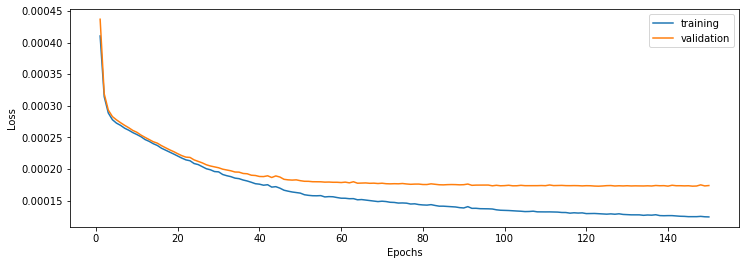

In [16]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

epochs = 150

#training
tl, vl = DL.train_decode_model_ver2(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, \
                                    epochs, device, scheduler = scheduler)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

In [ ]:
#スケジューラ＋mixup

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

epochs = 150

#training
tl, vl = DL.train_decode_model_mixup(norm_loader_m_t, norm_loader_m_v, model, \
                                     criterion, optimizer, epochs, device, mixalpha = 1.2, scheduler = scheduler)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

エポック1--------------------------------
epochtime:0.5618分, train_loss:0.4285, val_loss:0.4298
エポック2--------------------------------
epochtime:0.5591分, train_loss:0.3146, val_loss:0.3148
エポック3--------------------------------
epochtime:0.5572分, train_loss:0.2935, val_loss:0.2969
エポック4--------------------------------
epochtime:0.5574分, train_loss:0.2848, val_loss:0.2891
エポック5--------------------------------
epochtime:0.5575分, train_loss:0.2818, val_loss:0.2862
エポック6--------------------------------
epochtime:0.5579分, train_loss:0.2762, val_loss:0.2820
エポック7--------------------------------
epochtime:0.5579分, train_loss:0.2723, val_loss:0.2783
エポック8--------------------------------
epochtime:0.5593分, train_loss:0.2719, val_loss:0.2774
エポック9--------------------------------
epochtime:0.5594分, train_loss:0.2691, val_loss:0.2749
エポック10--------------------------------
epochtime:0.5641分, train_loss:0.2665, val_loss:0.2726
エポック11--------------------------------
epochtime:0.5692分, train_loss:0.2638, va

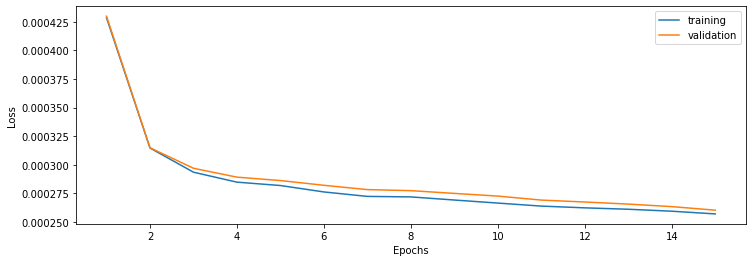

In [11]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 15

#training
tl, vl = DL.train_decode_model_mixup(norm_loader_m_t, norm_loader_m_v, model, \
                                     criterion, optimizer, epochs, device, mixalpha = 1.0)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

エポック1--------------------------------
epochtime:0.5604分, train_loss:1.5882, val_loss:2.1222
エポック2--------------------------------
epochtime:0.5574分, train_loss:1.1520, val_loss:1.5431
エポック3--------------------------------
epochtime:0.5566分, train_loss:0.9336, val_loss:1.1506
エポック4--------------------------------
epochtime:0.5577分, train_loss:0.7619, val_loss:0.8545
エポック5--------------------------------
epochtime:0.5620分, train_loss:0.6522, val_loss:0.6885
エポック6--------------------------------
epochtime:0.5695分, train_loss:0.5540, val_loss:0.5642
エポック7--------------------------------
epochtime:0.5620分, train_loss:0.4957, val_loss:0.4976
エポック8--------------------------------
epochtime:0.5600分, train_loss:0.4560, val_loss:0.4567
エポック9--------------------------------
epochtime:0.5654分, train_loss:0.4280, val_loss:0.4330
エポック10--------------------------------
epochtime:0.5624分, train_loss:0.4020, val_loss:0.4077
エポック11--------------------------------
epochtime:0.5585分, train_loss:0.3809, va

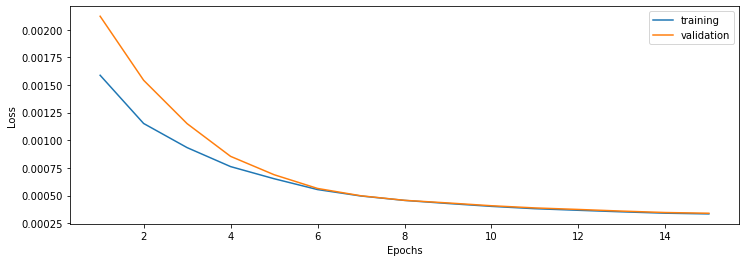

In [11]:
optimizer = optim.Adam(model.parameters(), lr=0.000001)

epochs = 15

#training
tl, vl = DL.train_decode_model_ver2(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, epochs, device)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

エポック1--------------------------------
epochtime:0.5603分, train_loss:0.4970, val_loss:0.5008
エポック2--------------------------------
epochtime:0.5610分, train_loss:0.3231, val_loss:0.3275
エポック3--------------------------------
epochtime:0.5588分, train_loss:0.2926, val_loss:0.2956
エポック4--------------------------------
epochtime:0.5597分, train_loss:0.2825, val_loss:0.2870
エポック5--------------------------------
epochtime:0.5632分, train_loss:0.2771, val_loss:0.2813
エポック6--------------------------------
epochtime:0.5612分, train_loss:0.2728, val_loss:0.2766
エポック7--------------------------------
epochtime:0.5620分, train_loss:0.2692, val_loss:0.2723
エポック8--------------------------------
epochtime:0.5616分, train_loss:0.2657, val_loss:0.2691
エポック9--------------------------------
epochtime:0.5631分, train_loss:0.2628, val_loss:0.2654
エポック10--------------------------------
epochtime:0.5625分, train_loss:0.2602, val_loss:0.2623
エポック11--------------------------------
epochtime:0.5611分, train_loss:0.2565, va

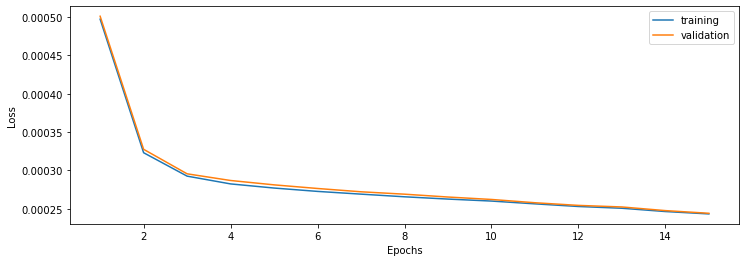

In [13]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 15

#training
tl, vl = DL.train_decode_model_ver2(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, epochs, device)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

In [33]:
criterion = nn.MSELoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#model_ver3
#28x28出力
kernel_size = [4,4,4,4]
stride_list = [1,1,1,1]
padding_list = [4,4,2,2]
outpadding_list = [0,0,0,0]
in_channel_list = [1,64,128,64]
out_channel_list = [64,128,64,1]

model = my_model.simnet_decoder_allsize(1600, 1600, 40, 40, kernel_size, stride_list, padding_list,
                                        outpadding_list, in_channel_list, out_channel_list).to(device)


In [34]:
summary(model = model, input_size = (1, 1, 1600), depth = 4)

Layer (type:depth-idx)                        Output Shape              Param #
simnet_decoder_allsize                        --                        --
├─Linear: 1-1                                 [1, 1, 1600]              2,561,600
├─ReLU: 1-2                                   [1, 1, 1600]              --
├─Sequential: 1-3                             [1, 1, 28, 28]            --
│    └─Convtp_Bn_ReLu: 2-1                    [1, 64, 35, 35]           --
│    │    └─Sequential: 3-1                   [1, 64, 35, 35]           --
│    │    │    └─ConvTranspose2d: 4-1         [1, 64, 35, 35]           1,088
│    │    │    └─BatchNorm2d: 4-2             [1, 64, 35, 35]           128
│    │    │    └─ReLU: 4-3                    [1, 64, 35, 35]           --
│    └─Convtp_Bn_ReLu: 2-2                    [1, 128, 30, 30]          --
│    │    └─Sequential: 3-2                   [1, 128, 30, 30]          --
│    │    │    └─ConvTranspose2d: 4-4         [1, 128, 30, 30]          131,200
│   

エポック1--------------------------------
epochtime:0.1787分, train_loss:0.6399, val_loss:0.6920
エポック2--------------------------------
epochtime:0.1788分, train_loss:0.4043, val_loss:0.4134
エポック3--------------------------------
epochtime:0.1809分, train_loss:0.3266, val_loss:0.3317
エポック4--------------------------------
epochtime:0.1788分, train_loss:0.3003, val_loss:0.3044
エポック5--------------------------------
epochtime:0.1788分, train_loss:0.2886, val_loss:0.2927
エポック6--------------------------------
epochtime:0.1809分, train_loss:0.2815, val_loss:0.2857
エポック7--------------------------------
epochtime:0.1795分, train_loss:0.2760, val_loss:0.2806
エポック8--------------------------------
epochtime:0.1810分, train_loss:0.2715, val_loss:0.2767
エポック9--------------------------------
epochtime:0.1823分, train_loss:0.2684, val_loss:0.2733
エポック10--------------------------------
epochtime:0.1821分, train_loss:0.2656, val_loss:0.2702
エポック11--------------------------------
epochtime:0.1810分, train_loss:0.2625, va

エポック90--------------------------------
epochtime:0.1798分, train_loss:0.1611, val_loss:0.1812
エポック91--------------------------------
epochtime:0.1793分, train_loss:0.1604, val_loss:0.1802
エポック92--------------------------------
epochtime:0.1795分, train_loss:0.1599, val_loss:0.1802
エポック93--------------------------------
epochtime:0.1795分, train_loss:0.1598, val_loss:0.1798
エポック94--------------------------------
epochtime:0.1807分, train_loss:0.1588, val_loss:0.1796
エポック95--------------------------------
epochtime:0.1801分, train_loss:0.1587, val_loss:0.1795
エポック96--------------------------------
epochtime:0.1802分, train_loss:0.1580, val_loss:0.1793
エポック97--------------------------------
epochtime:0.1798分, train_loss:0.1581, val_loss:0.1792
エポック98--------------------------------
epochtime:0.1811分, train_loss:0.1580, val_loss:0.1791
エポック99--------------------------------
epochtime:0.1825分, train_loss:0.1570, val_loss:0.1789
エポック100--------------------------------
epochtime:0.1808分, train_loss:

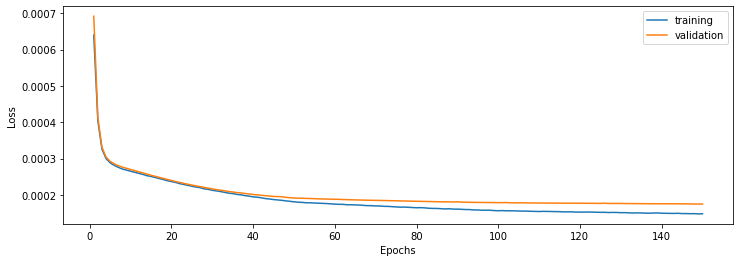

In [35]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

epochs = 150

#training
tl, vl = DL.train_decode_model_ver2(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, \
                                    epochs, device, scheduler = scheduler)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

In [38]:
criterion = nn.MSELoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#model_ver3
#28x28出力
kernel_size = [4,4,4,4]
stride_list = [1,1,1,1]
padding_list = [4,4,2,2]
outpadding_list = [0,0,0,0]
in_channel_list = [1,64,128,256]
out_channel_list = [64,128,256,1]

model = my_model.simnet_decoder_allsize(1600, 1600, 40, 40, kernel_size, stride_list, padding_list,
                                        outpadding_list, in_channel_list, out_channel_list).to(device)


In [39]:
summary(model = model, input_size = (1, 1, 1600), depth = 4)

Layer (type:depth-idx)                        Output Shape              Param #
simnet_decoder_allsize                        --                        --
├─Linear: 1-1                                 [1, 1, 1600]              2,561,600
├─ReLU: 1-2                                   [1, 1, 1600]              --
├─Sequential: 1-3                             [1, 1, 28, 28]            --
│    └─Convtp_Bn_ReLu: 2-1                    [1, 64, 35, 35]           --
│    │    └─Sequential: 3-1                   [1, 64, 35, 35]           --
│    │    │    └─ConvTranspose2d: 4-1         [1, 64, 35, 35]           1,088
│    │    │    └─BatchNorm2d: 4-2             [1, 64, 35, 35]           128
│    │    │    └─ReLU: 4-3                    [1, 64, 35, 35]           --
│    └─Convtp_Bn_ReLu: 2-2                    [1, 128, 30, 30]          --
│    │    └─Sequential: 3-2                   [1, 128, 30, 30]          --
│    │    │    └─ConvTranspose2d: 4-4         [1, 128, 30, 30]          131,200
│   

エポック1--------------------------------
epochtime:0.3110分, train_loss:0.5394, val_loss:0.5898
エポック2--------------------------------
epochtime:0.3129分, train_loss:0.3303, val_loss:0.3393
エポック3--------------------------------
epochtime:0.3120分, train_loss:0.2983, val_loss:0.3035
エポック4--------------------------------
epochtime:0.3139分, train_loss:0.2894, val_loss:0.2947
エポック5--------------------------------
epochtime:0.3118分, train_loss:0.2800, val_loss:0.2857
エポック6--------------------------------
epochtime:0.3114分, train_loss:0.2758, val_loss:0.2811
エポック7--------------------------------
epochtime:0.3092分, train_loss:0.2715, val_loss:0.2772
エポック8--------------------------------
epochtime:0.3100分, train_loss:0.2681, val_loss:0.2737
エポック9--------------------------------
epochtime:0.3094分, train_loss:0.2650, val_loss:0.2706
エポック10--------------------------------
epochtime:0.3118分, train_loss:0.2631, val_loss:0.2678
エポック11--------------------------------
epochtime:0.3173分, train_loss:0.2600, va

エポック90--------------------------------
epochtime:0.3100分, train_loss:0.1578, val_loss:0.1821
エポック91--------------------------------
epochtime:0.3098分, train_loss:0.1568, val_loss:0.1801
エポック92--------------------------------
epochtime:0.3101分, train_loss:0.1562, val_loss:0.1802
エポック93--------------------------------
epochtime:0.3098分, train_loss:0.1561, val_loss:0.1803
エポック94--------------------------------
epochtime:0.3102分, train_loss:0.1562, val_loss:0.1802
エポック95--------------------------------
epochtime:0.3105分, train_loss:0.1554, val_loss:0.1796
エポック96--------------------------------
epochtime:0.3101分, train_loss:0.1551, val_loss:0.1797
エポック97--------------------------------
epochtime:0.3099分, train_loss:0.1542, val_loss:0.1795
エポック98--------------------------------
epochtime:0.3102分, train_loss:0.1544, val_loss:0.1801
エポック99--------------------------------
epochtime:0.3097分, train_loss:0.1535, val_loss:0.1791
エポック100--------------------------------
epochtime:0.3101分, train_loss:

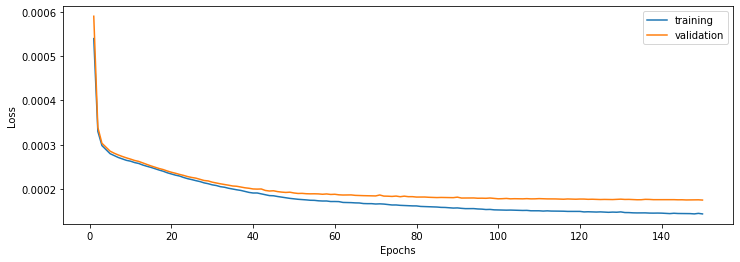

In [40]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

epochs = 150

#training
tl, vl = DL.train_decode_model_ver2(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, \
                                    epochs, device, scheduler = scheduler)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

In [ ]:
#モデル小さいときはスケジューラ変える
#mixup使う

In [29]:
criterion = nn.MSELoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#model_ver3
#28x28出力
kernel_size = [4,4,3]
stride_list = [1,1,1]
padding_list = [4,4,2]
outpadding_list = [0,0,0]
in_channel_list = [1, 32, 64]
out_channel_list = [32, 64, 1]

model = my_model.simnet_decoder_allsize(1600, 1600, 40, 40, kernel_size, stride_list, padding_list,
                                        outpadding_list, in_channel_list, out_channel_list).to(device)
summary(model = model, input_size = (1, 1, 1600), depth = 4)

Layer (type:depth-idx)                        Output Shape              Param #
simnet_decoder_allsize                        --                        --
├─Linear: 1-1                                 [1, 1, 1600]              2,561,600
├─ReLU: 1-2                                   [1, 1, 1600]              --
├─Sequential: 1-3                             [1, 1, 28, 28]            --
│    └─Convtp_Bn_ReLu: 2-1                    [1, 32, 35, 35]           --
│    │    └─Sequential: 3-1                   [1, 32, 35, 35]           --
│    │    │    └─ConvTranspose2d: 4-1         [1, 32, 35, 35]           544
│    │    │    └─BatchNorm2d: 4-2             [1, 32, 35, 35]           64
│    │    │    └─ReLU: 4-3                    [1, 32, 35, 35]           --
│    └─Convtp_Bn_ReLu: 2-2                    [1, 64, 30, 30]           --
│    │    └─Sequential: 3-2                   [1, 64, 30, 30]           --
│    │    │    └─ConvTranspose2d: 4-4         [1, 64, 30, 30]           32,832
│    │  

エポック1--------------------------------
epochtime:0.0518分, train_loss:1.1442, val_loss:1.1157
エポック2--------------------------------
epochtime:0.0515分, train_loss:0.6976, val_loss:0.7484
エポック3--------------------------------
epochtime:0.0502分, train_loss:0.4883, val_loss:0.5258
エポック4--------------------------------
epochtime:0.0493分, train_loss:0.4151, val_loss:0.4422
エポック5--------------------------------
epochtime:0.0492分, train_loss:0.3684, val_loss:0.3860
エポック6--------------------------------
epochtime:0.0490分, train_loss:0.3410, val_loss:0.3562
エポック7--------------------------------
epochtime:0.0494分, train_loss:0.3235, val_loss:0.3401
エポック8--------------------------------
epochtime:0.0489分, train_loss:0.3074, val_loss:0.3218
エポック9--------------------------------
epochtime:0.0489分, train_loss:0.2992, val_loss:0.3139
エポック10--------------------------------
epochtime:0.0489分, train_loss:0.2898, val_loss:0.3020
エポック11--------------------------------
epochtime:0.0492分, train_loss:0.2856, va

エポック90--------------------------------
epochtime:0.0491分, train_loss:0.1693, val_loss:0.1919
エポック91--------------------------------
epochtime:0.0491分, train_loss:0.1698, val_loss:0.1921
エポック92--------------------------------
epochtime:0.0490分, train_loss:0.1690, val_loss:0.1915
エポック93--------------------------------
epochtime:0.0490分, train_loss:0.1686, val_loss:0.1914
エポック94--------------------------------
epochtime:0.0491分, train_loss:0.1685, val_loss:0.1913
エポック95--------------------------------
epochtime:0.0493分, train_loss:0.1680, val_loss:0.1909
エポック96--------------------------------
epochtime:0.0490分, train_loss:0.1676, val_loss:0.1906
エポック97--------------------------------
epochtime:0.0491分, train_loss:0.1672, val_loss:0.1904
エポック98--------------------------------
epochtime:0.0491分, train_loss:0.1669, val_loss:0.1905
エポック99--------------------------------
epochtime:0.0490分, train_loss:0.1663, val_loss:0.1909
エポック100--------------------------------
epochtime:0.0490分, train_loss:

エポック178--------------------------------
epochtime:0.0490分, train_loss:0.1490, val_loss:0.1829
エポック179--------------------------------
epochtime:0.0490分, train_loss:0.1488, val_loss:0.1832
エポック180--------------------------------
epochtime:0.0495分, train_loss:0.1490, val_loss:0.1830
エポック181--------------------------------
epochtime:0.0490分, train_loss:0.1491, val_loss:0.1838
エポック182--------------------------------
epochtime:0.0491分, train_loss:0.1485, val_loss:0.1827
エポック183--------------------------------
epochtime:0.0490分, train_loss:0.1486, val_loss:0.1837
エポック184--------------------------------
epochtime:0.0495分, train_loss:0.1482, val_loss:0.1829
エポック185--------------------------------
epochtime:0.0490分, train_loss:0.1482, val_loss:0.1834
エポック186--------------------------------
epochtime:0.0490分, train_loss:0.1487, val_loss:0.1835
エポック187--------------------------------
epochtime:0.0490分, train_loss:0.1482, val_loss:0.1825
エポック188--------------------------------
epochtime:0.0495分, t

エポック266--------------------------------
epochtime:0.0490分, train_loss:0.1420, val_loss:0.1818
エポック267--------------------------------
epochtime:0.0491分, train_loss:0.1419, val_loss:0.1805
エポック268--------------------------------
epochtime:0.0491分, train_loss:0.1421, val_loss:0.1802
エポック269--------------------------------
epochtime:0.0490分, train_loss:0.1415, val_loss:0.1805
エポック270--------------------------------
epochtime:0.0490分, train_loss:0.1411, val_loss:0.1808
エポック271--------------------------------
epochtime:0.0491分, train_loss:0.1415, val_loss:0.1807
エポック272--------------------------------
epochtime:0.0490分, train_loss:0.1416, val_loss:0.1801
エポック273--------------------------------
epochtime:0.0490分, train_loss:0.1413, val_loss:0.1803
エポック274--------------------------------
epochtime:0.0492分, train_loss:0.1414, val_loss:0.1807
エポック275--------------------------------
epochtime:0.0491分, train_loss:0.1414, val_loss:0.1807
エポック276--------------------------------
epochtime:0.0490分, t

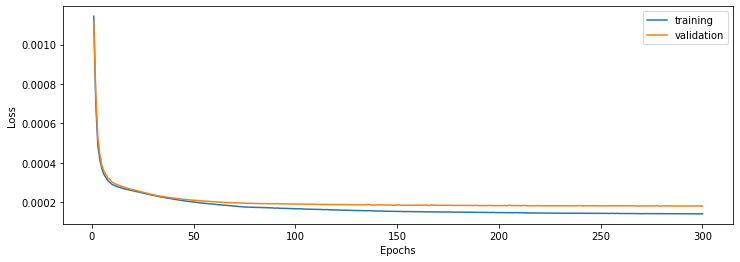

In [30]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size = 75, gamma=0.5)

epochs = 300

#training
tl, vl = DL.train_decode_model_ver2(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, \
                                    epochs, device, scheduler = scheduler)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

In [42]:
criterion = nn.MSELoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#model_ver3
#28x28出力
kernel_size = [4,4,4,4]
stride_list = [1,1,1,1]
padding_list = [4,4,2,2]
outpadding_list = [0,0,0,0]
in_channel_list = [1, 32, 64, 128]
out_channel_list = [32, 64, 128, 1]

model = my_model.simnet_decoder_allsize(1600, 1600, 40, 40, kernel_size, stride_list, padding_list,
                                        outpadding_list, in_channel_list, out_channel_list).to(device)


In [43]:
summary(model = model, input_size = (1, 1, 1600), depth = 4)

Layer (type:depth-idx)                        Output Shape              Param #
simnet_decoder_allsize                        --                        --
├─Linear: 1-1                                 [1, 1, 1600]              2,561,600
├─ReLU: 1-2                                   [1, 1, 1600]              --
├─Sequential: 1-3                             [1, 1, 28, 28]            --
│    └─Convtp_Bn_ReLu: 2-1                    [1, 32, 35, 35]           --
│    │    └─Sequential: 3-1                   [1, 32, 35, 35]           --
│    │    │    └─ConvTranspose2d: 4-1         [1, 32, 35, 35]           544
│    │    │    └─BatchNorm2d: 4-2             [1, 32, 35, 35]           64
│    │    │    └─ReLU: 4-3                    [1, 32, 35, 35]           --
│    └─Convtp_Bn_ReLu: 2-2                    [1, 64, 30, 30]           --
│    │    └─Sequential: 3-2                   [1, 64, 30, 30]           --
│    │    │    └─ConvTranspose2d: 4-4         [1, 64, 30, 30]           32,832
│    │  

エポック1--------------------------------
epochtime:0.1187分, train_loss:0.7806, val_loss:0.9378
エポック2--------------------------------
epochtime:0.1190分, train_loss:0.4120, val_loss:0.4430
エポック3--------------------------------
epochtime:0.1212分, train_loss:0.3298, val_loss:0.3455
エポック4--------------------------------
epochtime:0.1186分, train_loss:0.3055, val_loss:0.3145
エポック5--------------------------------
epochtime:0.1179分, train_loss:0.2936, val_loss:0.3021
エポック6--------------------------------
epochtime:0.1186分, train_loss:0.2861, val_loss:0.2933
エポック7--------------------------------
epochtime:0.1187分, train_loss:0.2808, val_loss:0.2874
エポック8--------------------------------
epochtime:0.1182分, train_loss:0.2761, val_loss:0.2828
エポック9--------------------------------
epochtime:0.1192分, train_loss:0.2724, val_loss:0.2792
エポック10--------------------------------
epochtime:0.1182分, train_loss:0.2700, val_loss:0.2763
エポック11--------------------------------
epochtime:0.1182分, train_loss:0.2675, va

エポック90--------------------------------
epochtime:0.1183分, train_loss:0.1520, val_loss:0.1757
エポック91--------------------------------
epochtime:0.1187分, train_loss:0.1519, val_loss:0.1752
エポック92--------------------------------
epochtime:0.1190分, train_loss:0.1519, val_loss:0.1749
エポック93--------------------------------
epochtime:0.1185分, train_loss:0.1511, val_loss:0.1749
エポック94--------------------------------
epochtime:0.1186分, train_loss:0.1507, val_loss:0.1746
エポック95--------------------------------
epochtime:0.1197分, train_loss:0.1504, val_loss:0.1743
エポック96--------------------------------
epochtime:0.1196分, train_loss:0.1501, val_loss:0.1744
エポック97--------------------------------
epochtime:0.1187分, train_loss:0.1493, val_loss:0.1740
エポック98--------------------------------
epochtime:0.1185分, train_loss:0.1494, val_loss:0.1741
エポック99--------------------------------
epochtime:0.1187分, train_loss:0.1490, val_loss:0.1741
エポック100--------------------------------
epochtime:0.1189分, train_loss:

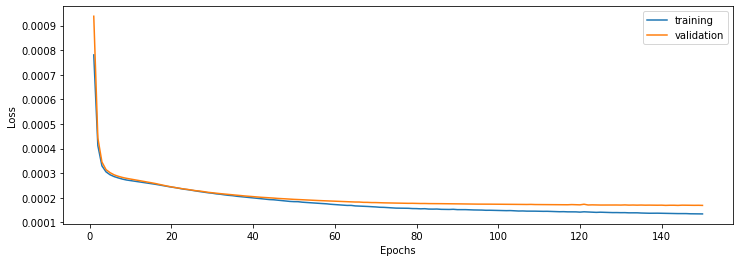

In [43]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size = 75, gamma=0.5)

epochs = 150

#training
tl, vl = DL.train_decode_model_ver2(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, \
                                    epochs, device, scheduler = scheduler)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

エポック1--------------------------------
epochtime:0.1211分, train_loss:0.5848, val_loss:0.6828
エポック2--------------------------------
epochtime:0.1193分, train_loss:0.3966, val_loss:0.4390
エポック3--------------------------------
epochtime:0.1169分, train_loss:0.3336, val_loss:0.3494
エポック4--------------------------------
epochtime:0.1171分, train_loss:0.3000, val_loss:0.3073
エポック5--------------------------------
epochtime:0.1193分, train_loss:0.2894, val_loss:0.2956
エポック6--------------------------------
epochtime:0.1174分, train_loss:0.2810, val_loss:0.2858
エポック7--------------------------------
epochtime:0.1168分, train_loss:0.2750, val_loss:0.2799
エポック8--------------------------------
epochtime:0.1213分, train_loss:0.2717, val_loss:0.2764
エポック9--------------------------------
epochtime:0.1169分, train_loss:0.2680, val_loss:0.2719
エポック10--------------------------------
epochtime:0.1178分, train_loss:0.2645, val_loss:0.2680
エポック11--------------------------------
epochtime:0.1182分, train_loss:0.2614, va

エポック90--------------------------------
epochtime:0.1171分, train_loss:0.1507, val_loss:0.1771
エポック91--------------------------------
epochtime:0.1166分, train_loss:0.1501, val_loss:0.1772
エポック92--------------------------------
epochtime:0.1170分, train_loss:0.1496, val_loss:0.1771
エポック93--------------------------------
epochtime:0.1167分, train_loss:0.1498, val_loss:0.1771
エポック94--------------------------------
epochtime:0.1164分, train_loss:0.1491, val_loss:0.1768
エポック95--------------------------------
epochtime:0.1193分, train_loss:0.1490, val_loss:0.1767
エポック96--------------------------------
epochtime:0.1182分, train_loss:0.1486, val_loss:0.1765
エポック97--------------------------------
epochtime:0.1182分, train_loss:0.1481, val_loss:0.1761
エポック98--------------------------------
epochtime:0.1191分, train_loss:0.1476, val_loss:0.1758
エポック99--------------------------------
epochtime:0.1177分, train_loss:0.1473, val_loss:0.1759
エポック100--------------------------------
epochtime:0.1176分, train_loss:

エポック178--------------------------------
epochtime:0.1165分, train_loss:0.1286, val_loss:0.1700
エポック179--------------------------------
epochtime:0.1166分, train_loss:0.1288, val_loss:0.1699
エポック180--------------------------------
epochtime:0.1165分, train_loss:0.1288, val_loss:0.1697
エポック181--------------------------------
epochtime:0.1165分, train_loss:0.1287, val_loss:0.1698
エポック182--------------------------------
epochtime:0.1165分, train_loss:0.1286, val_loss:0.1699
エポック183--------------------------------
epochtime:0.1165分, train_loss:0.1289, val_loss:0.1698
エポック184--------------------------------
epochtime:0.1165分, train_loss:0.1283, val_loss:0.1697
エポック185--------------------------------
epochtime:0.1166分, train_loss:0.1282, val_loss:0.1694
エポック186--------------------------------
epochtime:0.1165分, train_loss:0.1280, val_loss:0.1698
エポック187--------------------------------
epochtime:0.1166分, train_loss:0.1279, val_loss:0.1695
エポック188--------------------------------
epochtime:0.1168分, t

エポック266--------------------------------
epochtime:0.1169分, train_loss:0.1215, val_loss:0.1686
エポック267--------------------------------
epochtime:0.1169分, train_loss:0.1215, val_loss:0.1682
エポック268--------------------------------
epochtime:0.1167分, train_loss:0.1216, val_loss:0.1680
エポック269--------------------------------
epochtime:0.1169分, train_loss:0.1215, val_loss:0.1681
エポック270--------------------------------
epochtime:0.1168分, train_loss:0.1215, val_loss:0.1682
エポック271--------------------------------
epochtime:0.1167分, train_loss:0.1211, val_loss:0.1680
エポック272--------------------------------
epochtime:0.1168分, train_loss:0.1211, val_loss:0.1682
エポック273--------------------------------
epochtime:0.1168分, train_loss:0.1211, val_loss:0.1679
エポック274--------------------------------
epochtime:0.1168分, train_loss:0.1212, val_loss:0.1680
エポック275--------------------------------
epochtime:0.1166分, train_loss:0.1211, val_loss:0.1681
エポック276--------------------------------
epochtime:0.1166分, t

エポック354--------------------------------
epochtime:0.1167分, train_loss:0.1185, val_loss:0.1673
エポック355--------------------------------
epochtime:0.1167分, train_loss:0.1185, val_loss:0.1675
エポック356--------------------------------
epochtime:0.1166分, train_loss:0.1185, val_loss:0.1678
エポック357--------------------------------
epochtime:0.1167分, train_loss:0.1187, val_loss:0.1677
エポック358--------------------------------
epochtime:0.1168分, train_loss:0.1184, val_loss:0.1677
エポック359--------------------------------
epochtime:0.1173分, train_loss:0.1183, val_loss:0.1675
エポック360--------------------------------
epochtime:0.1167分, train_loss:0.1183, val_loss:0.1676
エポック361--------------------------------
epochtime:0.1167分, train_loss:0.1182, val_loss:0.1675
エポック362--------------------------------
epochtime:0.1167分, train_loss:0.1182, val_loss:0.1676
エポック363--------------------------------
epochtime:0.1167分, train_loss:0.1185, val_loss:0.1681
エポック364--------------------------------
epochtime:0.1168分, t

エポック442--------------------------------
epochtime:0.1166分, train_loss:0.1176, val_loss:0.1674
エポック443--------------------------------
epochtime:0.1165分, train_loss:0.1171, val_loss:0.1673
エポック444--------------------------------
epochtime:0.1169分, train_loss:0.1173, val_loss:0.1674
エポック445--------------------------------
epochtime:0.1173分, train_loss:0.1166, val_loss:0.1674
エポック446--------------------------------
epochtime:0.1172分, train_loss:0.1171, val_loss:0.1675
エポック447--------------------------------
epochtime:0.1167分, train_loss:0.1171, val_loss:0.1673
エポック448--------------------------------
epochtime:0.1166分, train_loss:0.1170, val_loss:0.1675
エポック449--------------------------------
epochtime:0.1170分, train_loss:0.1171, val_loss:0.1672
エポック450--------------------------------
epochtime:0.1167分, train_loss:0.1172, val_loss:0.1672
エポック451--------------------------------
epochtime:0.1167分, train_loss:0.1169, val_loss:0.1678
エポック452--------------------------------
epochtime:0.1167分, t

エポック530--------------------------------
epochtime:0.1168分, train_loss:0.1163, val_loss:0.1675
エポック531--------------------------------
epochtime:0.1169分, train_loss:0.1164, val_loss:0.1676
エポック532--------------------------------
epochtime:0.1166分, train_loss:0.1168, val_loss:0.1674
エポック533--------------------------------
epochtime:0.1172分, train_loss:0.1166, val_loss:0.1673
エポック534--------------------------------
epochtime:0.1171分, train_loss:0.1169, val_loss:0.1673
エポック535--------------------------------
epochtime:0.1167分, train_loss:0.1167, val_loss:0.1673
エポック536--------------------------------
epochtime:0.1167分, train_loss:0.1169, val_loss:0.1671
エポック537--------------------------------
epochtime:0.1170分, train_loss:0.1166, val_loss:0.1675
エポック538--------------------------------
epochtime:0.1166分, train_loss:0.1166, val_loss:0.1678
エポック539--------------------------------
epochtime:0.1167分, train_loss:0.1169, val_loss:0.1673
エポック540--------------------------------
epochtime:0.1169分, t

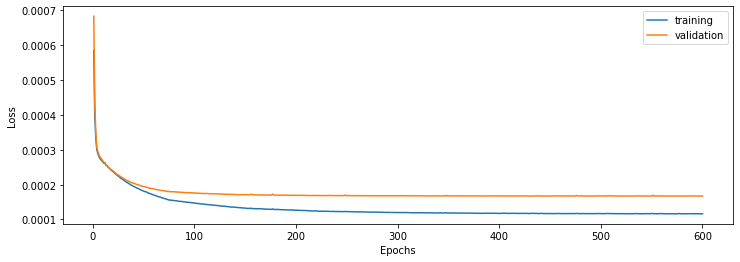

In [44]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size = 75, gamma=0.5)

epochs = 600

#training
tl, vl = DL.train_decode_model_ver2(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, \
                                    epochs, device, scheduler = scheduler)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

エポック1--------------------------------
epochtime:0.1189分, train_loss:0.6916, val_loss:0.8511
エポック2--------------------------------
epochtime:0.1184分, train_loss:0.3672, val_loss:0.3879
エポック3--------------------------------
epochtime:0.1179分, train_loss:0.3172, val_loss:0.3272
エポック4--------------------------------
epochtime:0.1181分, train_loss:0.3009, val_loss:0.3095
エポック5--------------------------------
epochtime:0.1185分, train_loss:0.2941, val_loss:0.2993
エポック6--------------------------------
epochtime:0.1186分, train_loss:0.2872, val_loss:0.2938
エポック7--------------------------------
epochtime:0.1184分, train_loss:0.2828, val_loss:0.2887
エポック8--------------------------------
epochtime:0.1186分, train_loss:0.2803, val_loss:0.2852
エポック9--------------------------------
epochtime:0.1186分, train_loss:0.2771, val_loss:0.2822
エポック10--------------------------------
epochtime:0.1189分, train_loss:0.2741, val_loss:0.2793
エポック11--------------------------------
epochtime:0.1185分, train_loss:0.2723, va

エポック90--------------------------------
epochtime:0.1189分, train_loss:0.2046, val_loss:0.2086
エポック91--------------------------------
epochtime:0.1190分, train_loss:0.2006, val_loss:0.2053
エポック92--------------------------------
epochtime:0.1199分, train_loss:0.2037, val_loss:0.2084
エポック93--------------------------------
epochtime:0.1191分, train_loss:0.2026, val_loss:0.2081
エポック94--------------------------------
epochtime:0.1191分, train_loss:0.1979, val_loss:0.2038
エポック95--------------------------------
epochtime:0.1187分, train_loss:0.1985, val_loss:0.2032
エポック96--------------------------------
epochtime:0.1193分, train_loss:0.2022, val_loss:0.2080
エポック97--------------------------------
epochtime:0.1187分, train_loss:0.1965, val_loss:0.2023
エポック98--------------------------------
epochtime:0.1187分, train_loss:0.2002, val_loss:0.2057
エポック99--------------------------------
epochtime:0.1187分, train_loss:0.1938, val_loss:0.2001
エポック100--------------------------------
epochtime:0.1197分, train_loss:

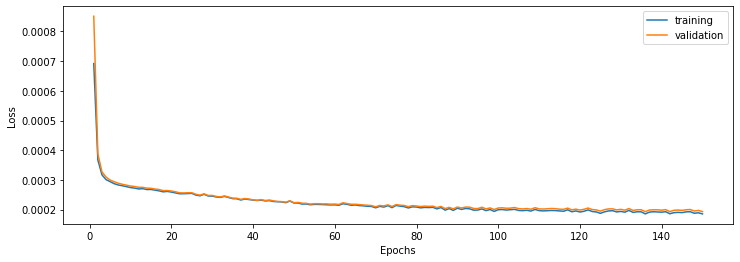

In [49]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

epochs = 150

#training
tl, vl = DL.train_decode_model_mixup(norm_loader_m_t, norm_loader_m_v, model, \
                                     criterion, optimizer, epochs, device, mixalpha = 1.2, scheduler = scheduler)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

In [50]:
criterion = nn.MSELoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#model_ver3
#28x28出力
kernel_size = [4, 4, 4, 4]
stride_list = [1, 1, 1, 1]
padding_list = [4, 4, 2, 2]
outpadding_list = [0, 0, 0, 0]
in_channel_list = [1, 64, 128, 256]
out_channel_list = [64, 128, 256, 1]

model = my_model.simnet_decoder_allsize(1600, 1600, 40, 40, kernel_size, stride_list, padding_list,
                                        outpadding_list, in_channel_list, out_channel_list).to(device)


In [51]:
summary(model = model, input_size = (1, 1, 1600), depth = 4)

Layer (type:depth-idx)                        Output Shape              Param #
simnet_decoder_allsize                        --                        --
├─Linear: 1-1                                 [1, 1, 1600]              2,561,600
├─ReLU: 1-2                                   [1, 1, 1600]              --
├─Sequential: 1-3                             [1, 1, 28, 28]            --
│    └─Convtp_Bn_ReLu: 2-1                    [1, 64, 35, 35]           --
│    │    └─Sequential: 3-1                   [1, 64, 35, 35]           --
│    │    │    └─ConvTranspose2d: 4-1         [1, 64, 35, 35]           1,088
│    │    │    └─BatchNorm2d: 4-2             [1, 64, 35, 35]           128
│    │    │    └─ReLU: 4-3                    [1, 64, 35, 35]           --
│    └─Convtp_Bn_ReLu: 2-2                    [1, 128, 30, 30]          --
│    │    └─Sequential: 3-2                   [1, 128, 30, 30]          --
│    │    │    └─ConvTranspose2d: 4-4         [1, 128, 30, 30]          131,200
│   

エポック1--------------------------------
epochtime:0.3114分, train_loss:0.5151, val_loss:0.5714
エポック2--------------------------------
epochtime:0.3128分, train_loss:0.3423, val_loss:0.3517
エポック3--------------------------------
epochtime:0.3106分, train_loss:0.3086, val_loss:0.3142
エポック4--------------------------------
epochtime:0.3088分, train_loss:0.2932, val_loss:0.2989
エポック5--------------------------------
epochtime:0.3086分, train_loss:0.2851, val_loss:0.2913
エポック6--------------------------------
epochtime:0.3088分, train_loss:0.2804, val_loss:0.2854
エポック7--------------------------------
epochtime:0.3092分, train_loss:0.2778, val_loss:0.2826
エポック8--------------------------------
epochtime:0.3088分, train_loss:0.2748, val_loss:0.2794
エポック9--------------------------------
epochtime:0.3087分, train_loss:0.2709, val_loss:0.2769
エポック10--------------------------------
epochtime:0.3090分, train_loss:0.2704, val_loss:0.2752
エポック11--------------------------------
epochtime:0.3094分, train_loss:0.2673, va

エポック90--------------------------------
epochtime:0.3101分, train_loss:0.1870, val_loss:0.1945
エポック91--------------------------------
epochtime:0.3104分, train_loss:0.1867, val_loss:0.1945
エポック92--------------------------------
epochtime:0.3103分, train_loss:0.1859, val_loss:0.1940
エポック93--------------------------------
epochtime:0.3109分, train_loss:0.1862, val_loss:0.1945
エポック94--------------------------------
epochtime:0.3103分, train_loss:0.1859, val_loss:0.1948
エポック95--------------------------------
epochtime:0.3101分, train_loss:0.1871, val_loss:0.1953
エポック96--------------------------------
epochtime:0.3098分, train_loss:0.1852, val_loss:0.1932
エポック97--------------------------------
epochtime:0.3097分, train_loss:0.1825, val_loss:0.1911
エポック98--------------------------------
epochtime:0.3102分, train_loss:0.1860, val_loss:0.1947
エポック99--------------------------------
epochtime:0.3105分, train_loss:0.1819, val_loss:0.1902
エポック100--------------------------------
epochtime:0.3100分, train_loss:

エポック178--------------------------------
epochtime:0.3102分, train_loss:0.1728, val_loss:0.1850
エポック179--------------------------------
epochtime:0.3097分, train_loss:0.1747, val_loss:0.1872
エポック180--------------------------------
epochtime:0.3096分, train_loss:0.1726, val_loss:0.1847
エポック181--------------------------------
epochtime:0.3100分, train_loss:0.1735, val_loss:0.1862
エポック182--------------------------------
epochtime:0.3101分, train_loss:0.1720, val_loss:0.1844
エポック183--------------------------------
epochtime:0.3097分, train_loss:0.1721, val_loss:0.1846
エポック184--------------------------------
epochtime:0.3122分, train_loss:0.1730, val_loss:0.1853
エポック185--------------------------------
epochtime:0.3103分, train_loss:0.1735, val_loss:0.1857
エポック186--------------------------------
epochtime:0.3103分, train_loss:0.1718, val_loss:0.1840
エポック187--------------------------------
epochtime:0.3101分, train_loss:0.1725, val_loss:0.1853
エポック188--------------------------------
epochtime:0.3099分, t

エポック266--------------------------------
epochtime:0.3098分, train_loss:0.1697, val_loss:0.1827
エポック267--------------------------------
epochtime:0.3097分, train_loss:0.1675, val_loss:0.1809
エポック268--------------------------------
epochtime:0.3104分, train_loss:0.1707, val_loss:0.1835
エポック269--------------------------------
epochtime:0.3099分, train_loss:0.1666, val_loss:0.1804
エポック270--------------------------------
epochtime:0.3097分, train_loss:0.1683, val_loss:0.1821
エポック271--------------------------------
epochtime:0.3098分, train_loss:0.1689, val_loss:0.1821
エポック272--------------------------------
epochtime:0.3105分, train_loss:0.1681, val_loss:0.1816
エポック273--------------------------------
epochtime:0.3096分, train_loss:0.1687, val_loss:0.1818
エポック274--------------------------------
epochtime:0.3095分, train_loss:0.1685, val_loss:0.1819
エポック275--------------------------------
epochtime:0.3101分, train_loss:0.1686, val_loss:0.1816
エポック276--------------------------------
epochtime:0.3100分, t

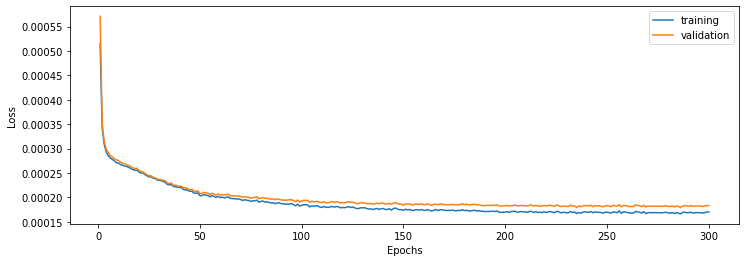

In [52]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)

epochs = 300

#training
tl, vl = DL.train_decode_model_mixup(norm_loader_m_t, norm_loader_m_v, model, \
                                     criterion, optimizer, epochs, device, mixalpha = 1.4, scheduler = scheduler)

#torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl)

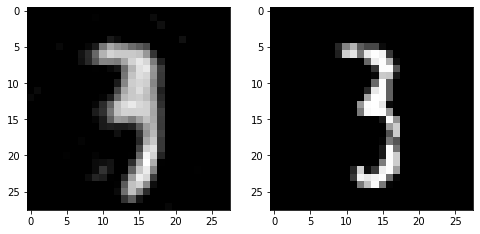

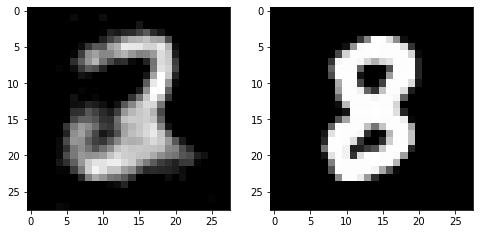

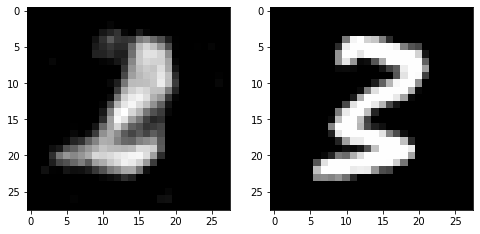

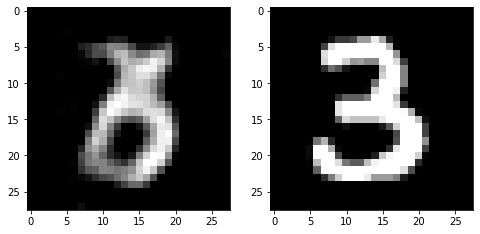

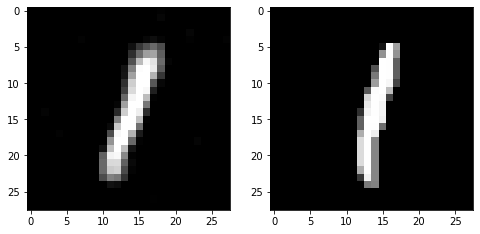

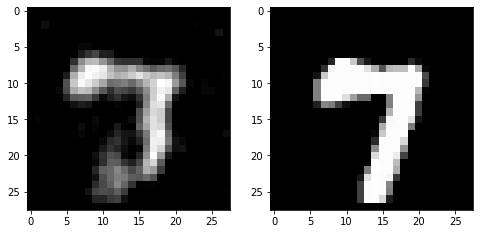

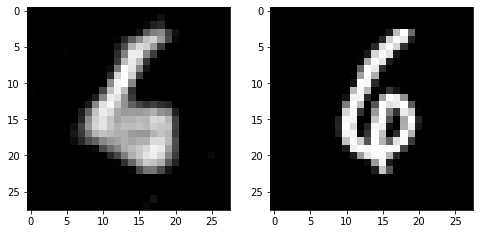

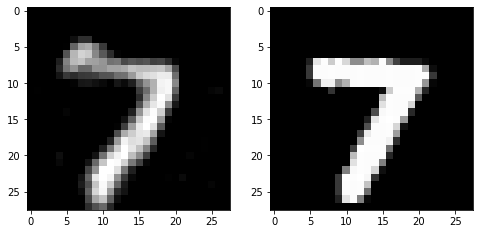

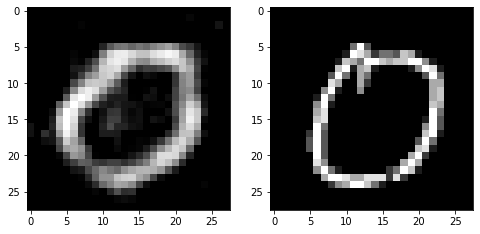

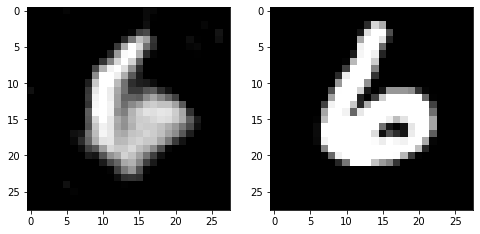

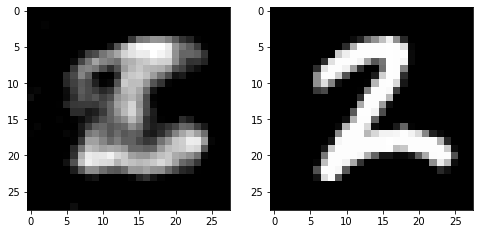

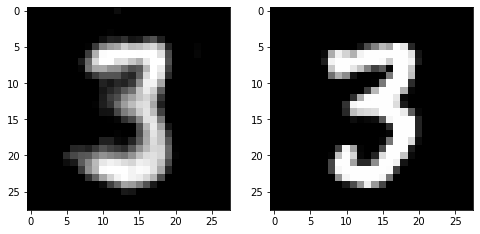

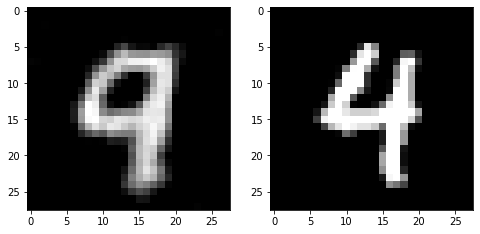

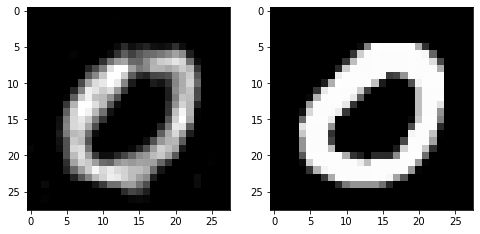

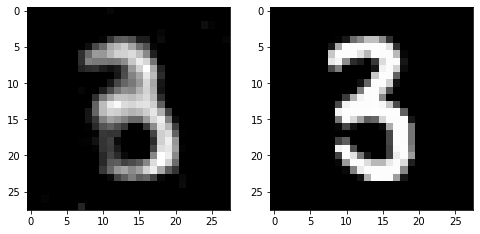

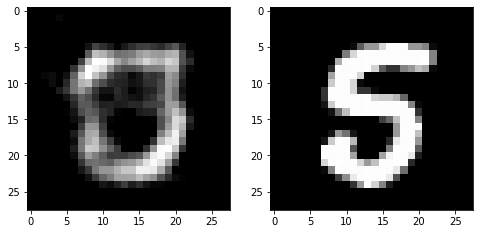

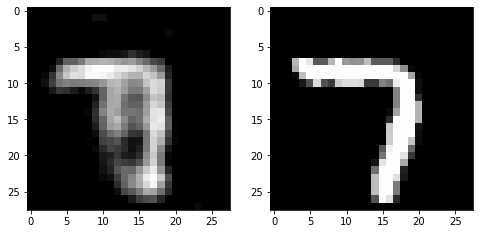

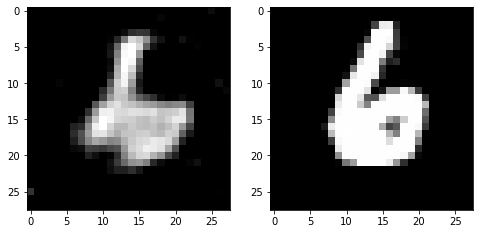

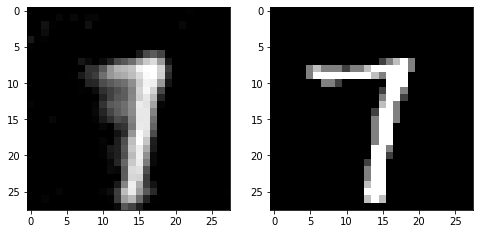

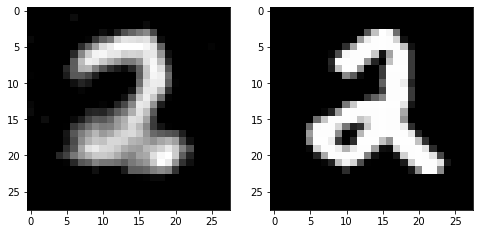

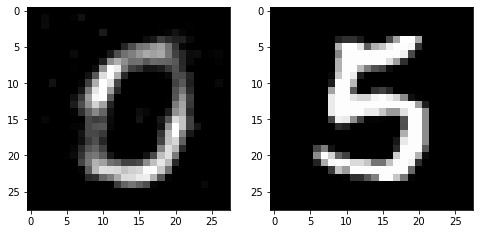

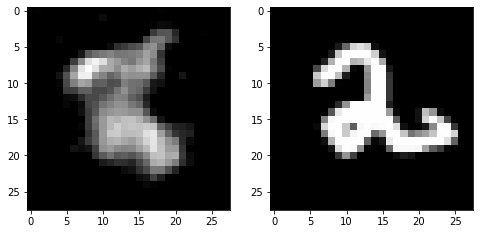

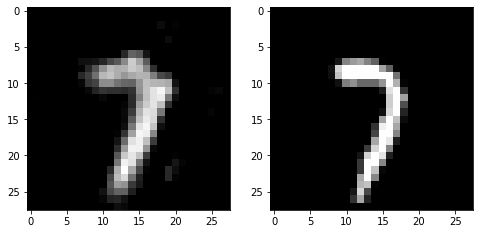

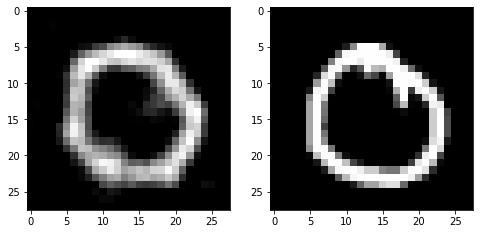

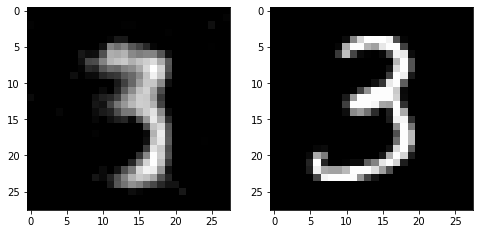

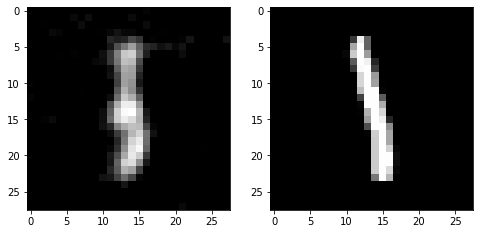

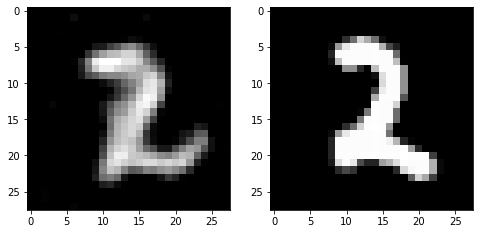

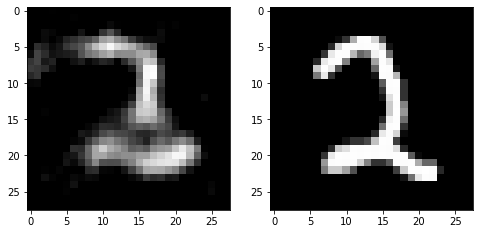

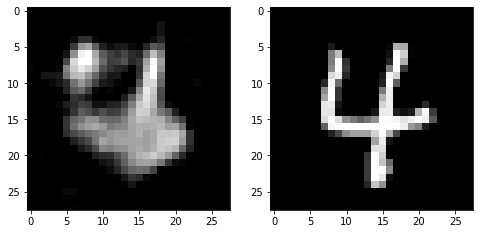

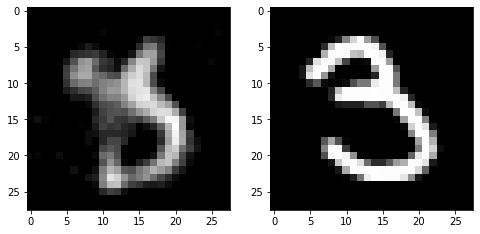

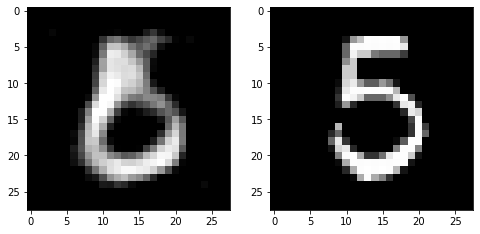

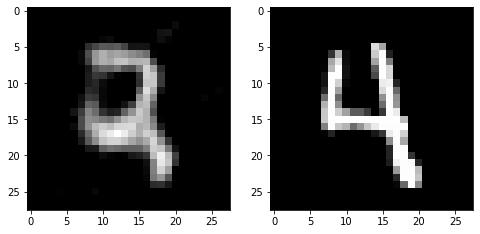

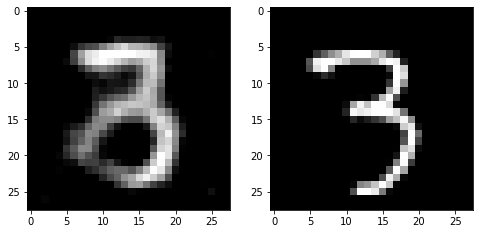

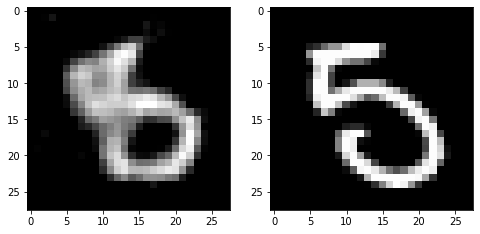

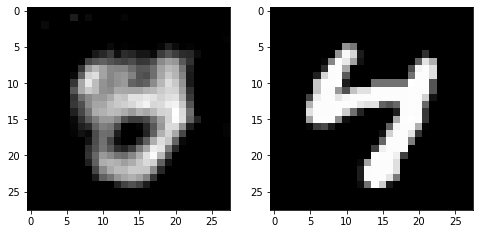

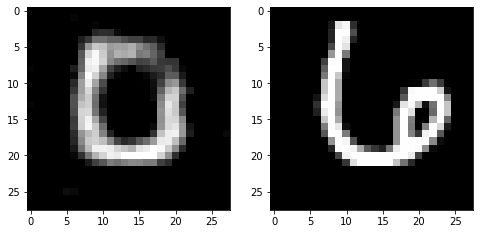

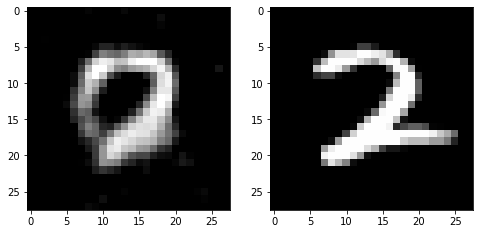

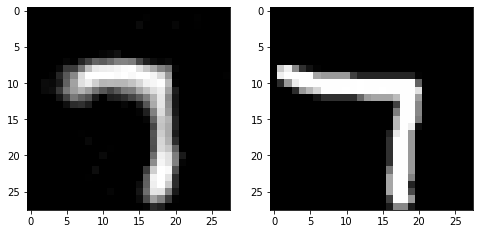

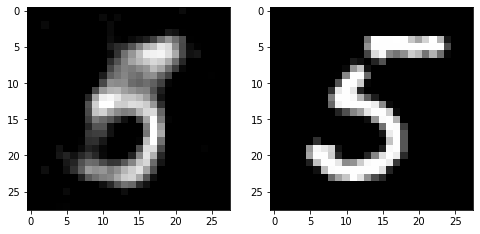

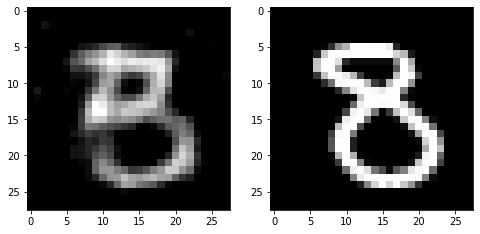

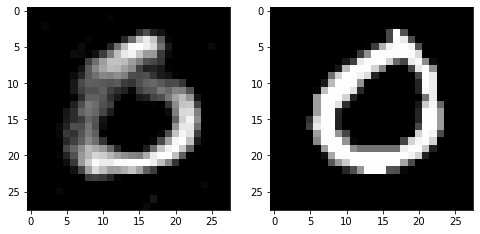

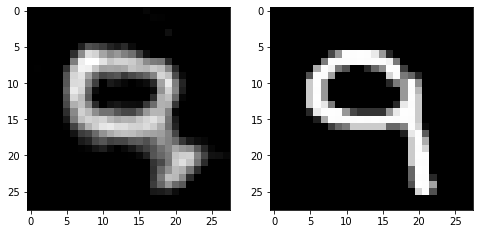

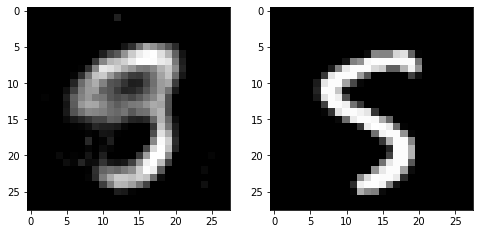

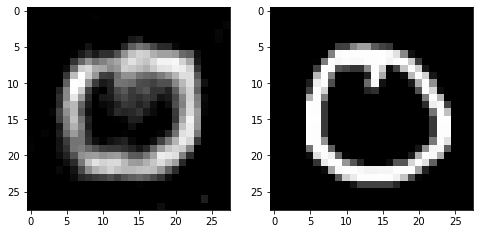

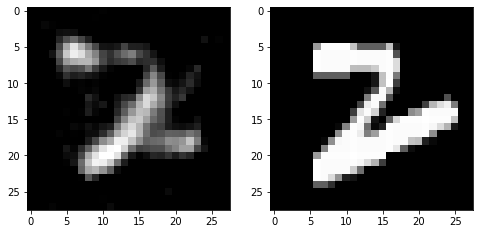

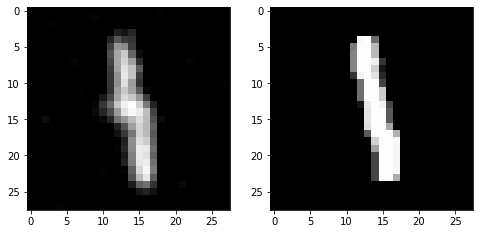

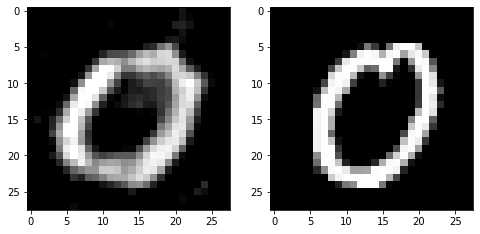

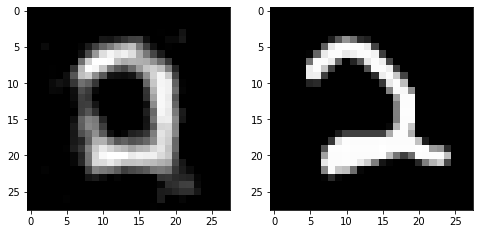

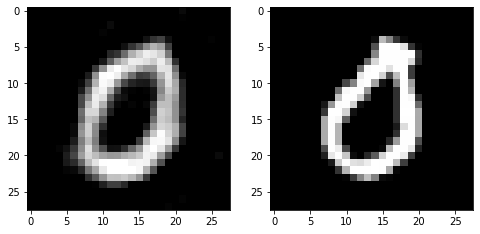

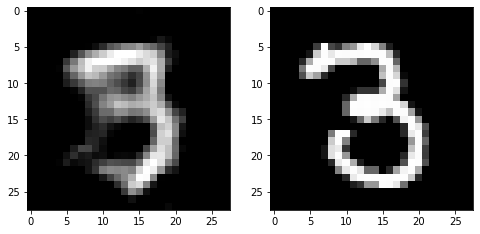

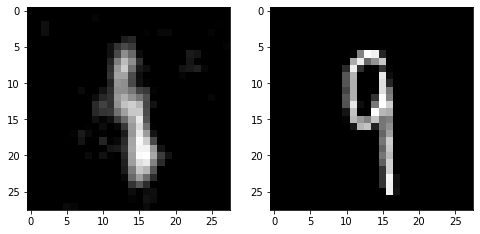

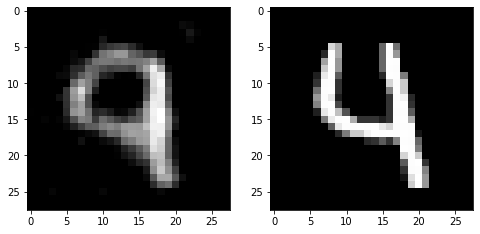

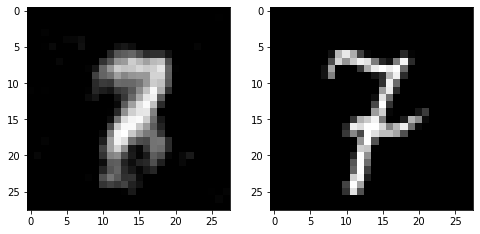

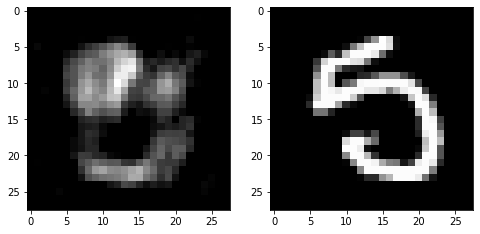

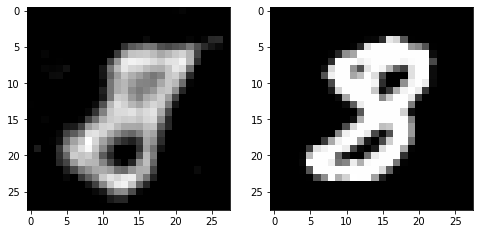

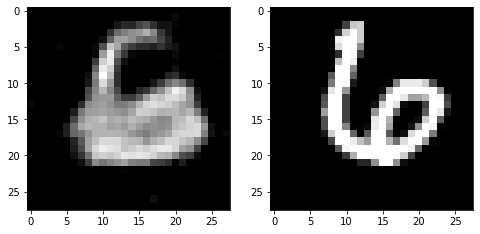

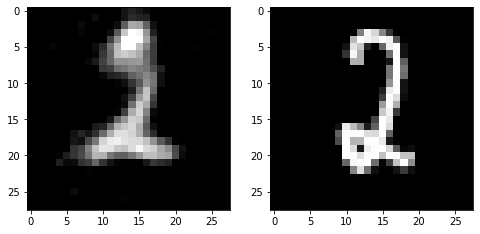

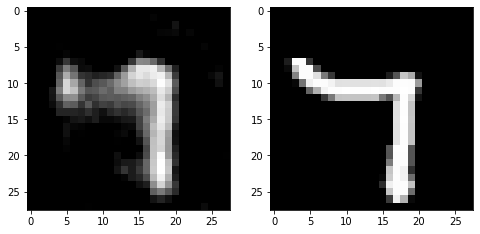

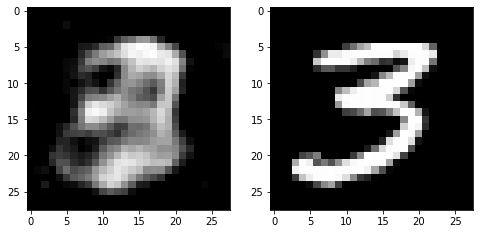

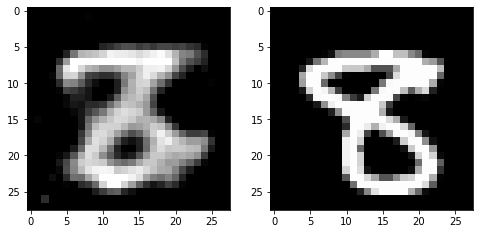

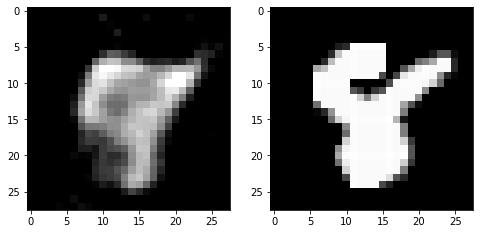

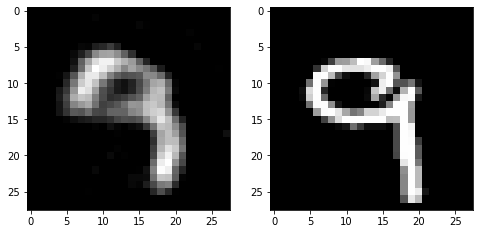

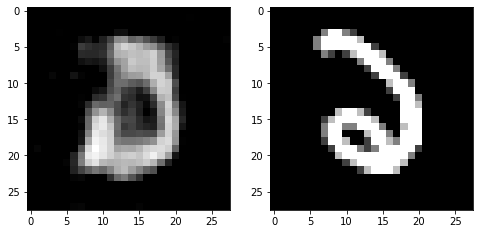

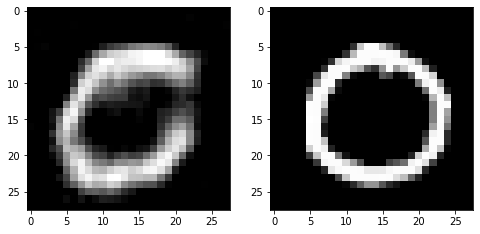

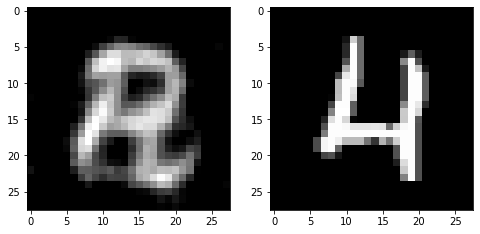

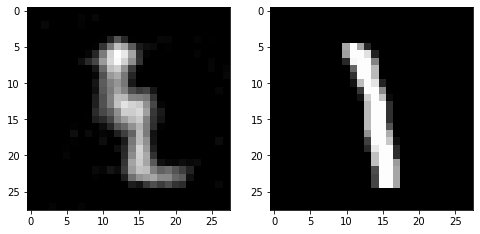

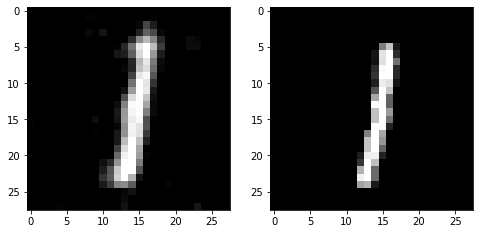

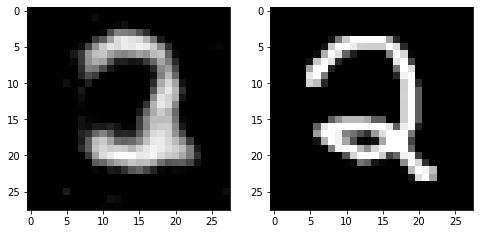

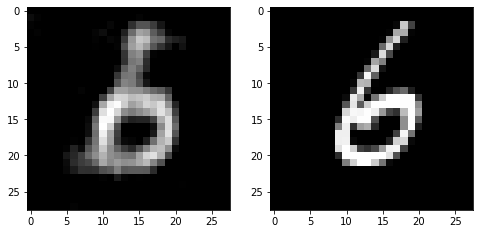

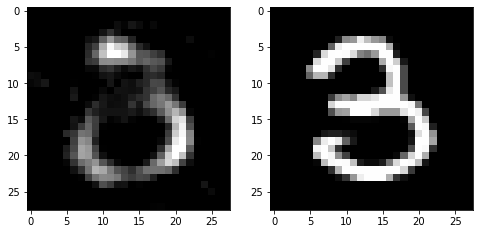

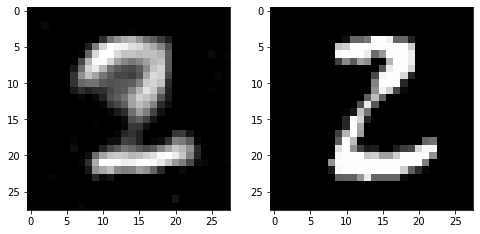

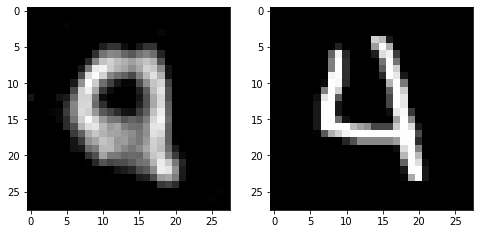

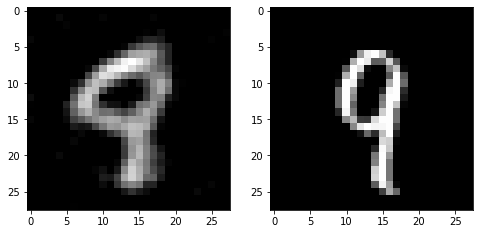

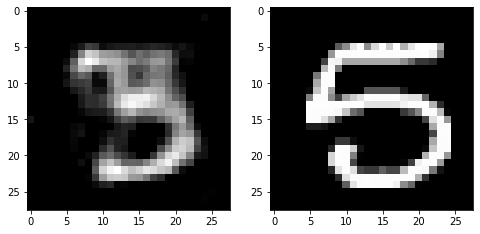

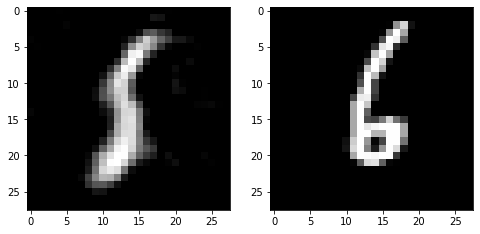

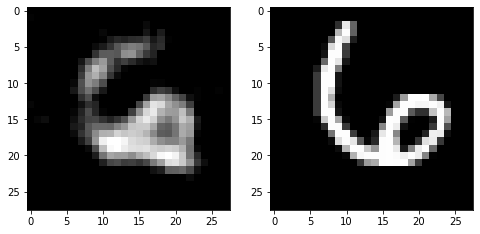

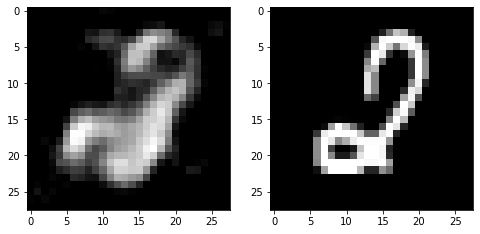

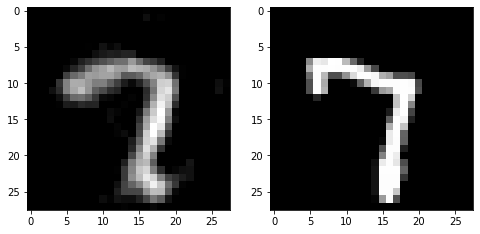

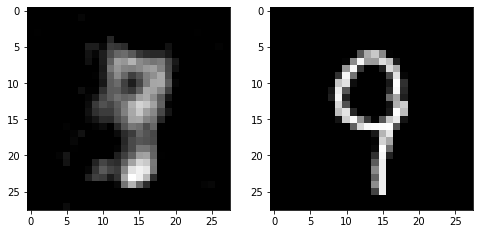

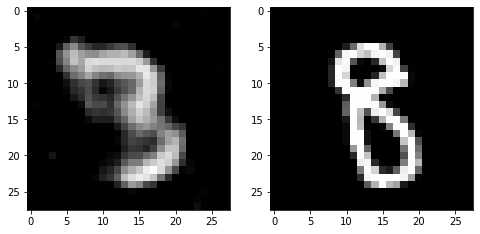

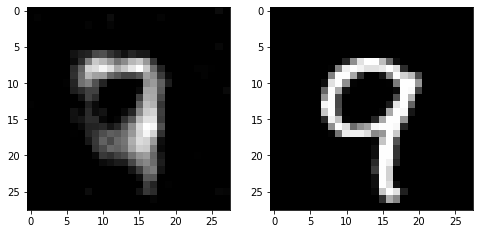

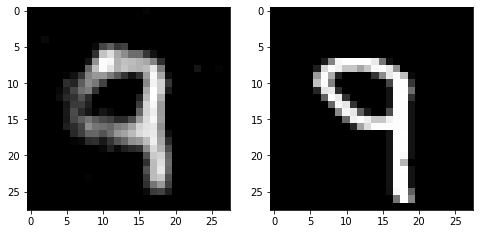

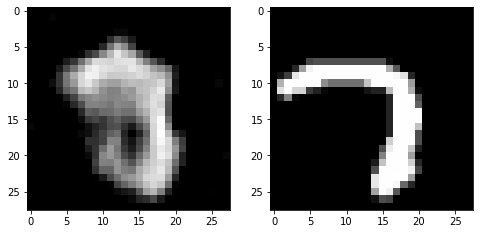

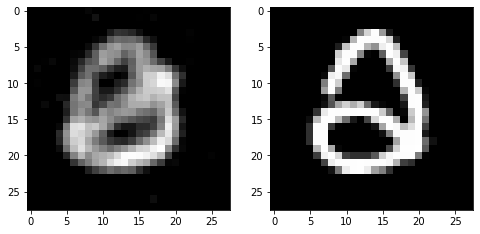

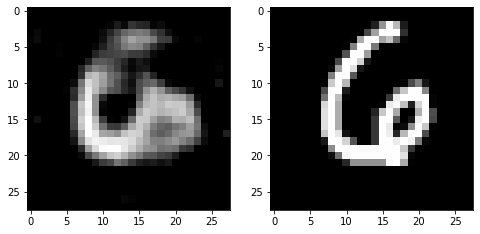

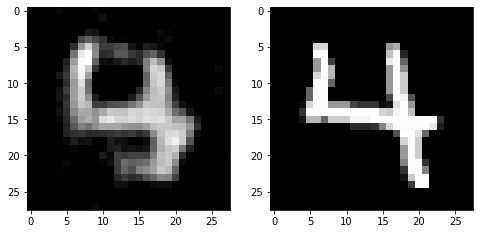

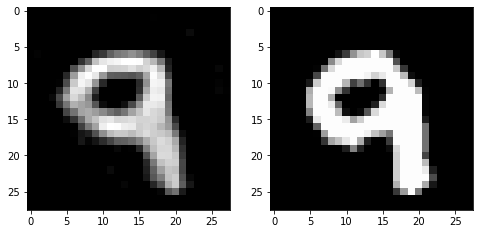

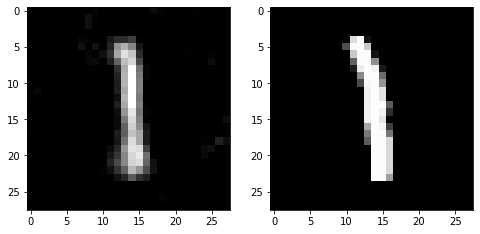

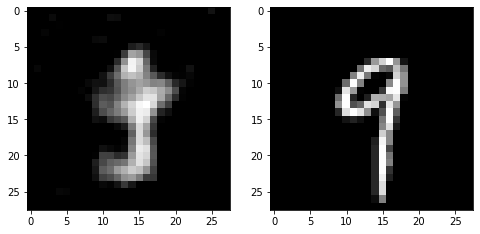

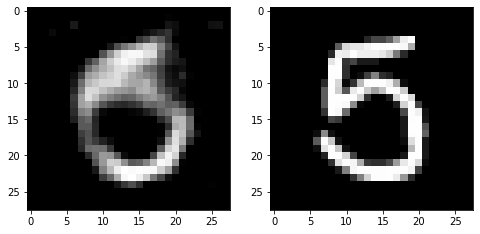

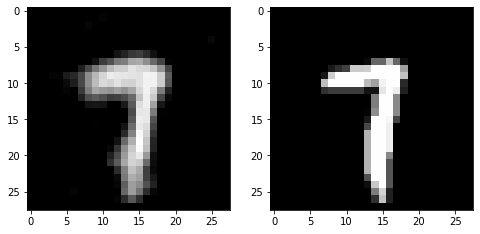

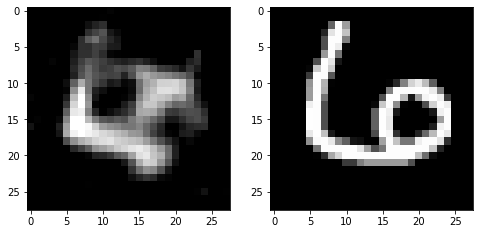

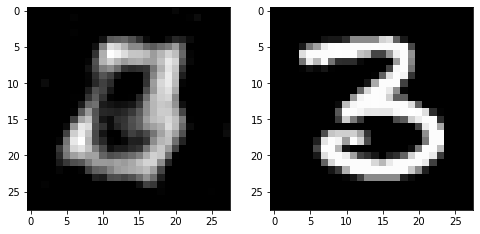

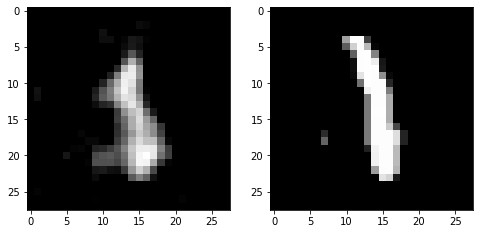

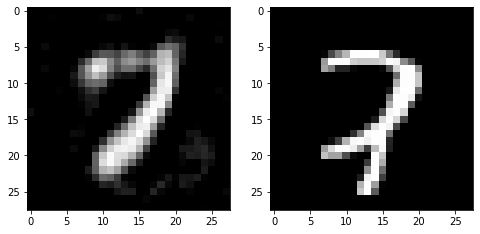

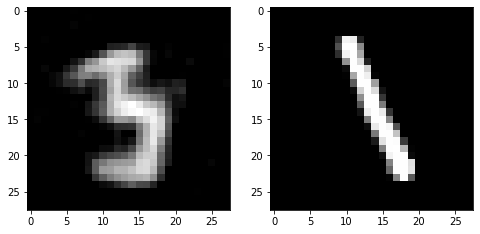

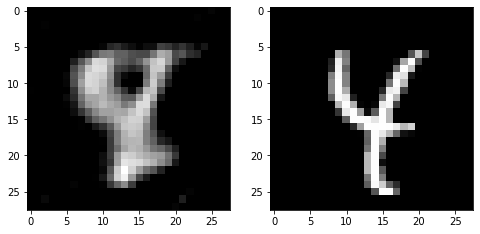

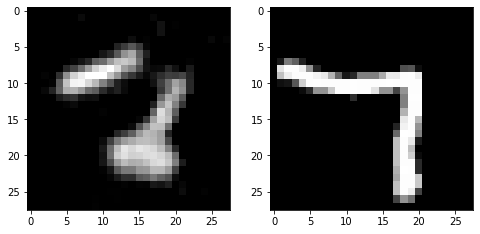

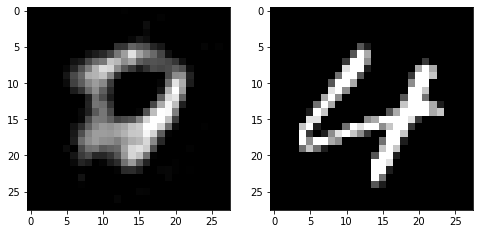

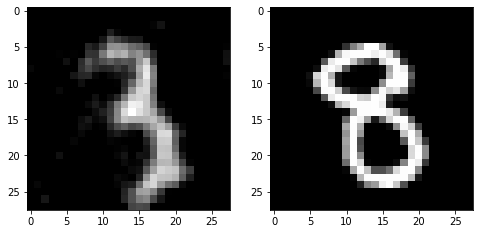

In [45]:
mtest = mnc.My_numpy(1, '../dat/experiment/SLM/mnist/mean/m_1_23000_fps2_N10_lsd_mean.dat')
mtest.simread(23000, 1600)

mimtest = mnc.My_numpy(1, '../dat/bindat/1byte/m_28_1.dat')
mimtest.binread(23000, 28, 28)

#テストデータの正規化と標準化に学習データが必要
data = np.vstack((mtest.data[:21000], mtest.data[22000:]))
data.shape

oriimg = np.vstack((mimtest.data[:21000], mimtest.data[22000:]))
oriimg.shape

data = data.reshape(22000,1,1600)
oriimg = oriimg.reshape(22000,1,28,28)

tset = mtc.My_dataset(data, oriimg)
tset.numpy2tensor()

tset.splitdata(21000)

tset.datanormalize()
tset.labelnormalize()

tset.tensor2dataset()

tl = DataLoader(tset.dataset_val, batch_size = 256, shuffle = False)


psnrs = DL.test_decode_model_and_check_img_ver3(tl, 28, 28, model, device, 8, 4, 1, 100, "../img/expe_dec", \
                                                label_array = None, datanorm = True, correctimgnorm = True)


In [46]:
psnrs

[16.989759676669298,
 11.567699254966762,
 12.303804256162628,
 12.323707655119414,
 18.486529550206278,
 13.571650793442734,
 14.794187579049161,
 13.940109890559436,
 13.181208044347548,
 13.346329526089306,
 11.890761168898226,
 15.614840375951127,
 16.145361815940753,
 13.201773227367328,
 15.088514980096534,
 11.238459341360802,
 13.948752809314428,
 13.981059476156235,
 17.077652961760798,
 12.475784452234855,
 12.150944500747503,
 12.335127115020033,
 18.928438630290977,
 14.376479501309392,
 12.934147323734644,
 16.425339052556723,
 13.693036544314104,
 12.720025054558254,
 12.63829770898466,
 12.22934430410793,
 13.720928100608969,
 13.308630806106052,
 14.291063935613996,
 12.11662037039076,
 12.686974722075949,
 13.078251453612278,
 13.572975256631306,
 13.291246498589043,
 12.681438052137537,
 11.606832836019294,
 12.70385901021114,
 14.16393635976206,
 13.880350699717054,
 11.882207547817814,
 10.01449878350774,
 18.83789187612813,
 13.850478937387962,
 12.37599140981164,


In [23]:
inp, lab = iter(tl).__next__()

In [25]:
inp.size()

torch.Size([256, 1, 1600])

In [26]:
#assign Gaussian Noise
class GaussianNoise(nn.Module):
    def __init__(self, stddev, device):
        super().__init__()
        self.stddev = stddev
        self.device = device
    
    def forward(self, x):
        return x + torch.autograd.Variable(torch.randn(x.size()).to(self.device) * self.stddev)



In [27]:
inp = inp.to(device)

In [28]:
inp = torch.autograd.Variable(inp)

In [29]:
gn = GaussianNoise(1, device)

In [31]:
inp[0]

tensor([[-0.5065, -0.0070, -0.2568,  ..., -0.8187, -1.1934, -0.6002]],
       device='cuda:0')

In [32]:
outp = gn(inp)

In [34]:
outp[0]

tensor([[-2.2737,  1.2059, -0.9831,  ..., -0.3994, -0.5005,  0.3898]],
       device='cuda:0')

In [35]:
gn2 = GaussianNoise(0.1, device)

In [36]:
inp[0]

tensor([[-0.5065, -0.0070, -0.2568,  ..., -0.8187, -1.1934, -0.6002]],
       device='cuda:0')

In [37]:
outp2 = gn2(inp)

In [38]:
outp2[0]

tensor([[-0.5302,  0.1069, -0.2768,  ..., -0.8950, -1.2556, -0.7596]],
       device='cuda:0')

In [39]:
gn3 = GaussianNoise(0.01, device)

In [40]:
inp[0]

tensor([[-0.5065, -0.0070, -0.2568,  ..., -0.8187, -1.1934, -0.6002]],
       device='cuda:0')

In [41]:
outp3 = gn3(inp)

In [42]:
outp3[0]

tensor([[-0.5016, -0.0060, -0.2442,  ..., -0.8032, -1.1933, -0.5928]],
       device='cuda:0')

In [28]:
test = np.concatenate((msim.data[:21000], msim.data[22000:]))
test.shape

(22000, 1600)

(22000, 1600)

(22000, 28, 28)

In [29]:
msim.data = msim.data.reshape(23000, 1, 1600)
mimg.data = mimg.data.reshape(23000, 1, 28, 28)


In [31]:
data = np.concatenate([msim.data[:21000], msim.data[22000:]], axis = 0)
data.shape

(22000, 1, 1600)

In [ ]:
myset = mtc.My_dataset(msim.data, mimg.data)
myset.numpy2tensor()

myset.splitdata(22000)

myset.datanormalize()
myset.labelnormalize()

del t_t
tl = DataLoader(t_v, batch_size = 64, shuffle = False)
psnrs = DL.test_decode_model_and_check_img_ver3(tl, 28, 28, model, device, 8, 4, 1, 10, "../img/expe_dec", \
                                                label_array = None, datanorm = True, correctimgnorm = True)
psnrs

In [30]:
simpath = '../dat/experiment/SLM/mean/m_1_23000_fps2_N10_lsd_mean.dat'
binpath = '../dat/bindat/1byte/m_28_1.dat'
x = 28
y = 28

#復元
#28000を訓練、1000を評価、1000をテスト,テストは後で使う
m_dc_set_t,m_dc_set_v=DL.mysimbin_to_dataset_ver2(simpath, binpath, 1600, x, y, 23000, 1, 1, True, 22000,  normalize_true = True, label_img_norm_true = True)
m_dc_loader_t=DataLoader(m_dc_set_t,batch_size=64,shuffle=True)
m_dc_loader_v=DataLoader(m_dc_set_v,batch_size=64,shuffle=True)

In [31]:
criterion = nn.MSELoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#model_ver3
#28x28出力
kernel_size = [6,4,4,4,4,4]
stride_list = [1,1,1,1,1,1]
padding_list = [4,4,2,2,2,2]
outpadding_list = [0,0,0,0,0,0]
in_channel_list = [1,64,128,256,128,64]
out_channel_list = [64,128,256,128,64,1]

model = my_model.simnet_decoder_allsize(1600, 1600, 40, 40, kernel_size, stride_list, padding_list,
                                        outpadding_list, in_channel_list, out_channel_list).to(device)


In [32]:
summary(model = model, input_size = (64, 1, 1600))

Layer (type:depth-idx)                        Output Shape              Param #
simnet_decoder_allsize                        --                        --
├─Linear: 1-1                                 [64, 1, 1600]             2,561,600
├─ReLU: 1-2                                   [64, 1, 1600]             --
├─Sequential: 1-3                             [64, 1, 28, 28]           --
│    └─Convtp_Bn_ReLu: 2-1                    [64, 64, 37, 37]          --
│    │    └─Sequential: 3-1                   [64, 64, 37, 37]          2,496
│    └─Convtp_Bn_ReLu: 2-2                    [64, 128, 32, 32]         --
│    │    └─Sequential: 3-2                   [64, 128, 32, 32]         131,456
│    └─Convtp_Bn_ReLu: 2-3                    [64, 256, 31, 31]         --
│    │    └─Sequential: 3-3                   [64, 256, 31, 31]         525,056
│    └─Convtp_Bn_ReLu: 2-4                    [64, 128, 30, 30]         --
│    │    └─Sequential: 3-4                   [64, 128, 30, 30]         524

In [33]:
device

device(type='cuda', index=0)

エポック1--------------------------------
epochtime:0.7049259106318156分, train_loss:0.0008201784686270085, val_loss:0.0008113079033792019
エポック2--------------------------------
epochtime:0.7070405999819438分, train_loss:0.0006715649791400541, val_loss:0.000694993145763874
エポック3--------------------------------
epochtime:0.7038112123807271分, train_loss:0.0005946273537860675, val_loss:0.0006312642954289914
エポック4--------------------------------
epochtime:0.710099458694458分, train_loss:0.0005441063286905939, val_loss:0.0006030653268098832
エポック5--------------------------------
epochtime:0.7018767555554708分, train_loss:0.0004979790259491314, val_loss:0.000560978164896369
エポック6--------------------------------
epochtime:0.7079743464787801分, train_loss:0.00046796804497187787, val_loss:0.0005595897696912288
エポック7--------------------------------
epochtime:0.7080484310785929分, train_loss:0.00044403691581365736, val_loss:0.0005513358097523451
エポック8--------------------------------
epochtime:0.7041061441103

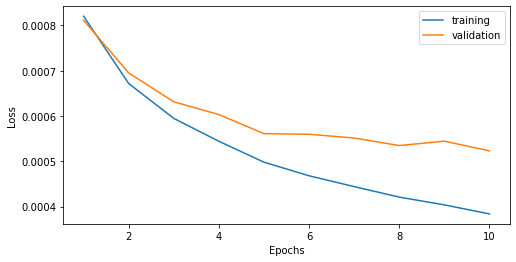

In [34]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
tls,  vls = DL.train_decode_model_ver2(m_dc_loader_t, m_dc_loader_v, model, criterion, optimizer, 10, device)
DL.learning_curv_ver2( 8, 4, 10, 10, tls = tls, vls = vls, tas = None, vas = None)

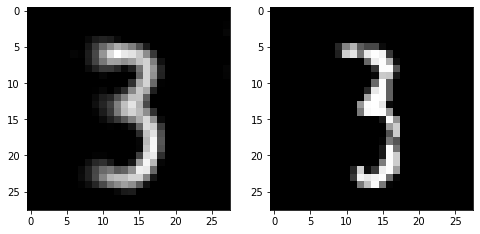

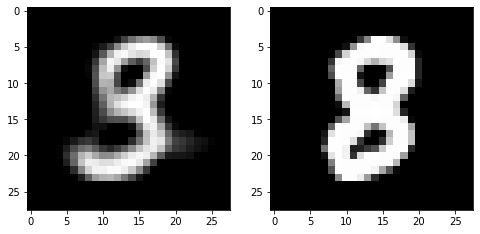

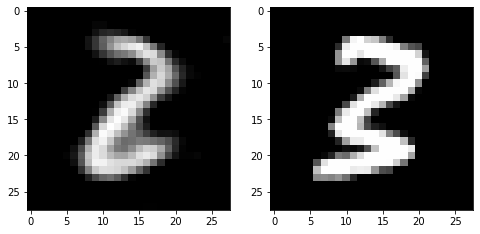

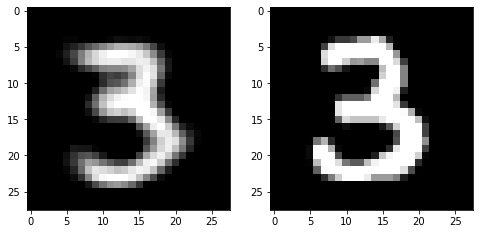

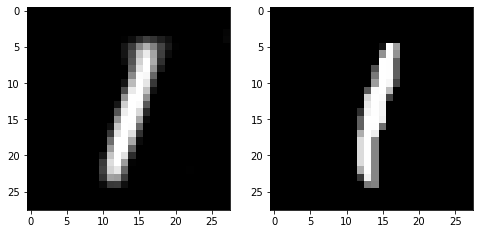

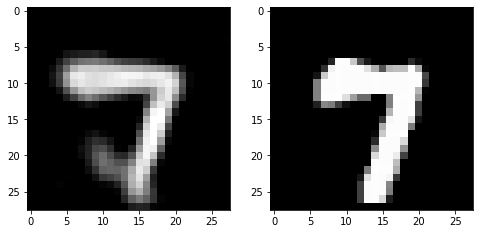

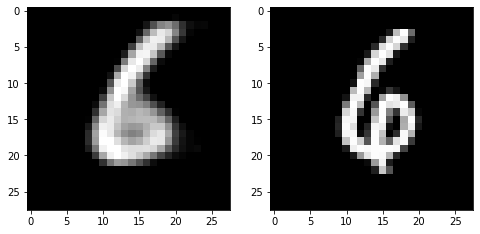

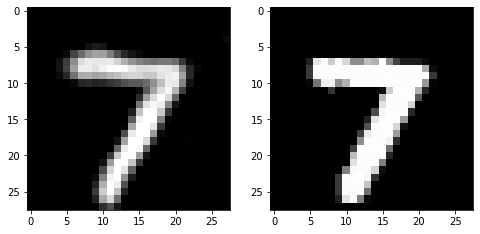

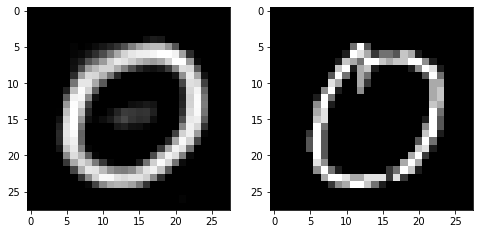

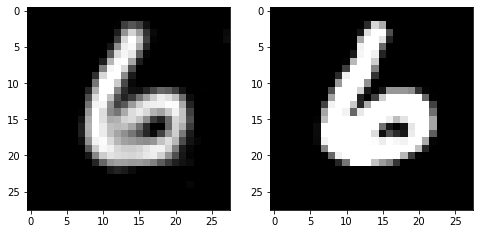

[19.241411982216494,
 14.43174748250884,
 14.387304785085142,
 15.089400380115006,
 19.983818553097727,
 16.46266014802462,
 14.752481414120926,
 17.38324541554168,
 13.946685056447134,
 16.98471078473306,
 14.332385742886691,
 17.910414527804388,
 17.96960396062566,
 16.036422902302878,
 16.150151382104234,
 12.57894883179651,
 16.21146604346779,
 15.432214864675702,
 16.809452864466703,
 13.9716292092084,
 12.44430769569041,
 12.650146561766615,
 19.000109213465123,
 14.921901967656424,
 15.223191246668037,
 19.361537226602945,
 15.464182632146494,
 14.422782387399796,
 13.875521706158118,
 13.865535394718798,
 15.410841506464925,
 15.321403915932471,
 14.429894863719158,
 12.895654857564063,
 14.510462760539347,
 15.3432296976764,
 15.296778755255305,
 14.896398806160875,
 15.474489380612084,
 13.237833566981625,
 14.970037883183561,
 15.269777708322351,
 15.763053913521867,
 13.616464021498247,
 13.20118210997461,
 20.660809884179,
 13.153947218448693,
 12.941426065687436,
 18.8847

In [35]:
#23000枚
simpath = '../dat/experiment/SLM/mean/m_1_23000_fps2_N10_lsd_mean.dat'
binpath = '../dat/bindat/1byte/m_28_1.dat'


t_t, t_v = DL.mysimbin_to_dataset_ver2(simpath, binpath, 1600, 28, 28, 23000, 1, 1, True, 22000,  normalize_true = True, label_img_norm_true = True)
del t_t
tl = DataLoader(t_v, batch_size = 64, shuffle = False)
psnrs = DL.test_decode_model_and_check_img_ver3(tl, 28, 28, model, device, 8, 4, 1, 10, "../img/expe_dec", \
                                                label_array = None, datanorm = True, correctimgnorm = True)
psnrs

エポック1--------------------------------
epochtime:0.8887298742930094分, train_loss:0.0008296221277809568, val_loss:0.001027752835303545
エポック2--------------------------------
epochtime:0.8945542772610983分, train_loss:0.0007043237651565245, val_loss:0.0009001879170536995
エポック3--------------------------------
epochtime:0.8963588118553162分, train_loss:0.0006123087785339782, val_loss:0.0008097800724208355
エポック4--------------------------------
epochtime:0.8936305999755859分, train_loss:0.0005583254196681082, val_loss:0.0007979692965745926
エポック5--------------------------------
epochtime:0.8960022886594137分, train_loss:0.0005305291486770979, val_loss:0.0007620275169610977
エポック6--------------------------------
epochtime:0.8978715300559997分, train_loss:0.00048360013935182776, val_loss:0.0007445060387253761
エポック7--------------------------------
epochtime:0.9044531345367431分, train_loss:0.0004586709192954004, val_loss:0.0007200732864439487
エポック8--------------------------------
epochtime:0.894508739312

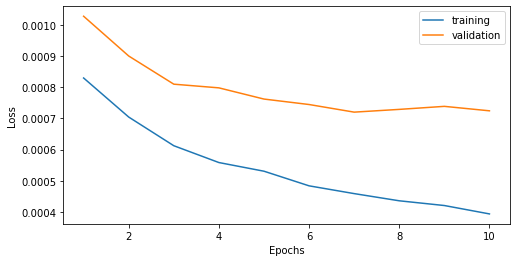

In [29]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
tls,  vls = DL.train_decode_model_ver2(m_dc_loader_t, m_dc_loader_v, model, criterion, optimizer, 10, device)
DL.learning_curv_ver2( 8, 4, 10, 10, tls = tls, vls = vls, tas = None, vas = None)


エポック1--------------------------------
epochtime:0.8895146965980529分, train_loss:0.0009952506537416151, val_loss:0.0011701269671320915
エポック2--------------------------------
epochtime:0.8871969262758891分, train_loss:0.000777483173912125, val_loss:0.0009485017284750939
エポック3--------------------------------
epochtime:0.8878645300865173分, train_loss:0.0007018466823335205, val_loss:0.0009011638723313808
エポック4--------------------------------
epochtime:0.8885033329327902分, train_loss:0.0006483536516981466, val_loss:0.0008200403042137623
エポック5--------------------------------
epochtime:0.8887741128603618分, train_loss:0.0006075267774452056, val_loss:0.00081429223716259
エポック6--------------------------------
epochtime:0.8891225973765056分, train_loss:0.0005744768035864192, val_loss:0.0008034284375607968
エポック7--------------------------------
epochtime:0.8887401819229126分, train_loss:0.0005476602480879852, val_loss:0.0007845781333744526
エポック8--------------------------------
epochtime:0.888840162754058

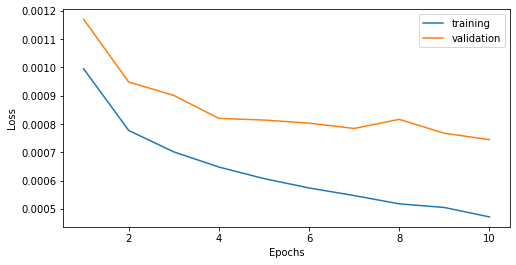

In [23]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
tls,  vls = DL.train_decode_model_ver2(m_dc_loader_t, m_dc_loader_v, model, criterion, optimizer, 10, device)
DL.learning_curv_ver2( 8, 4, 10, 10, tls = tls, vls = vls, tas = None, vas = None)


エポック1--------------------------------
epochtime:0.8847806215286255分, train_loss:0.0010205103510192463, val_loss:0.0011648180037736892
エポック2--------------------------------
epochtime:0.8856470028559367分, train_loss:0.0009037545222256865, val_loss:0.001079678162932396
エポック3--------------------------------
epochtime:0.8837045550346374分, train_loss:0.0008044965945716415, val_loss:0.0009991755448281764
エポック4--------------------------------
epochtime:0.883954393863678分, train_loss:0.0007303528278799993, val_loss:0.0009526695124804973
エポック5--------------------------------
epochtime:0.885815175374349分, train_loss:0.0006897963720506855, val_loss:0.0009395941793918609
エポック6--------------------------------
epochtime:0.886197296778361分, train_loss:0.0006404116640665702, val_loss:0.0008588550016283989
エポック7--------------------------------
epochtime:0.8858774900436401分, train_loss:0.0006504060491653426, val_loss:0.0008913118429481983
エポック8--------------------------------
epochtime:0.892732294400533分

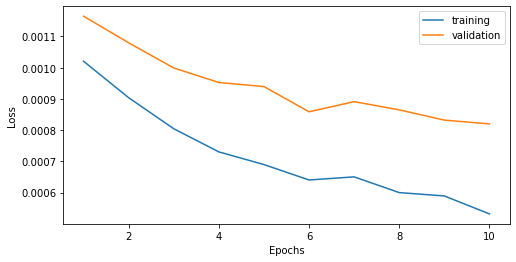

In [17]:
optimizer = optim.Adam(model.parameters(), lr=0.1)
tls,  vls = DL.train_decode_model_ver2(m_dc_loader_t, m_dc_loader_v, model, criterion, optimizer, 10, device)
DL.learning_curv_ver2( 8, 4, 10, 10, tls = tls, vls = vls, tas = None, vas = None)




In [18]:
md_path = '../torchpth/expe/decode/m28000_lsd_out28_dec_e30_b64_lr0.1_adam_norm.pth'
torch.save(model.state_dict(), md_path)

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#model_ver3
#28x28出力
kernel_size = [6,4,4,4,4,4]
stride_list = [1,1,1,1,1,1]
padding_list = [4,4,2,2,2,2]
outpadding_list = [0,0,0,0,0,0]
in_channel_list = [1,64,128,256,128,64]
out_channel_list = [64,128,256,128,64,1]

model = my_model.simnet_decoder_allsize(1600, 1600, 40, 40, kernel_size, stride_list, padding_list,
                                        outpadding_list, in_channel_list, out_channel_list).to(device)


In [5]:
md_path = '../torchpth/expe/decode/m28000_lsd_out28_dec_e30_b64_lr0.1_adam_norm.pth'
model.load_state_dict(torch.load(md_path))

<All keys matched successfully>

In [14]:
simpath = '../dat/experiment/SLM/mean/m_1_30000_fps2_N10_lsd_mean.dat'
binpath = '../dat/bindat/1byte/m_28_1.dat'


t_t, t_v = DL.mysimbin_to_dataset_ver2(simpath, binpath, 1600, 28, 28, 30000, 1, 1, True, 29000,  normalize_true = True, label_img_norm_true = False)
del t_t
tl = DataLoader(t_v, batch_size = 64, shuffle = False)



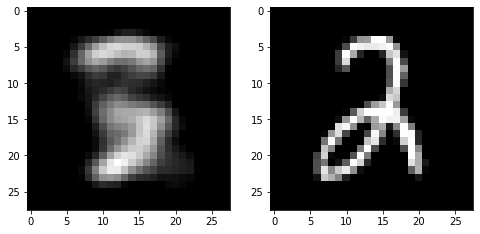

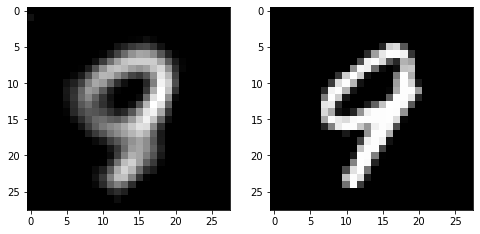

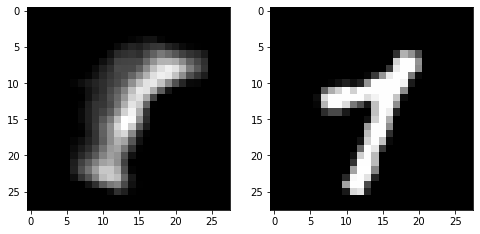

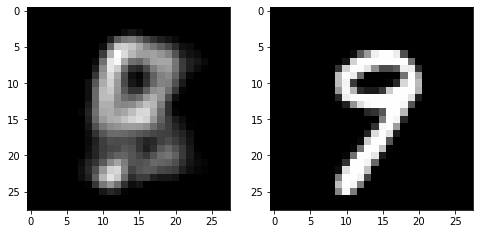

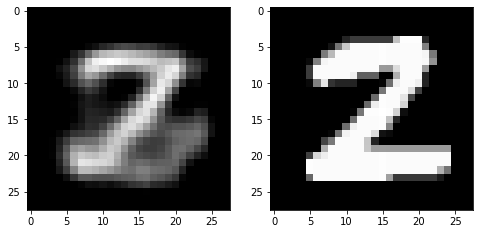

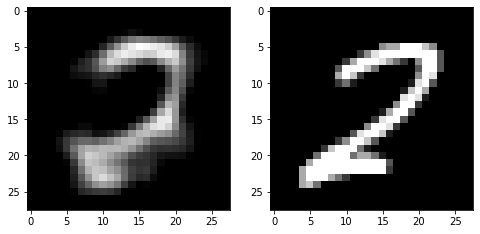

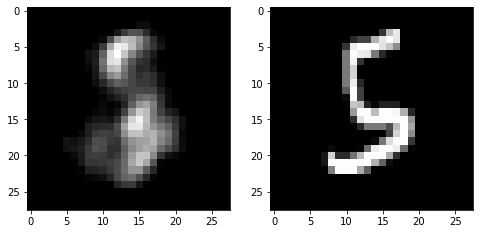

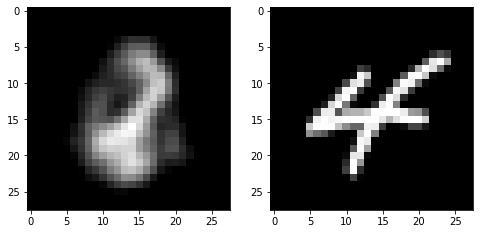

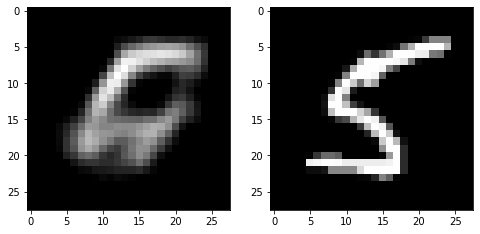

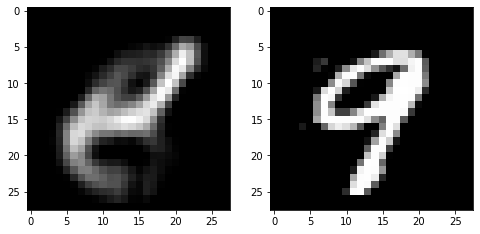

[12.554629973181344,
 15.113261297062373,
 13.405457335218426,
 13.414451887753327,
 11.409710705585832,
 12.181618089901537,
 14.191825333663948,
 12.010809797411275,
 12.63733287058452,
 11.562719023942998,
 15.788675967153967,
 11.6295888977775,
 15.113817121792527,
 11.713833375729536,
 10.235538777492925,
 11.730346944045259,
 12.116295844346702,
 10.59278513818284,
 13.992797667882716,
 10.715600561939238,
 13.398738996078412,
 13.937653886664918,
 9.51614989336738,
 11.677929647261983,
 14.727877858327211,
 12.998646299504585,
 11.342528338195253,
 12.681561258307166,
 15.663780230981725,
 11.55608271139016,
 14.331616555355415,
 12.514913515631122,
 12.905973694331063,
 16.60688651345476,
 15.003151711444128,
 10.679462930272166,
 13.310226105365219,
 11.706072602096542,
 12.536737967734853,
 13.449401505173297,
 18.23826966381147,
 15.348819363127395,
 13.573227396413097,
 13.2172170481837,
 13.396200183178328,
 13.245701131635329,
 14.007250439800067,
 14.013318491138074,
 9.

In [9]:
#30000枚
psnrs = DL.test_decode_model_and_check_img_ver3(tl, 28, 28, model, device, 8, 4, 1, 10, "../img/expe_dec", \
                                                label_array = None, datanorm = True, correctimgnorm = True)
psnrs

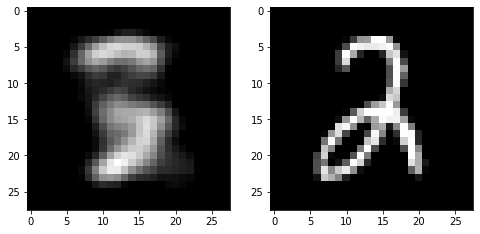

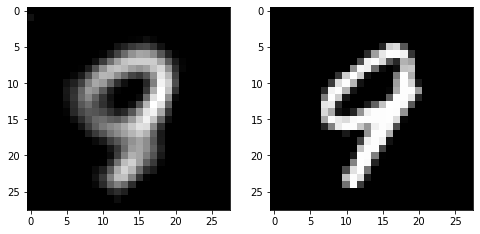

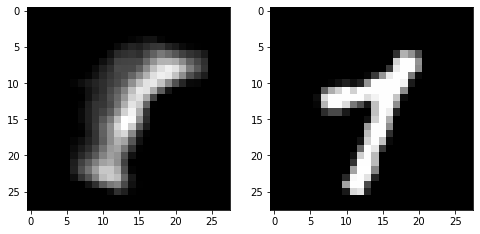

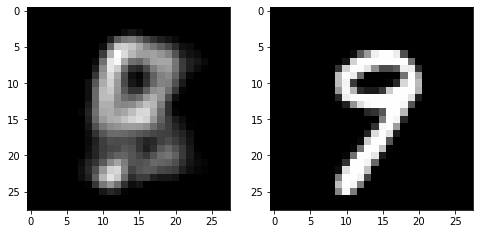

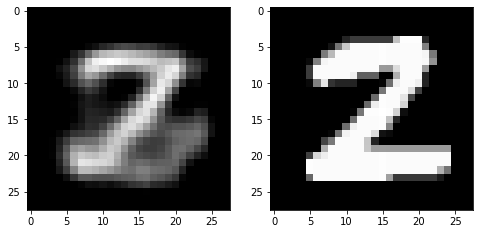

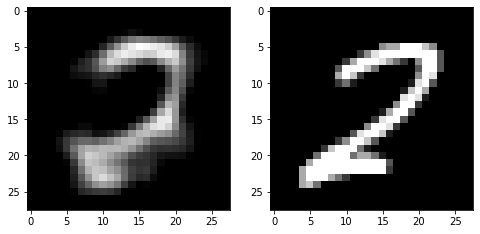

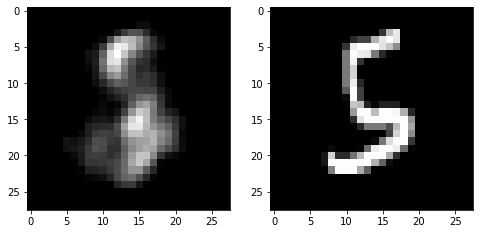

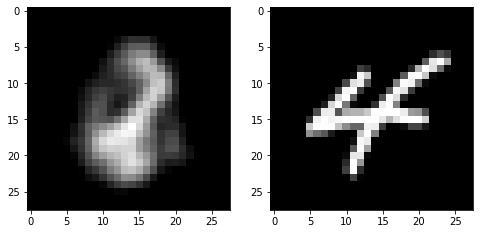

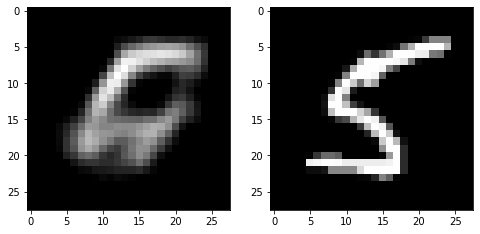

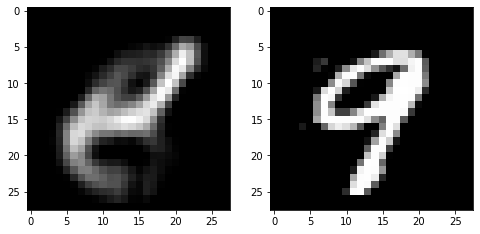

[12.554629973181344,
 15.113261297062373,
 13.405457335218426,
 13.414451887753327,
 11.409710705585832,
 12.181618089901537,
 14.191825333663948,
 12.010809797411275,
 12.63733287058452,
 11.562719023942998,
 15.788675967153967,
 11.6295888977775,
 15.113817121792527,
 11.713833375729536,
 10.235538777492925,
 11.730346944045259,
 12.116295844346702,
 10.59278513818284,
 13.992797667882716,
 10.715600561939238,
 13.398738996078412,
 13.937653886664918,
 9.51614989336738,
 11.677929647261983,
 14.727877858327211,
 12.998646299504585,
 11.342528338195253,
 12.681561258307166,
 15.663780230981725,
 11.55608271139016,
 14.331616555355415,
 12.514913515631122,
 12.905973694331063,
 16.60688651345476,
 15.003151711444128,
 10.679462930272166,
 13.310226105365219,
 11.706072602096542,
 12.536737967734853,
 13.449401505173297,
 18.23826966381147,
 15.348819363127395,
 13.573227396413097,
 13.2172170481837,
 13.396200183178328,
 13.245701131635329,
 14.007250439800067,
 14.013318491138074,
 9.

In [15]:
psnrs2 = DL.test_decode_model_and_check_img_ver3(tl, 28, 28, model, device, 8, 4, 1, 10, "../img/expe_dec", \
                                                label_array = None, datanorm = True, correctimgnorm = False)
psnrs2

In [10]:
len(psnrs)

1000

In [11]:
psnrs = np.array(psnrs)

In [12]:
psnr = np.mean(psnrs)

In [13]:
psnr

12.709320909824852

In [16]:
psnrs2 = np.array(psnrs2)

In [18]:
np.all(psnrs == psnrs2)

True